In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, confusion_matrix,r2_score, log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier



In [2]:
data = pd.read_csv("train.csv", index_col = "Id")
data.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


In [4]:
data["Response"].value_counts()

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='count'>

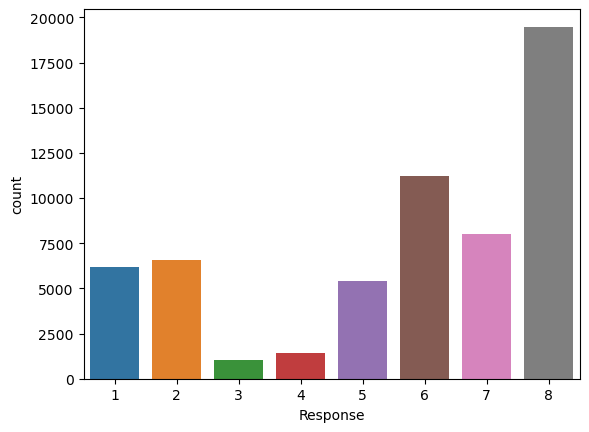

In [5]:
sns.countplot(x = data["Response"])

<Axes: xlabel='new_response', ylabel='count'>

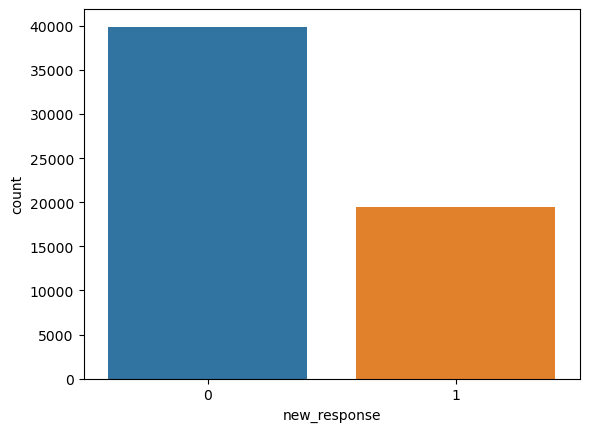

In [6]:
data["new_response"] = data["Response"].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x == 8 else -1))

sns.countplot(x = data['new_response'])

In [7]:
data.drop('Response', axis = 1, inplace = True)

In [8]:
categorical = [col for col in data.columns if data[col].dtype == 'object']

numerical = [col for col in data.columns if data[col].dtype != 'object']


print(categorical)

print(len(numerical))


['Product_Info_2']
126


/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_13612/1546643277.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (9,6))


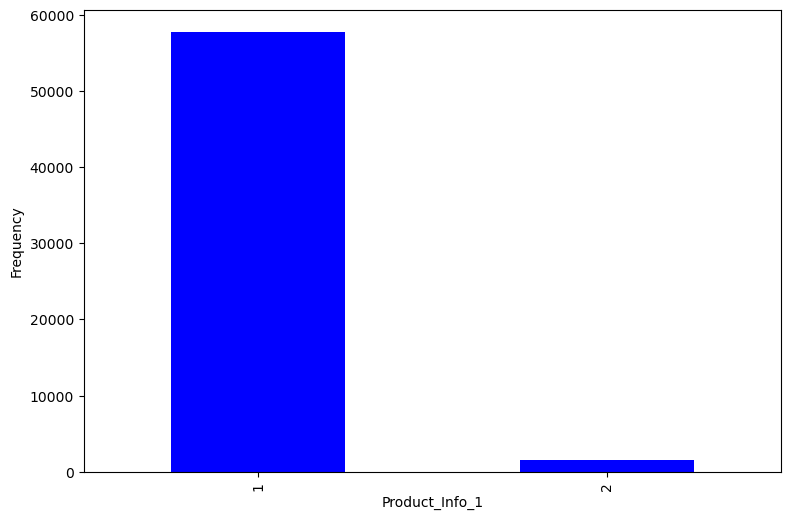

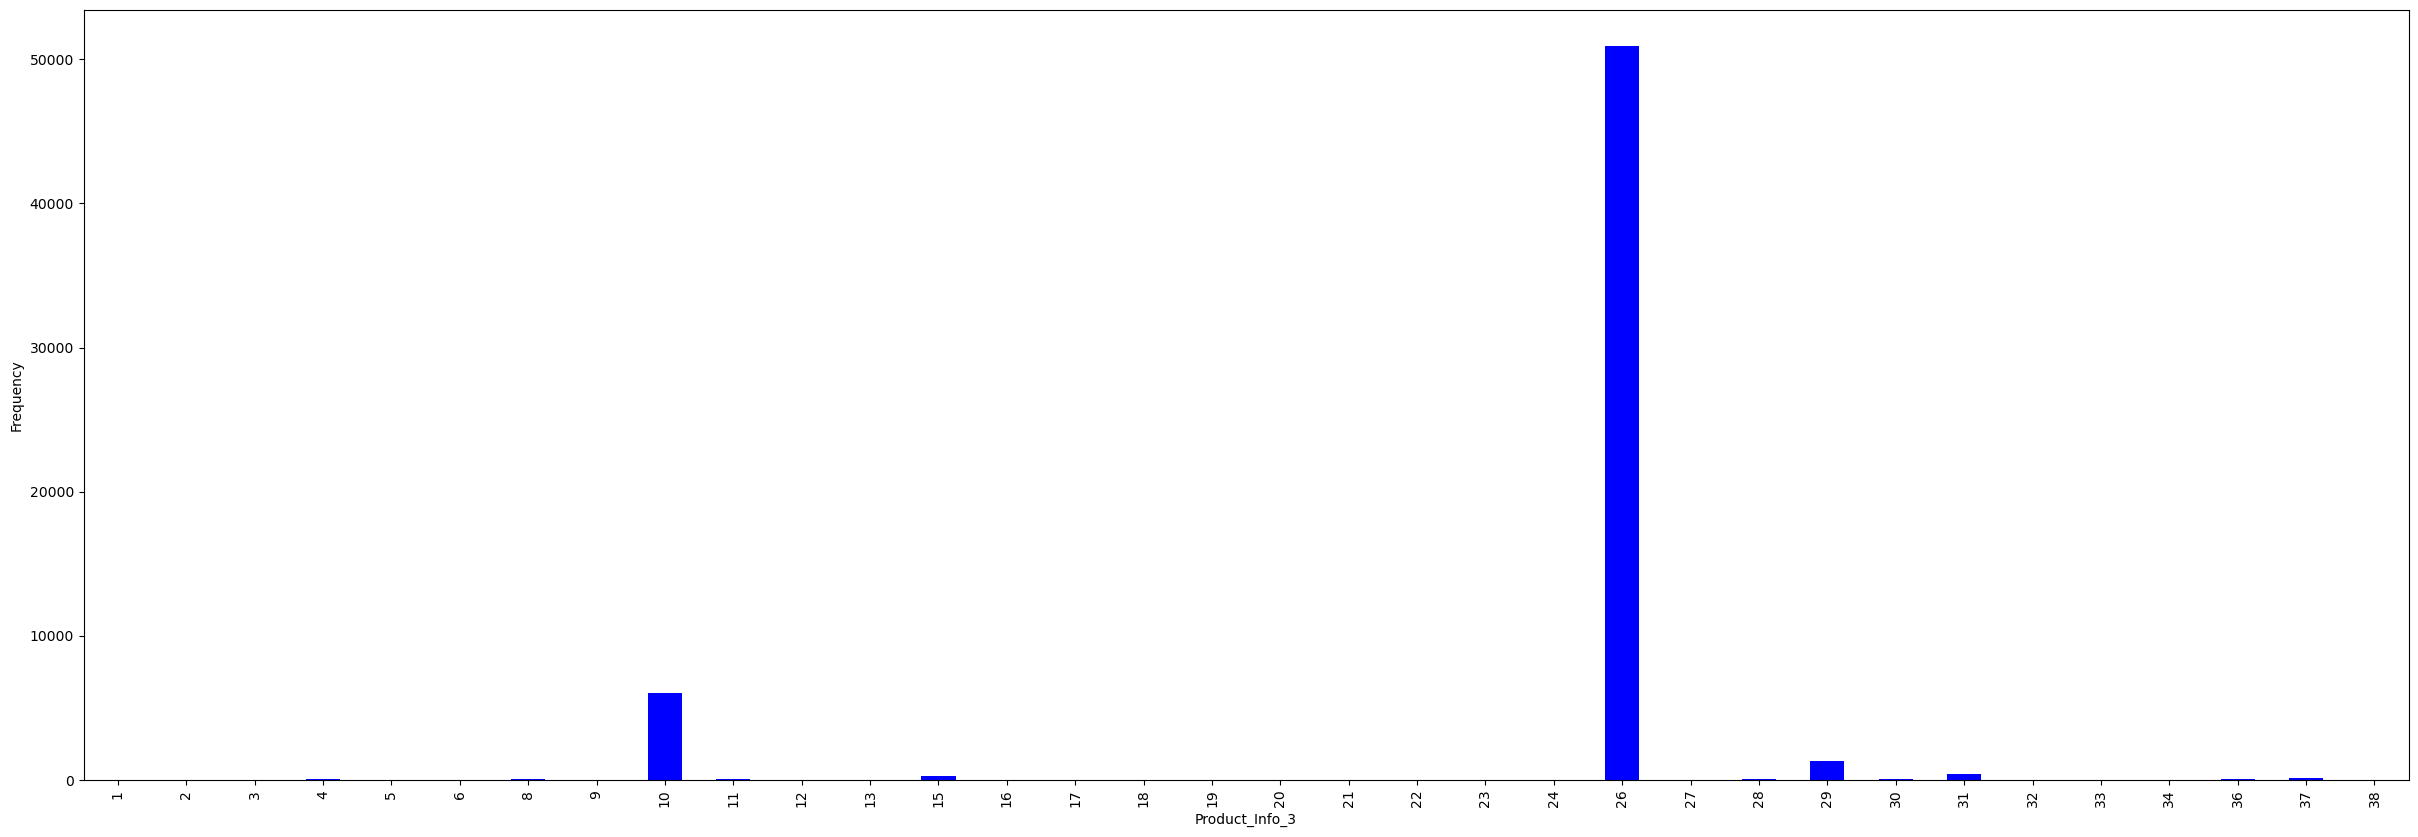

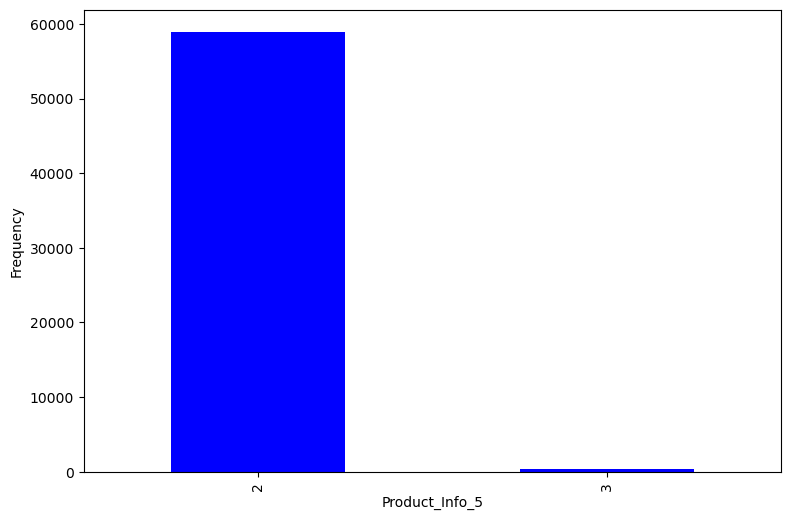

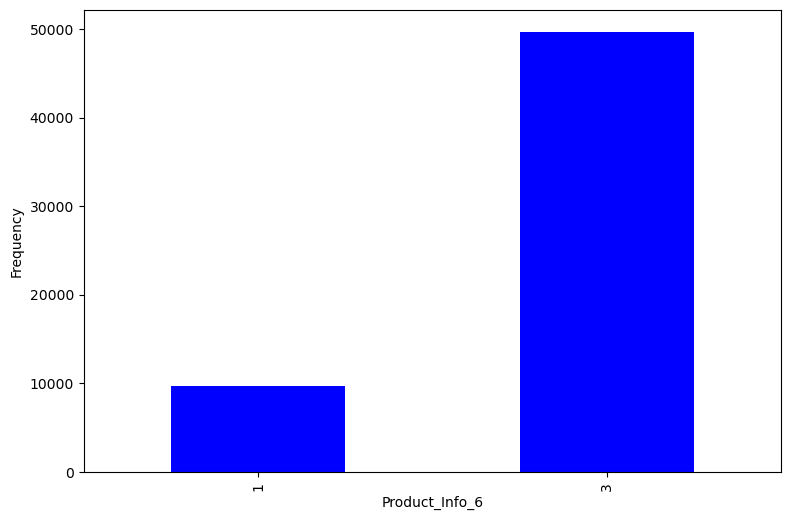

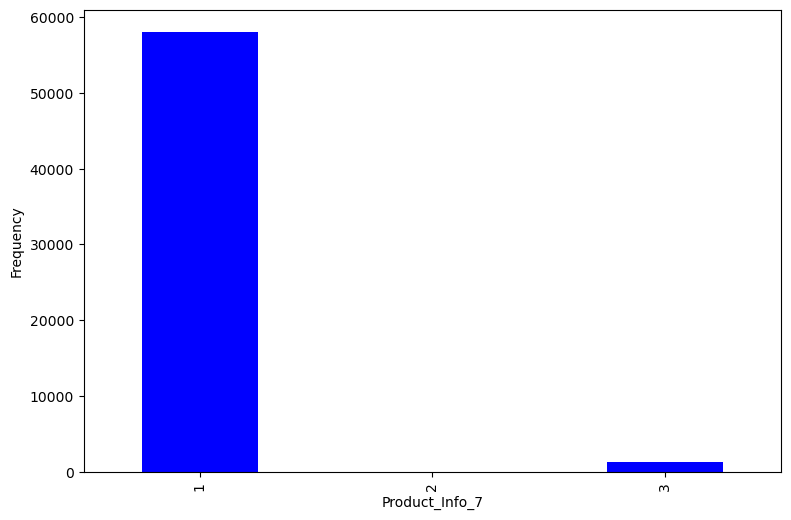

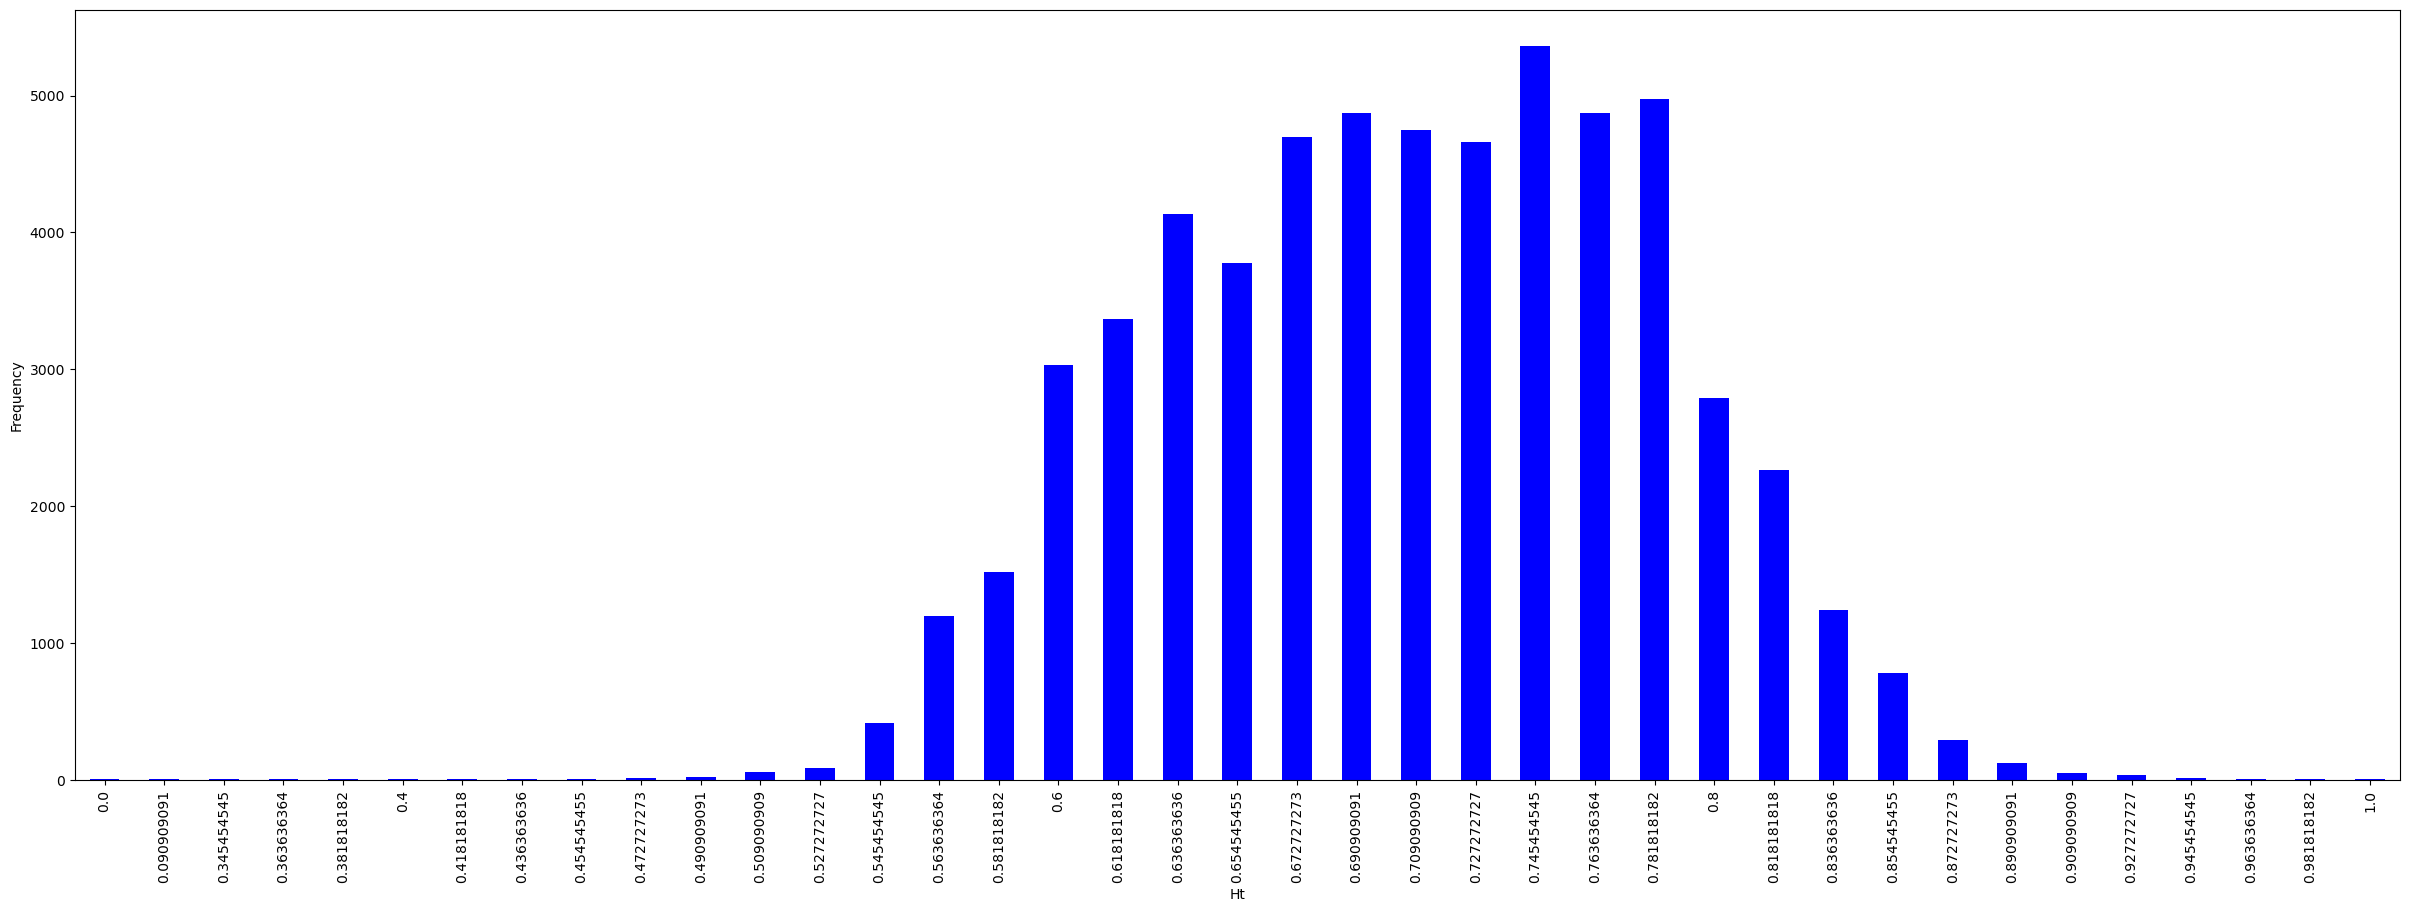

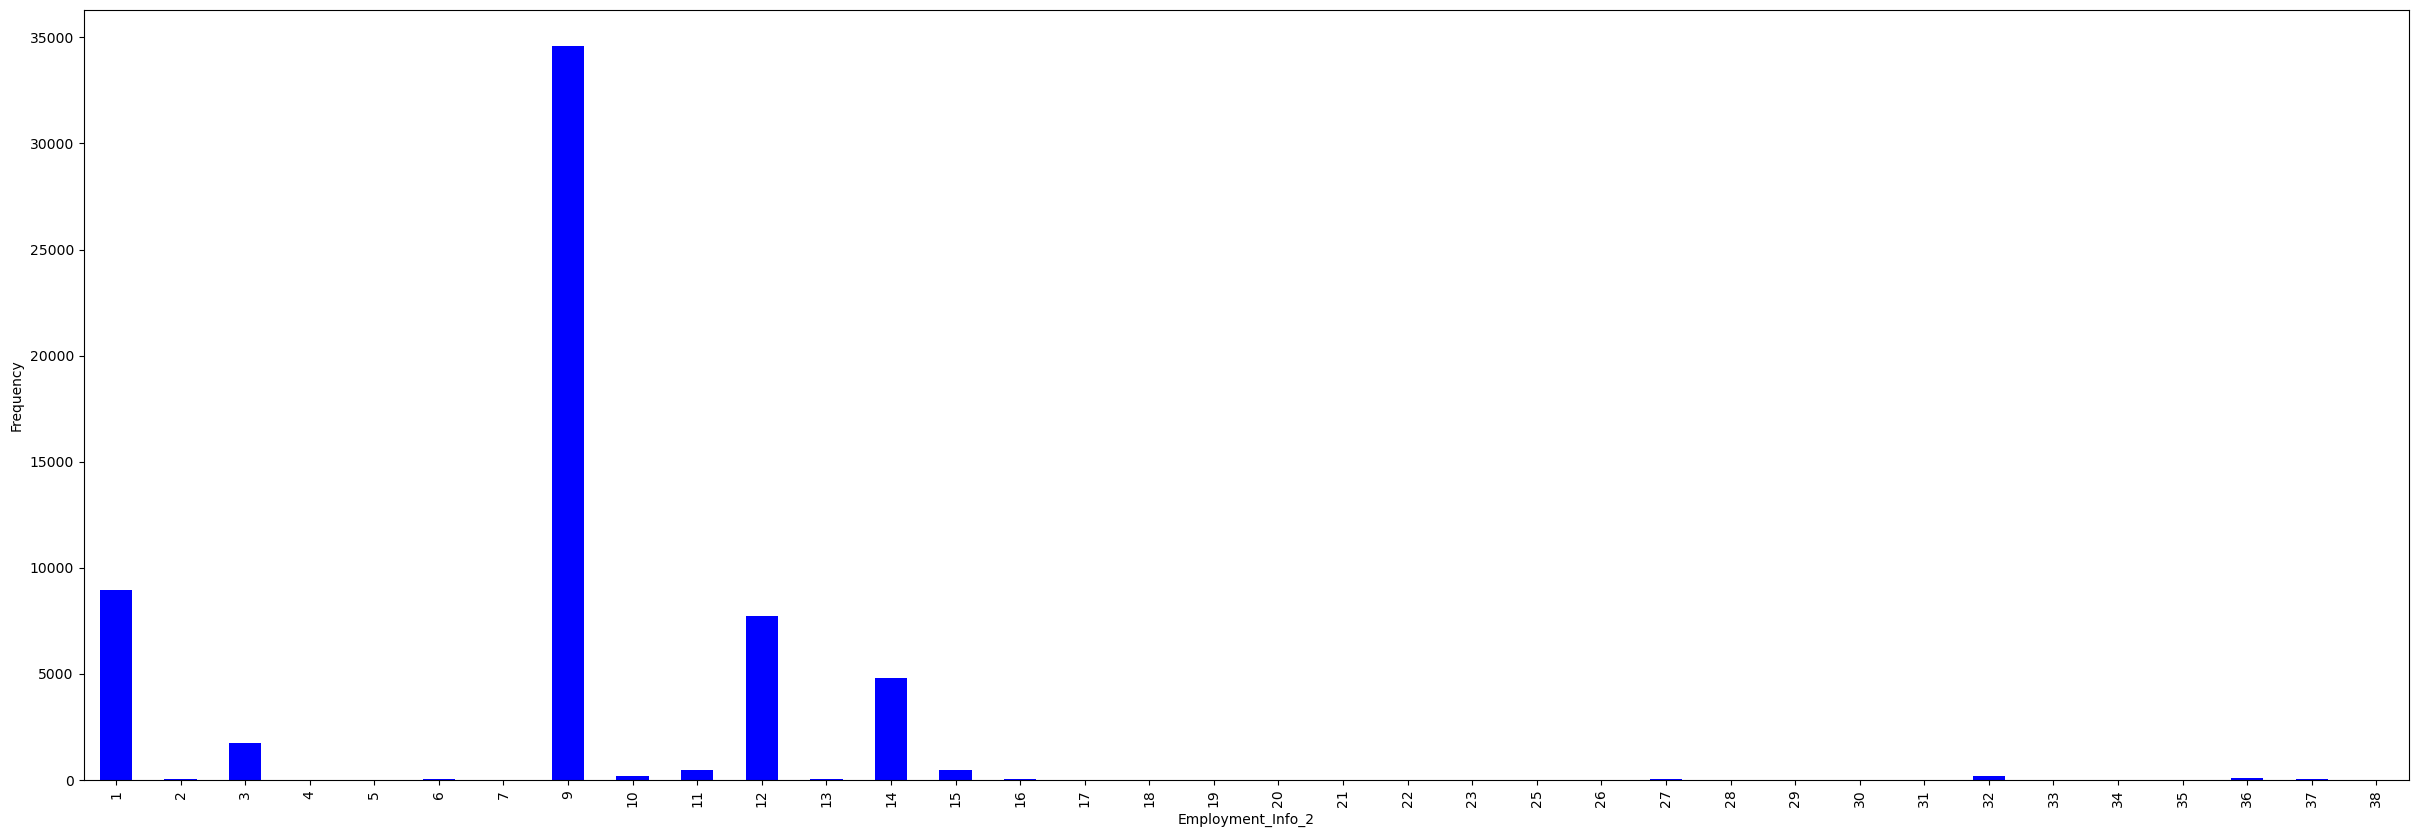

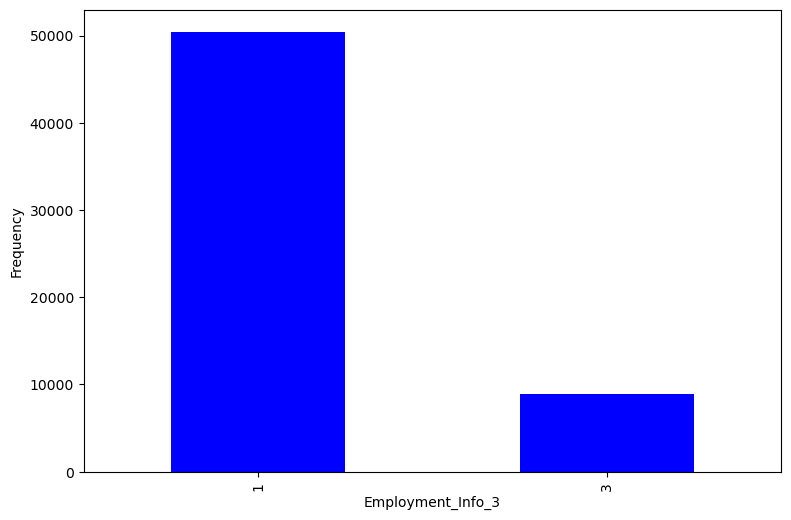

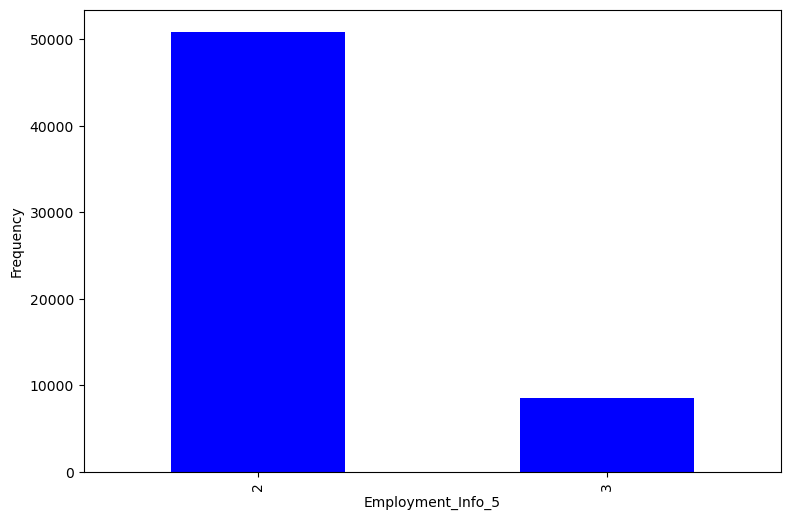

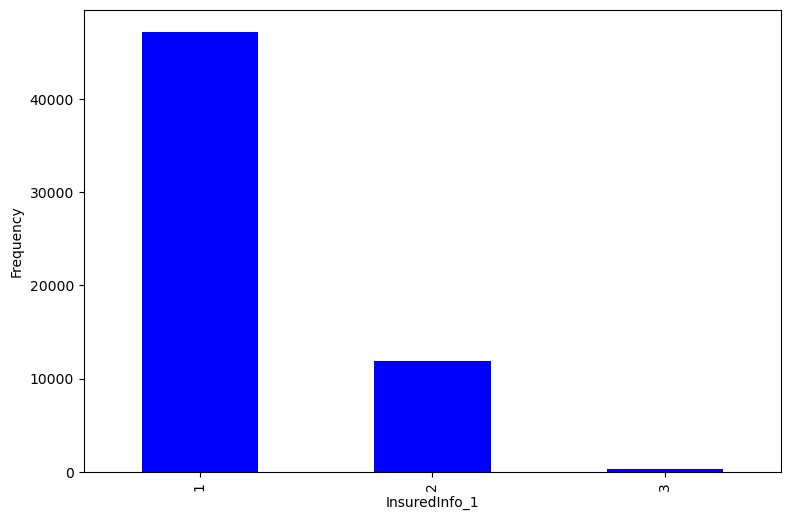

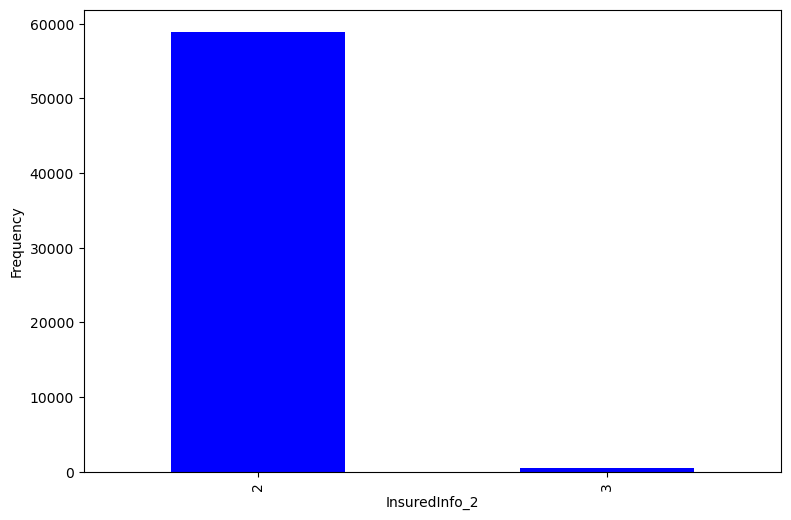

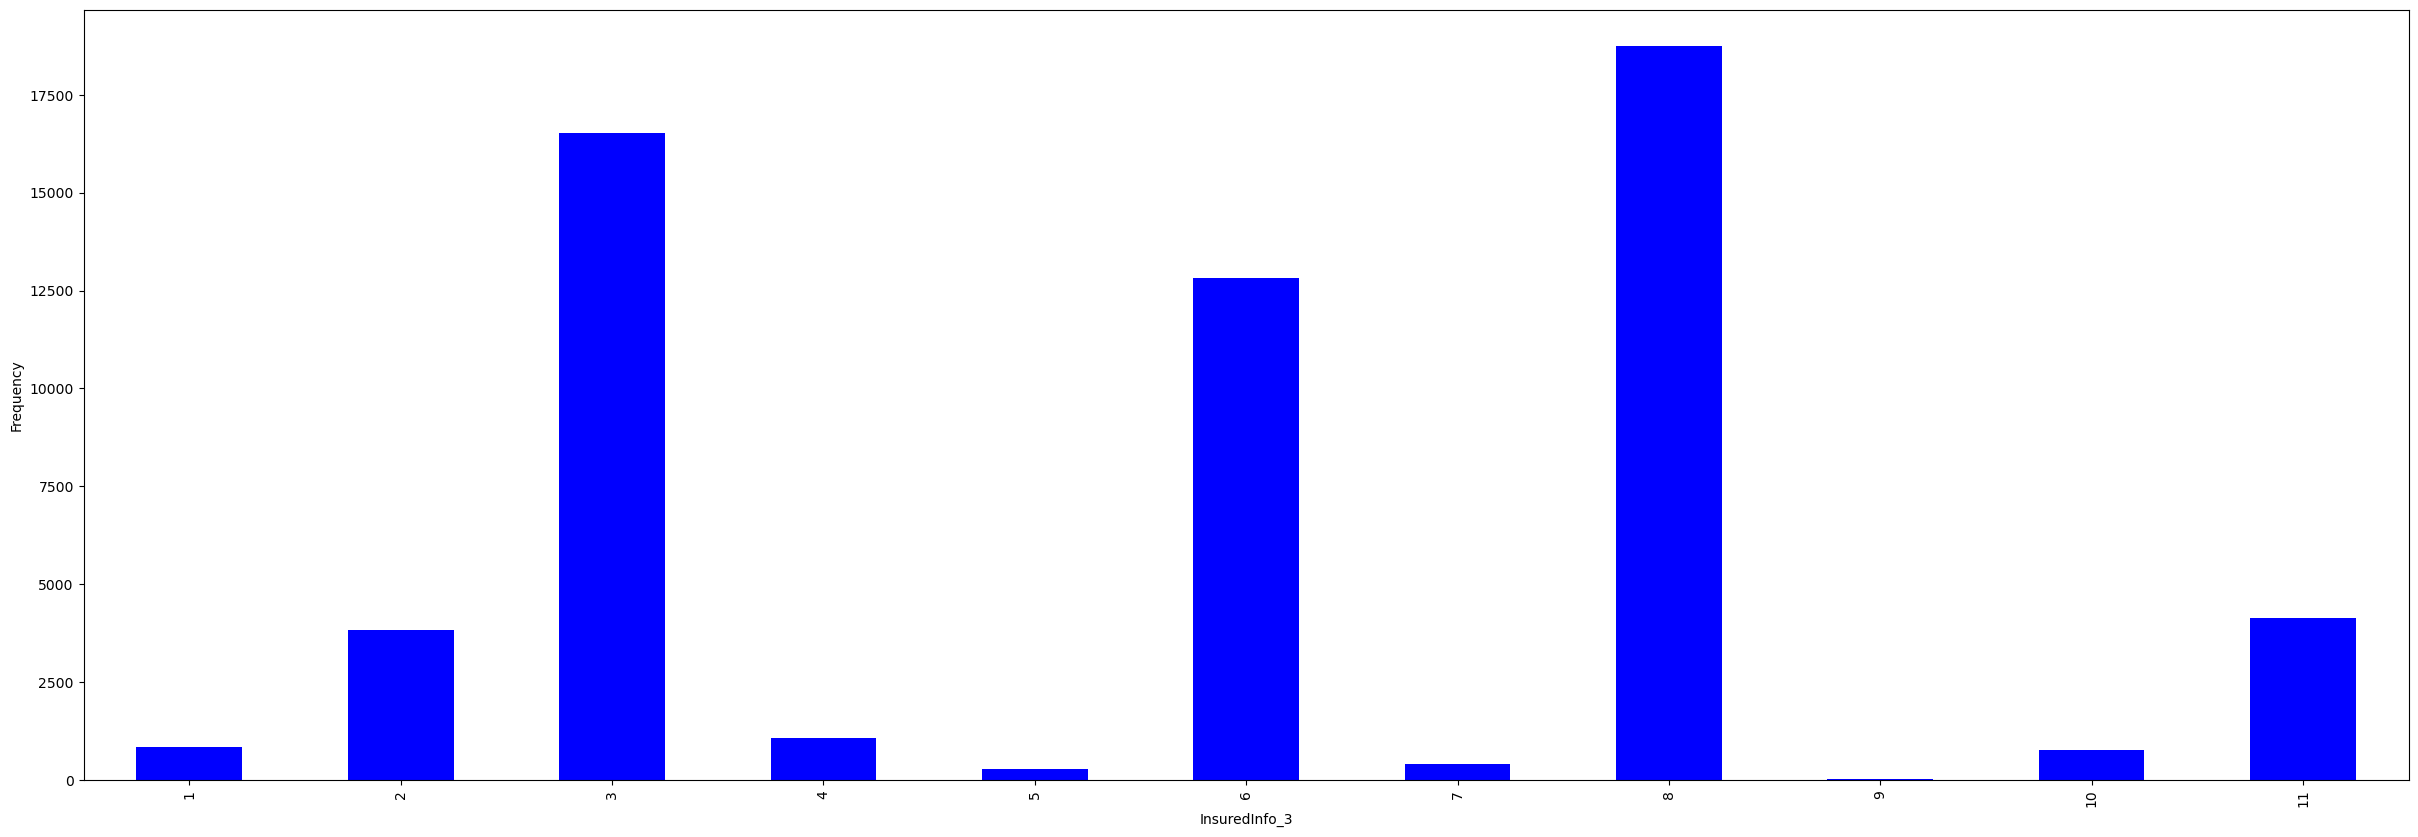

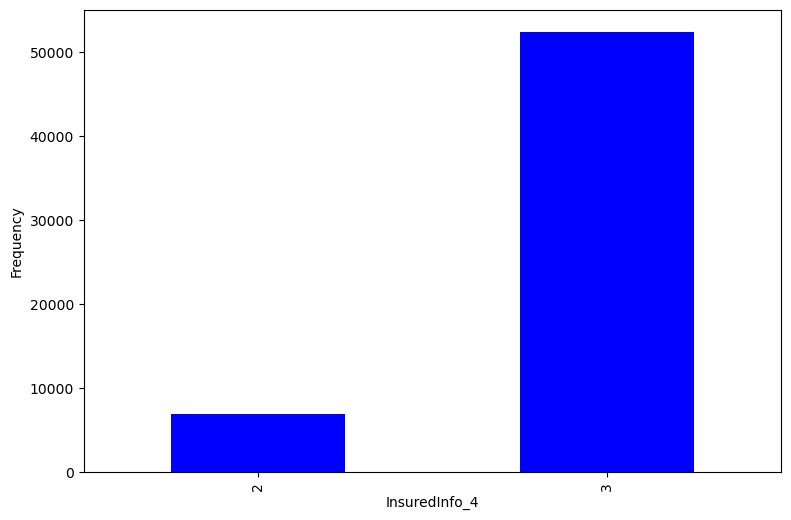

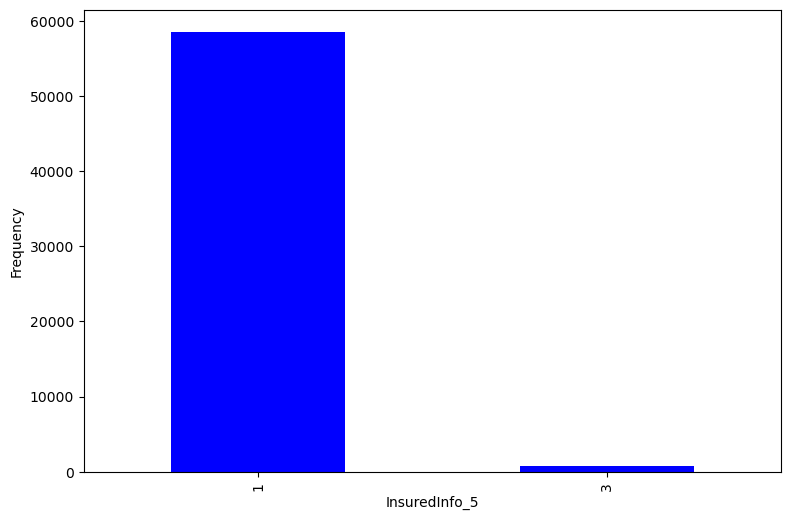

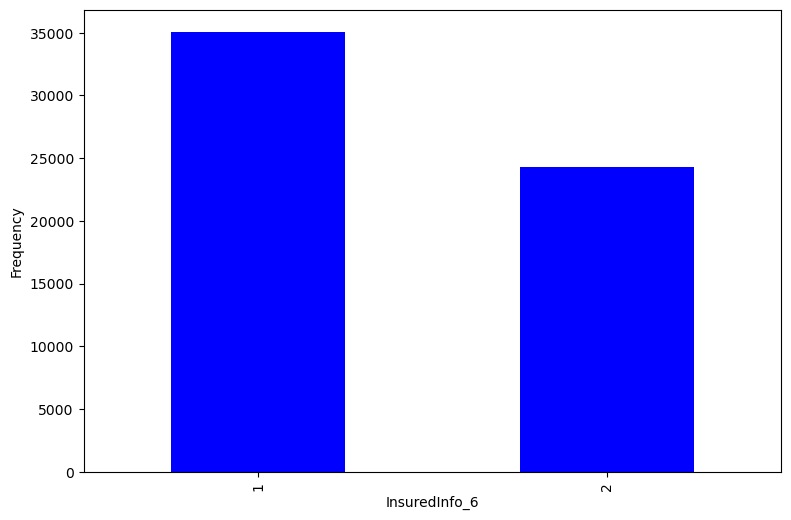

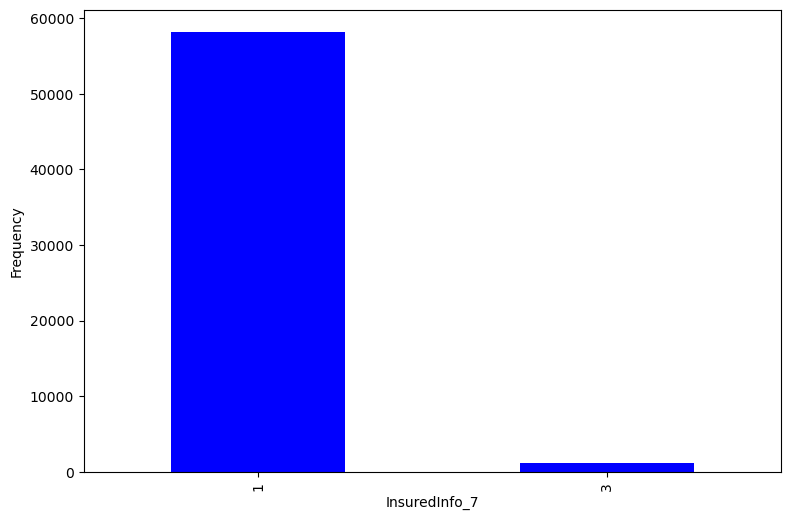

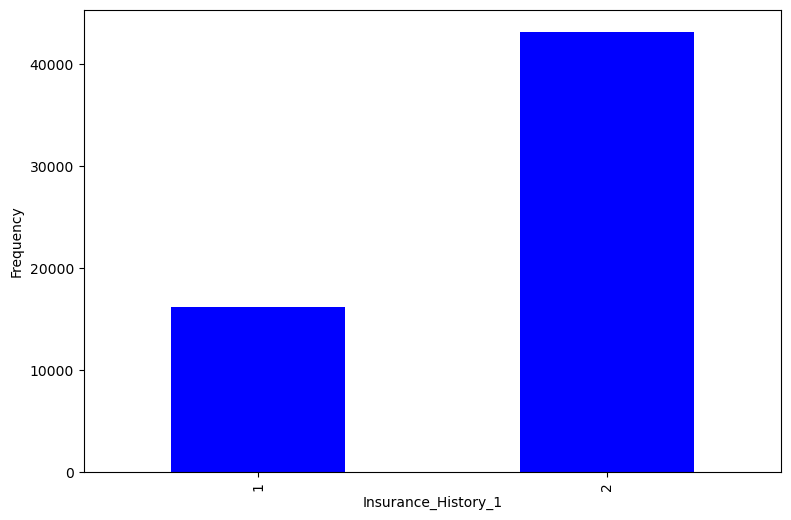

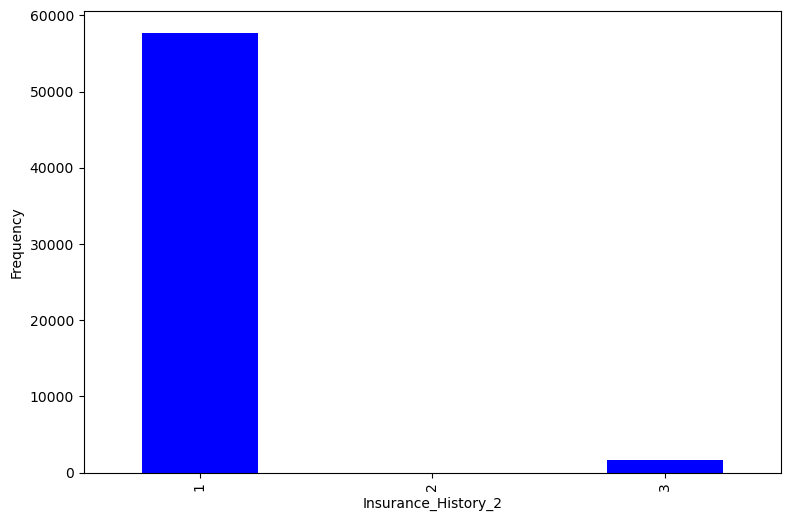

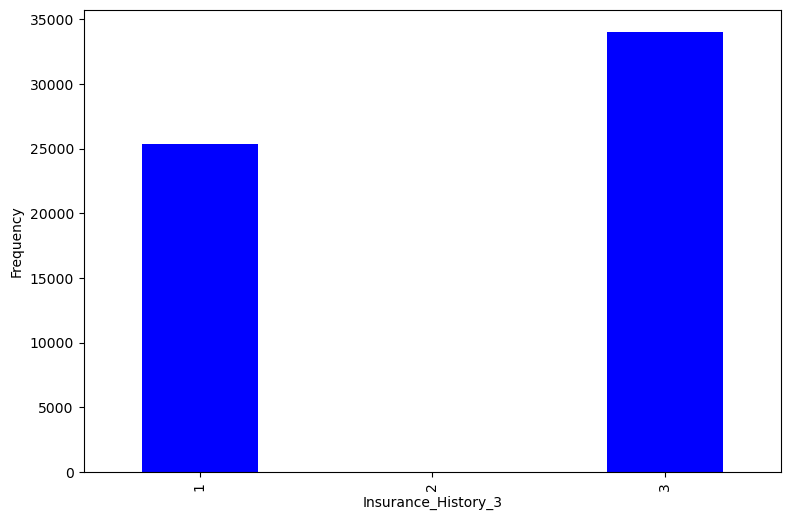

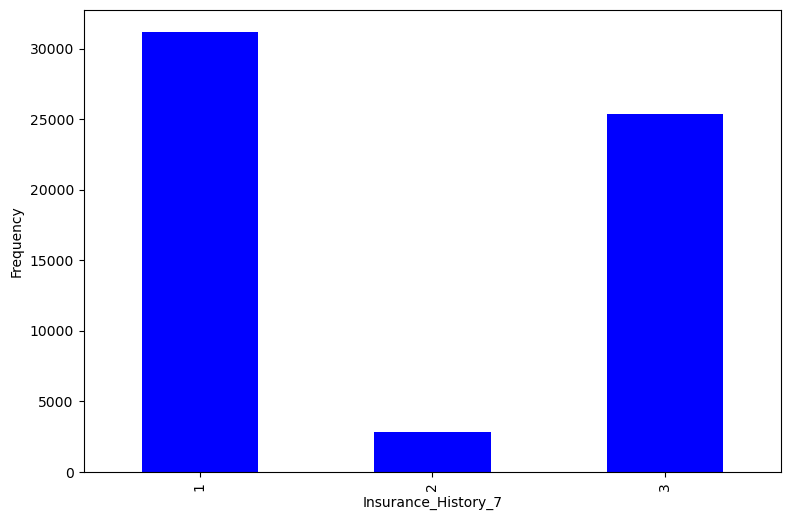

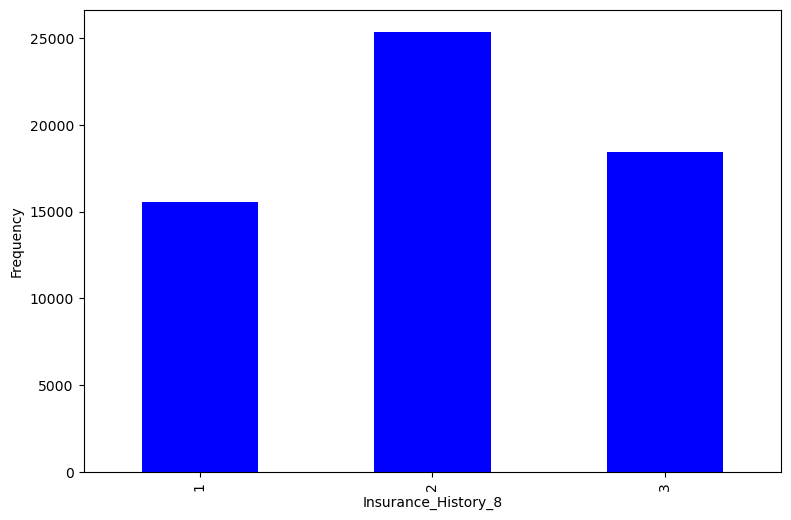

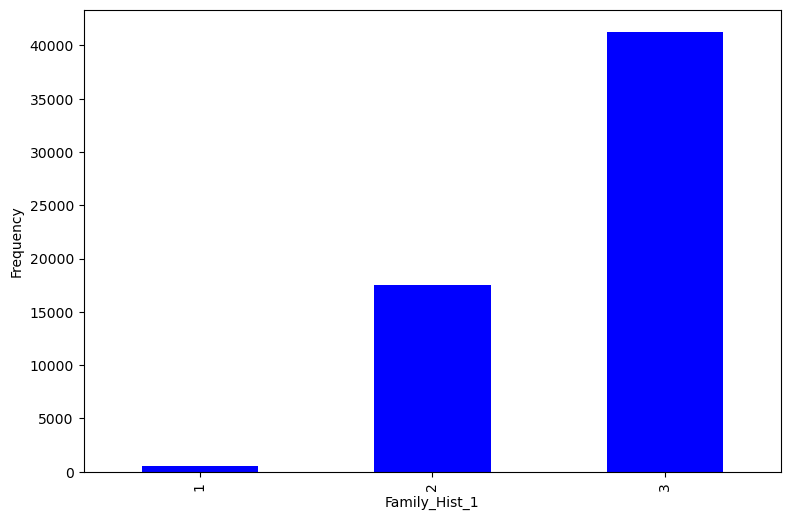

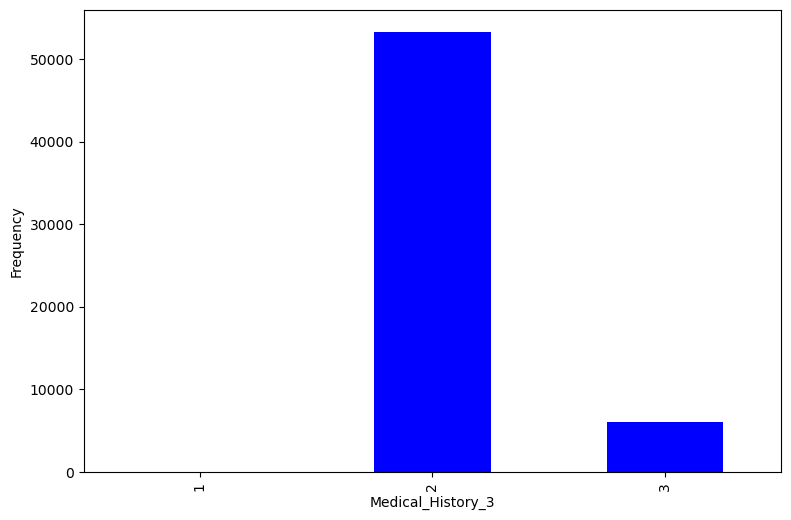

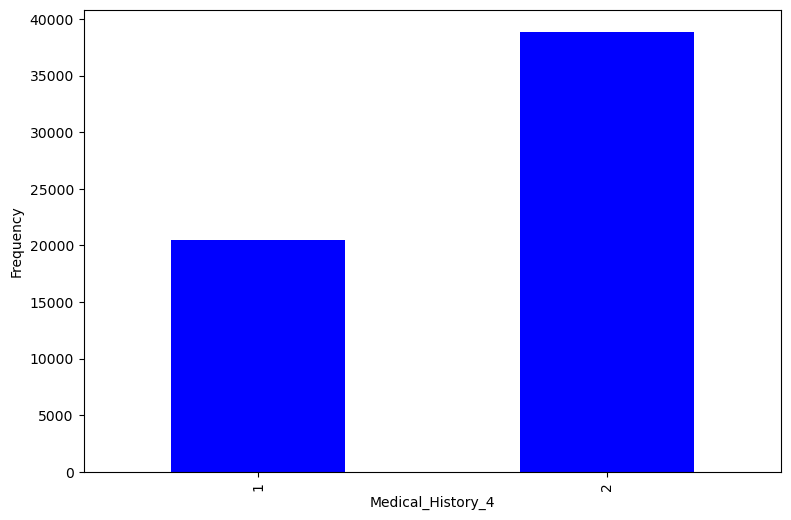

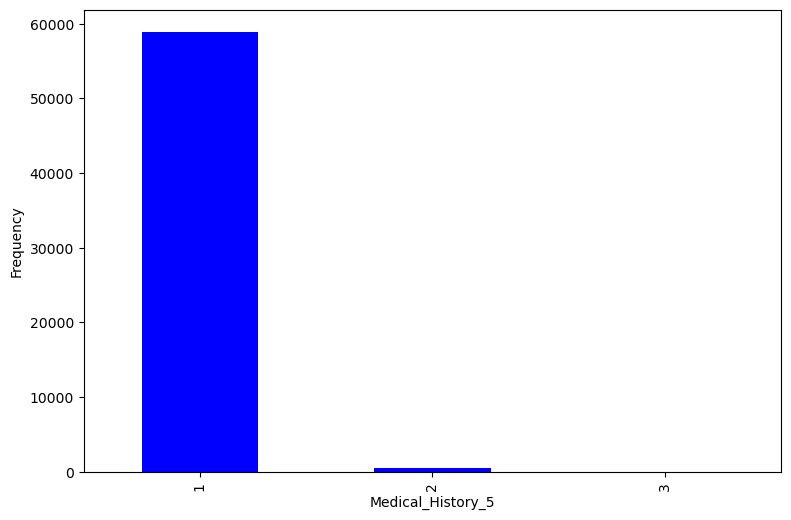

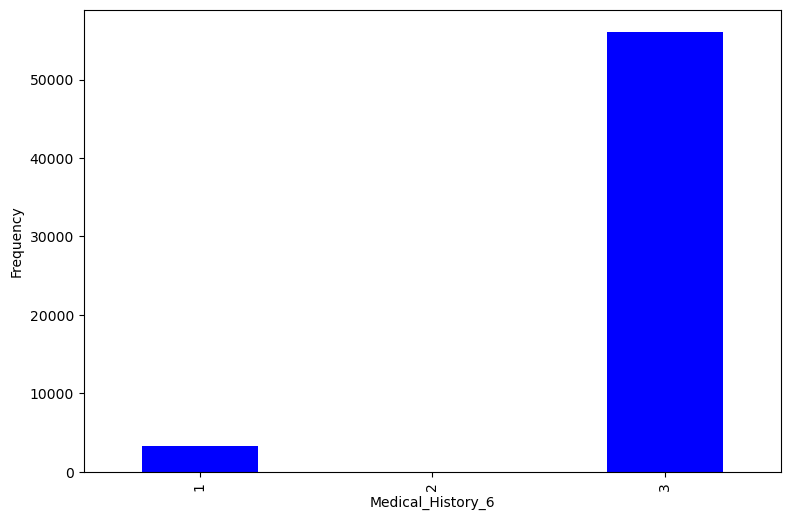

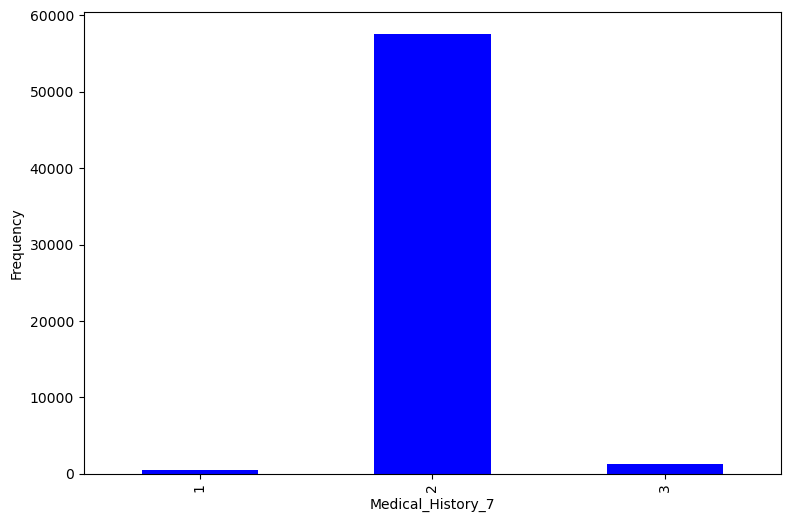

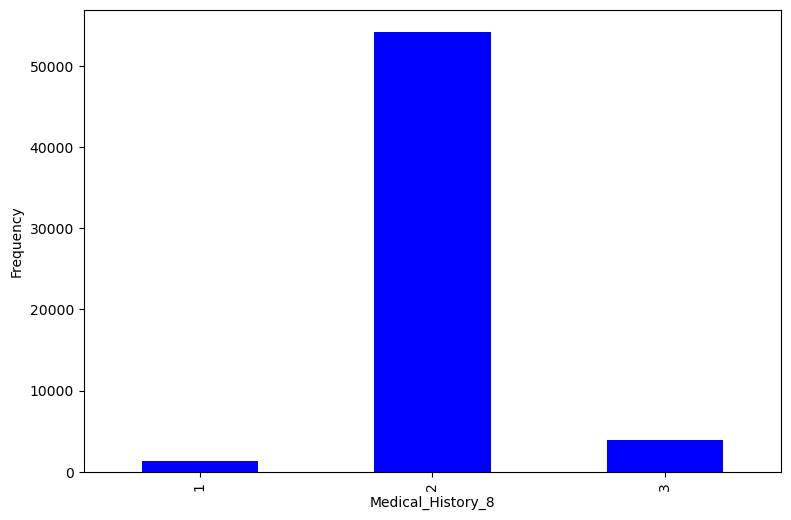

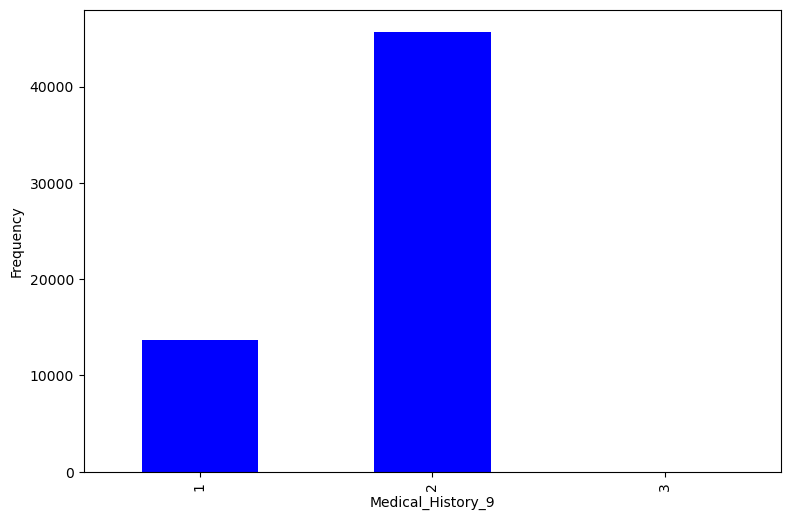

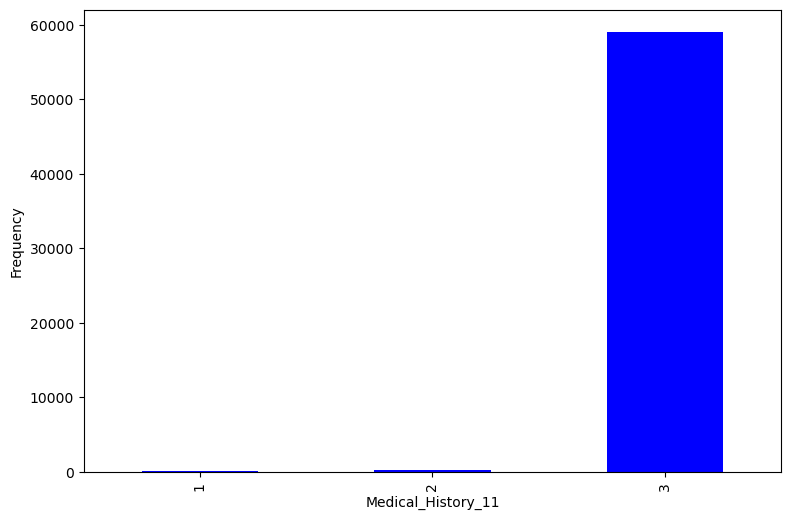

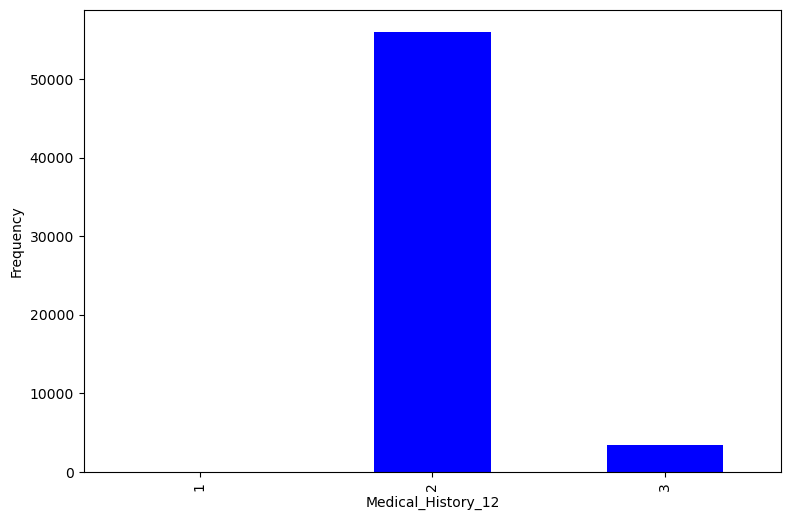

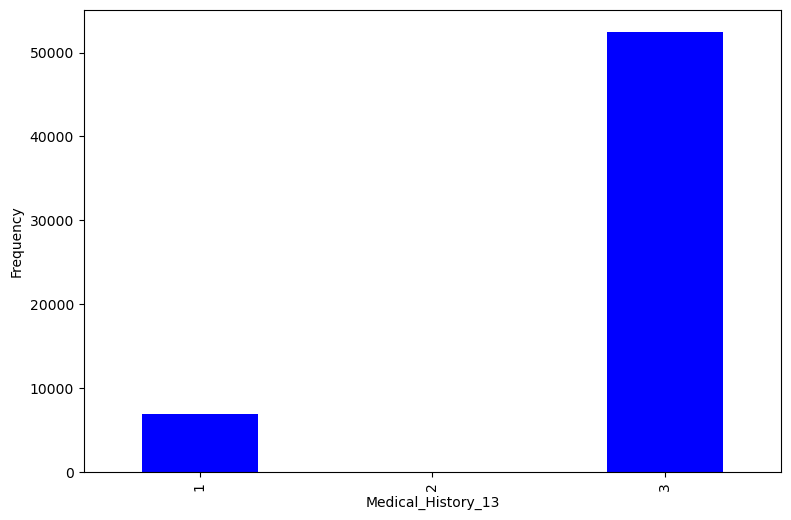

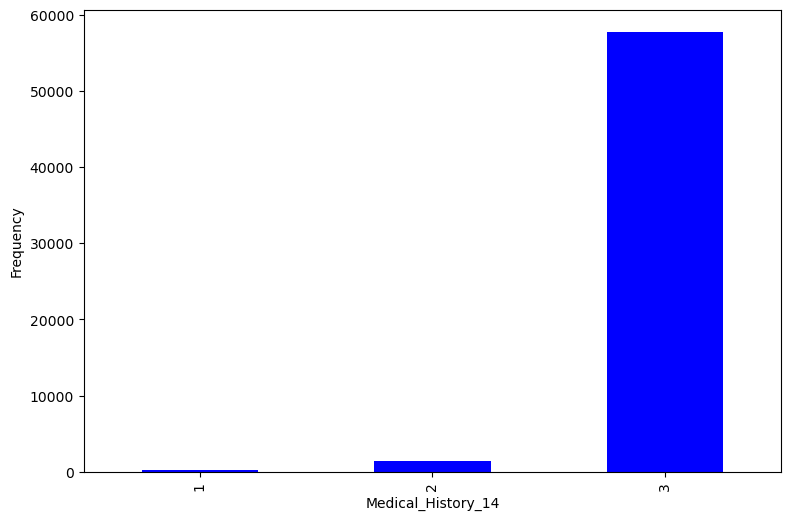

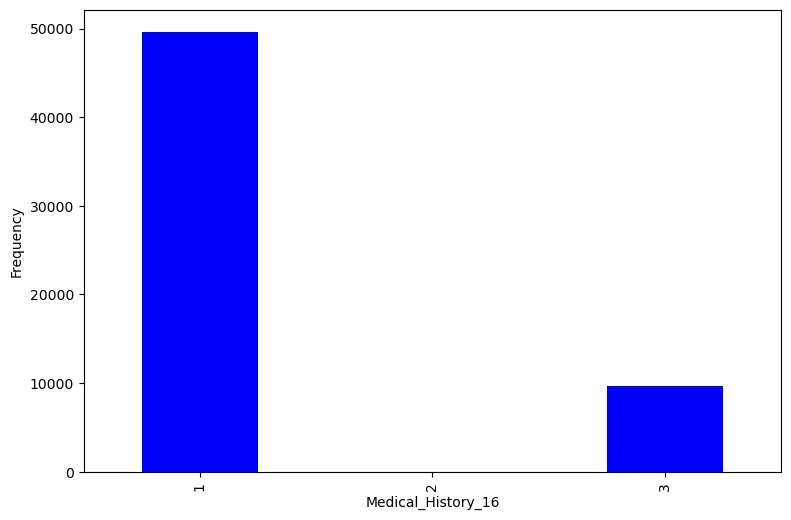

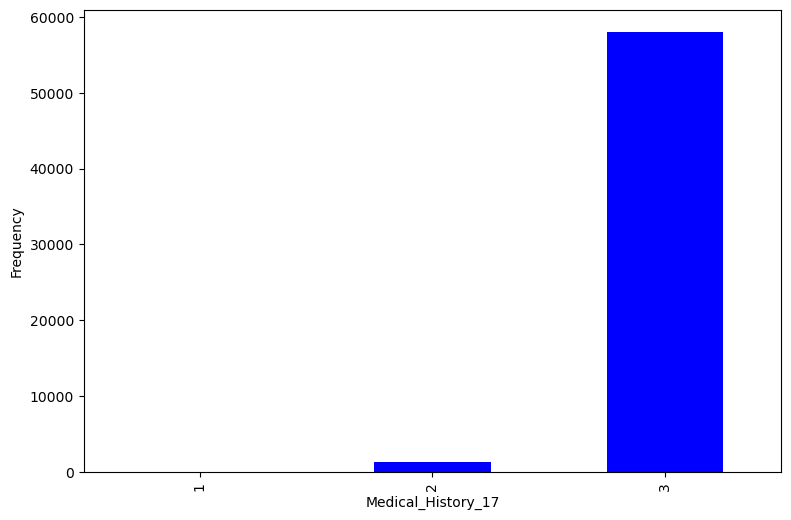

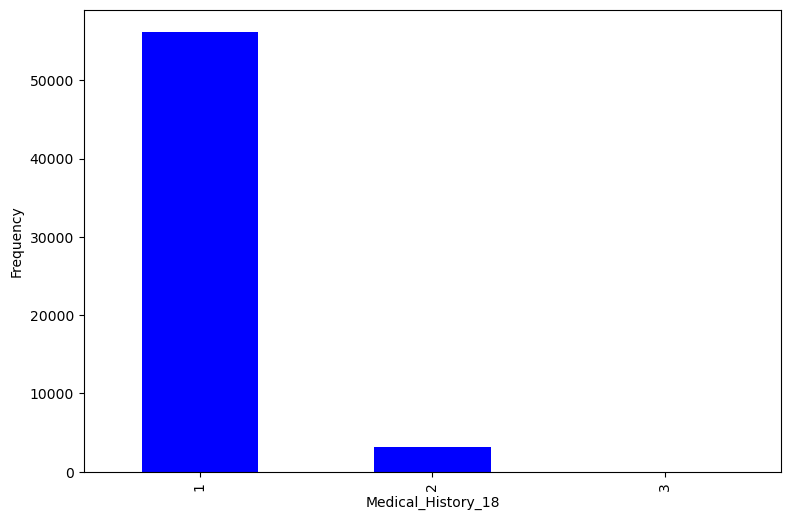

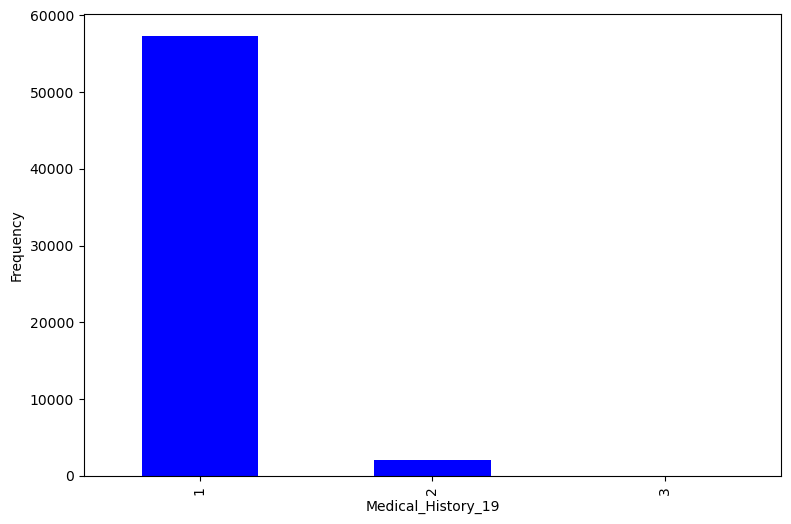

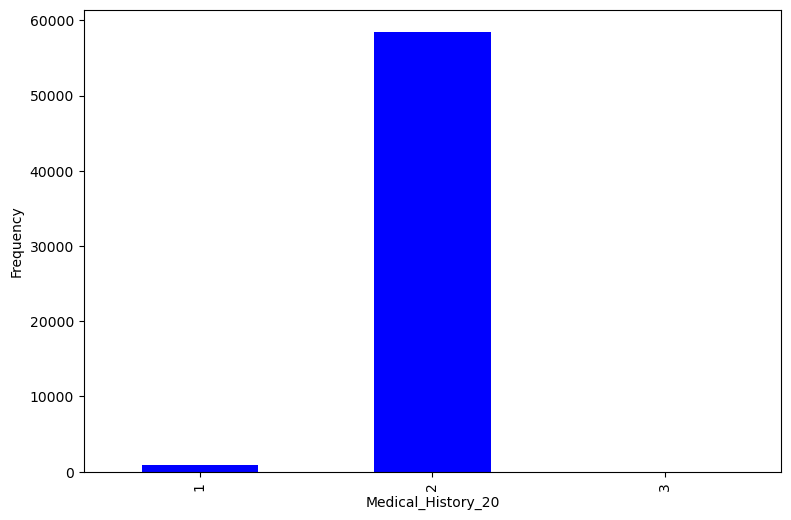

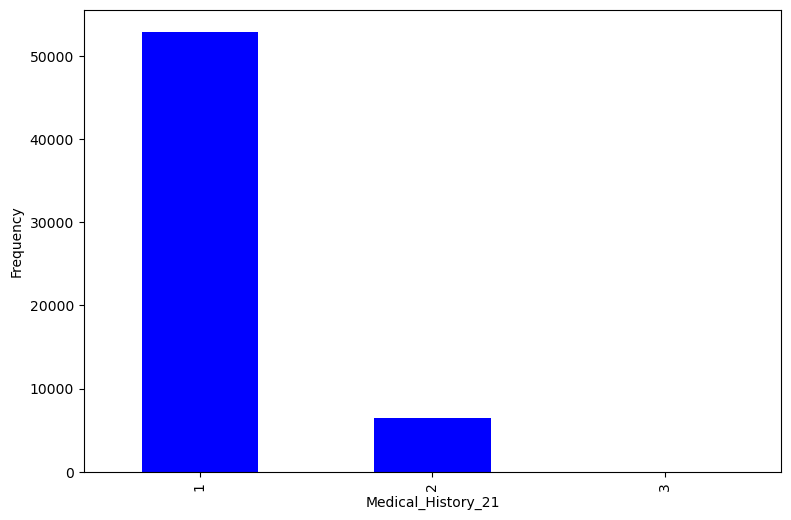

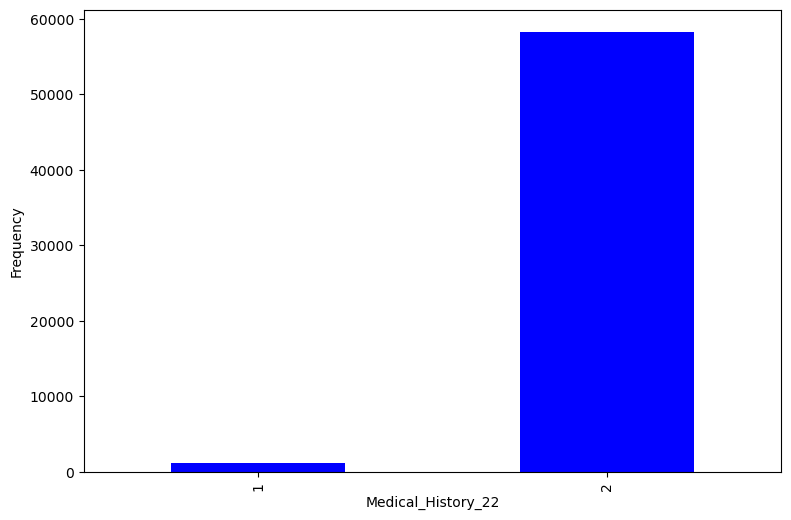

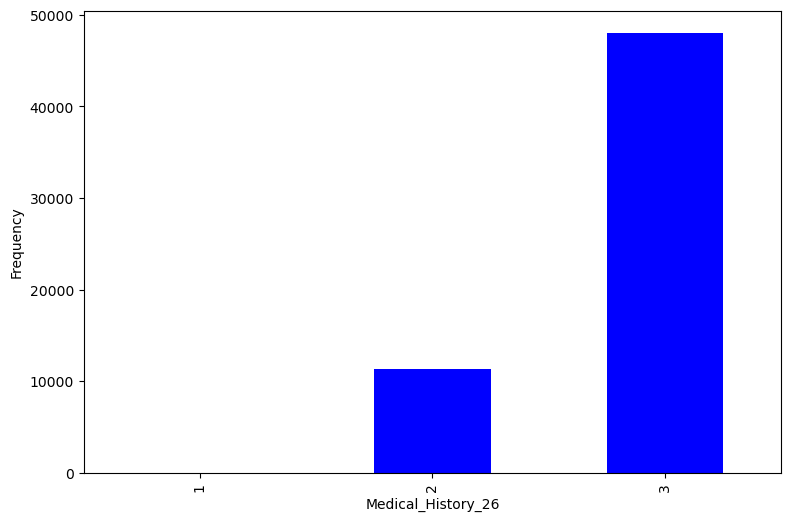

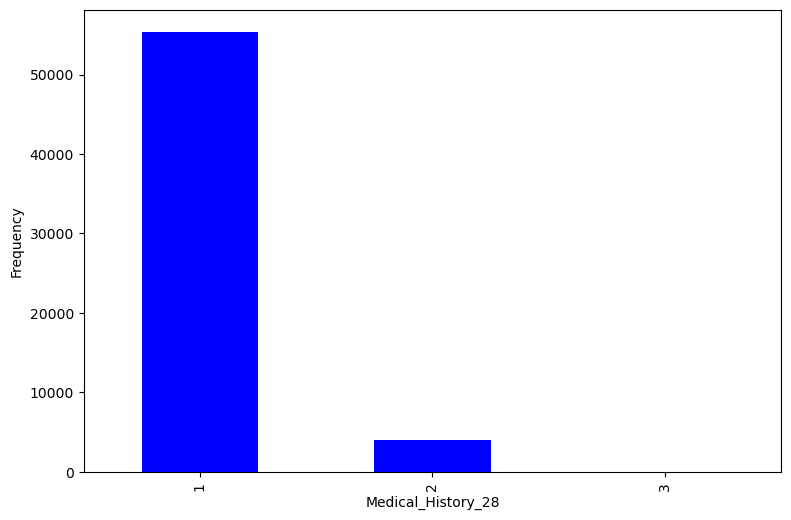

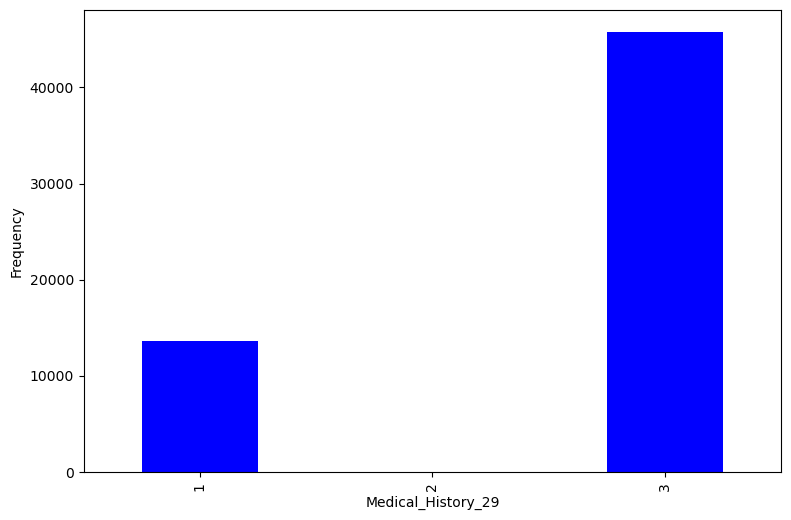

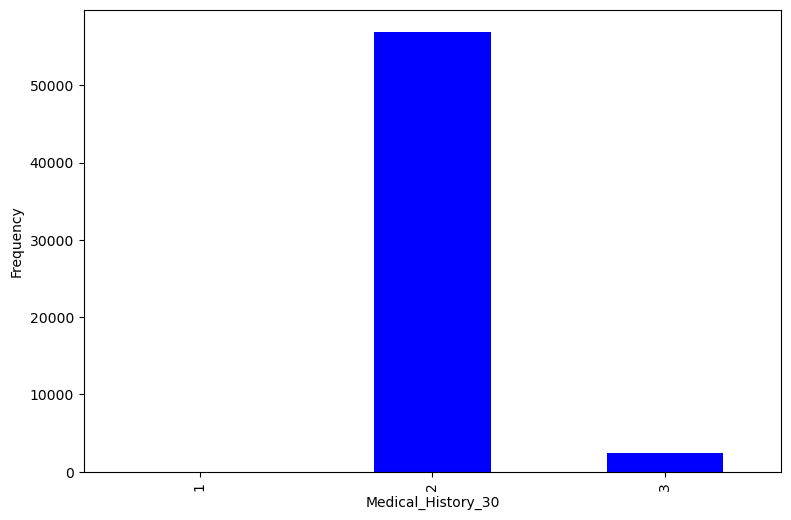

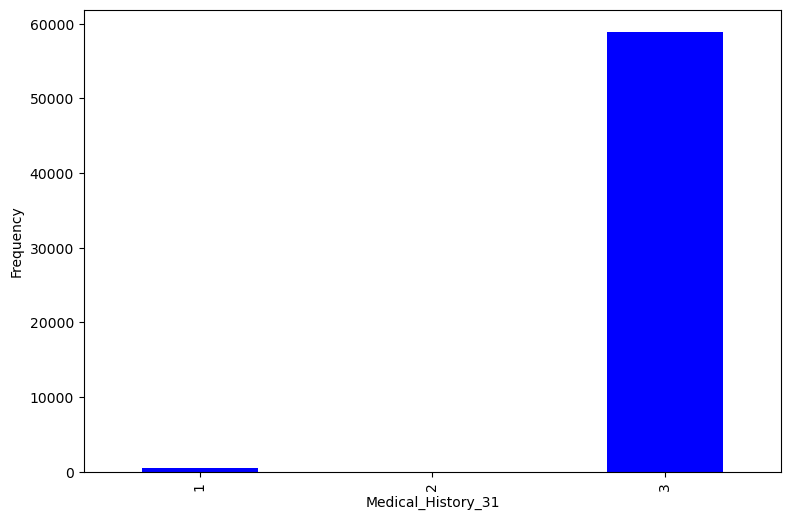

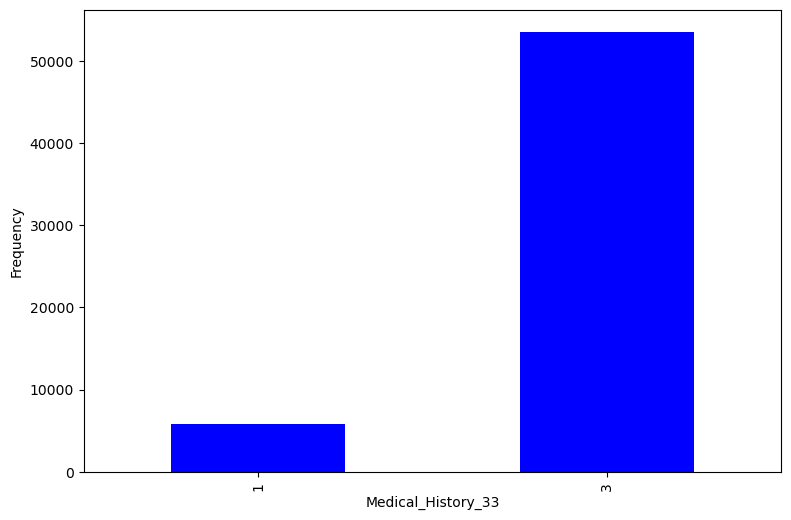

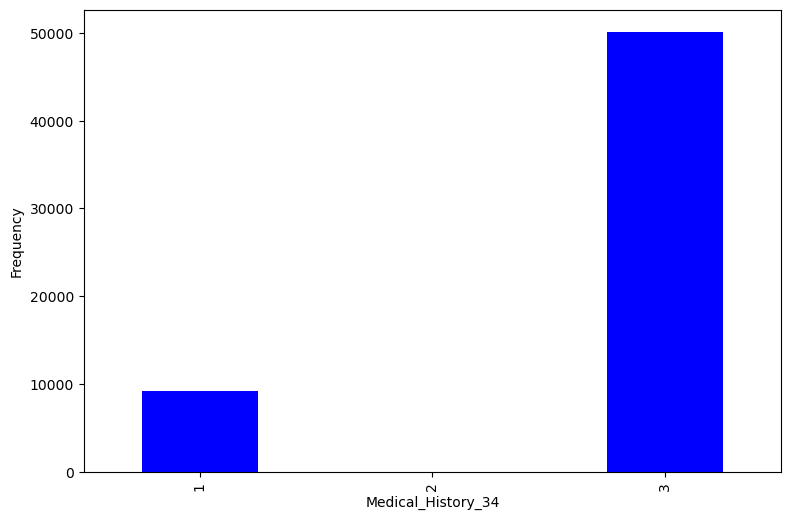

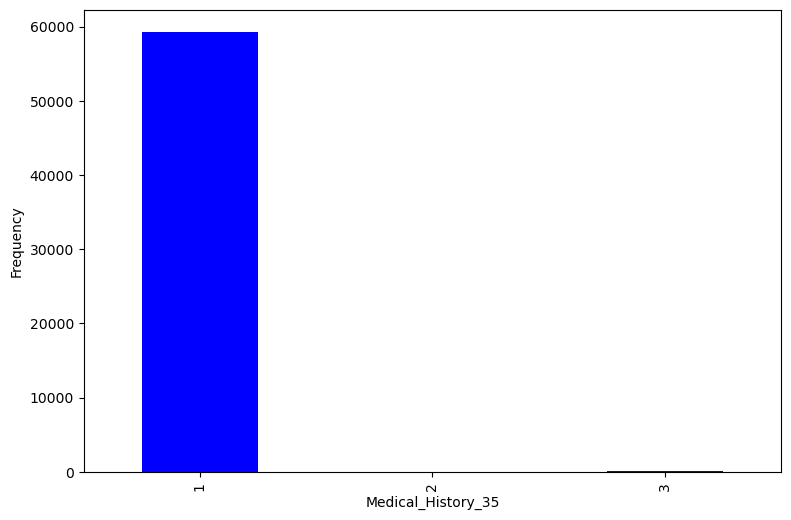

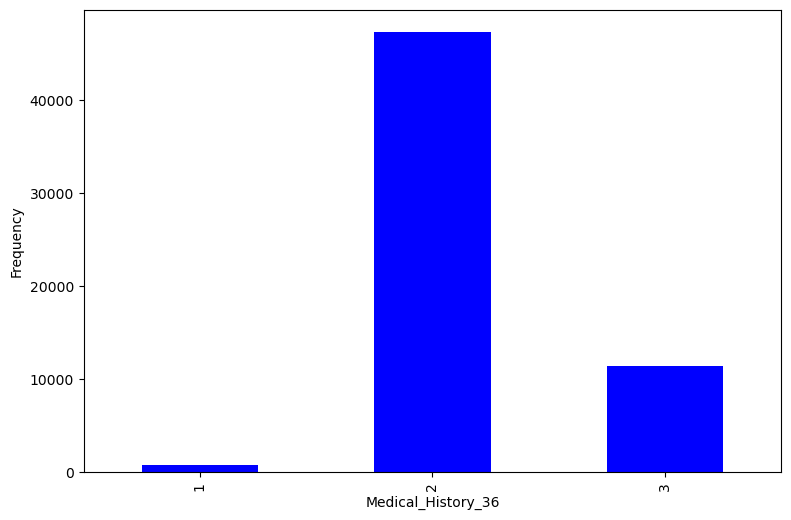

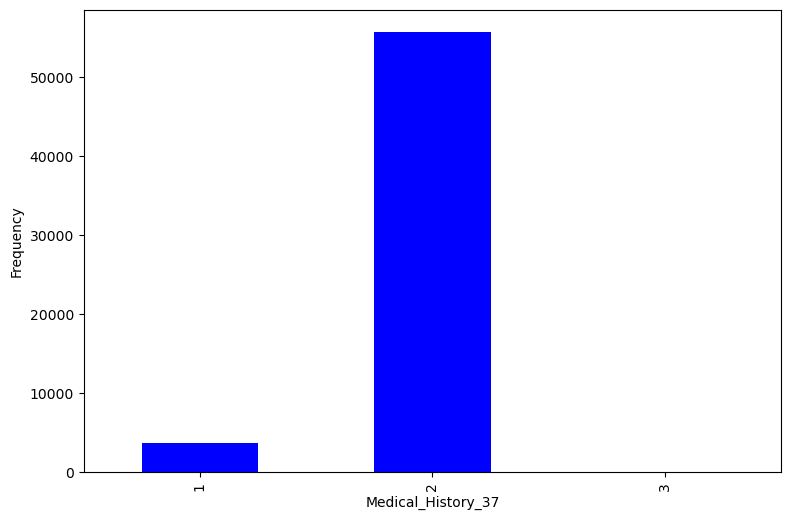

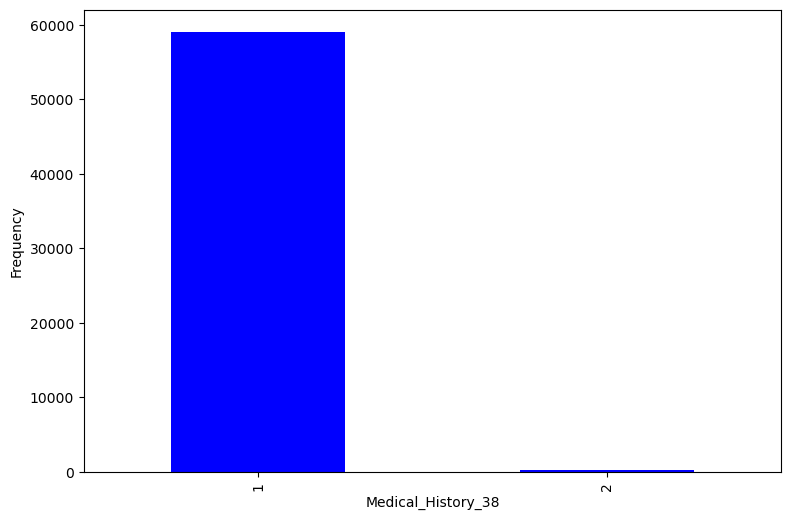

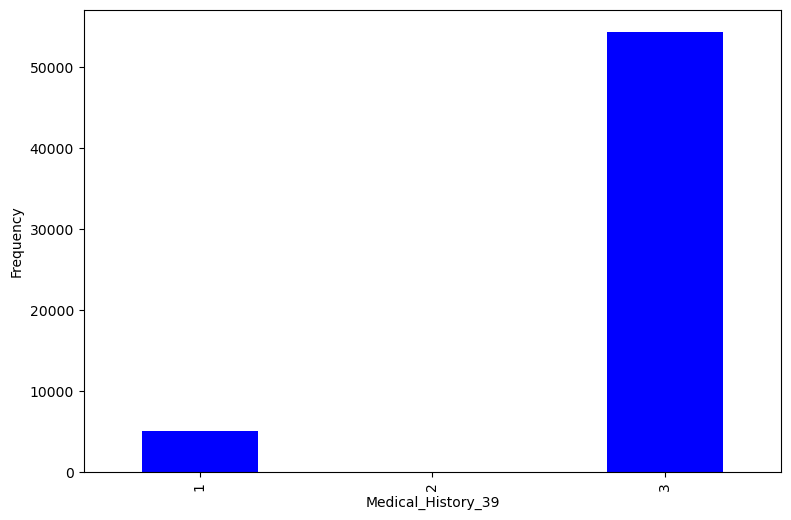

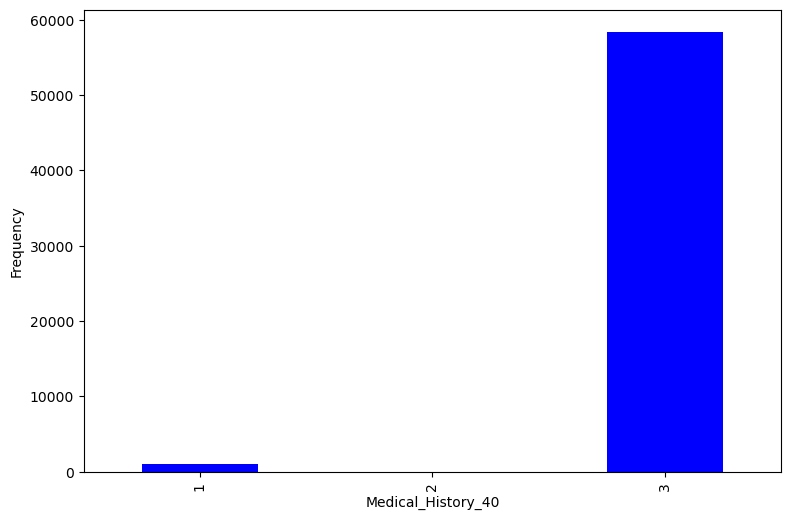

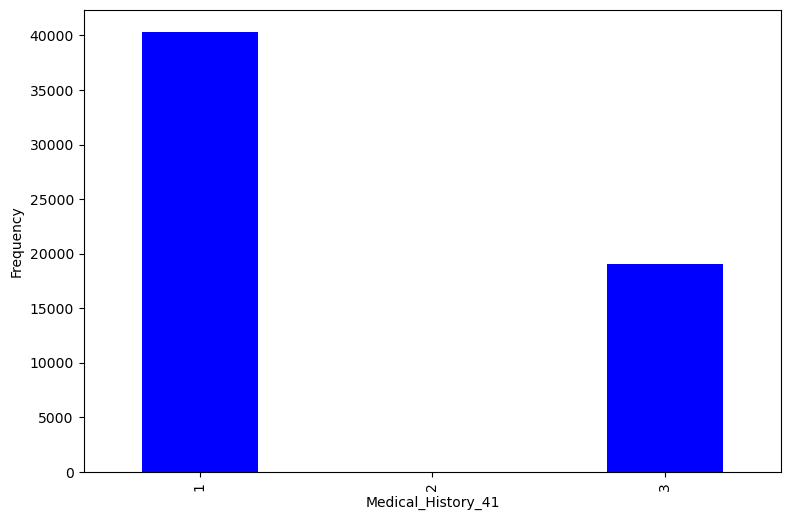

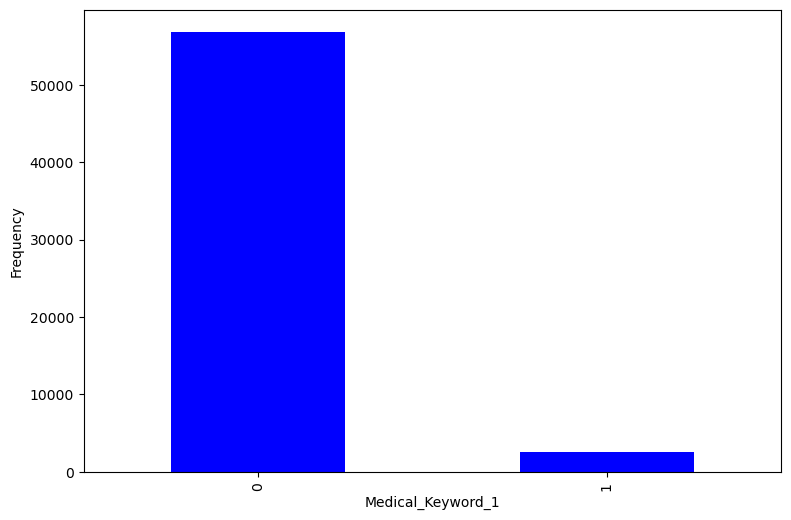

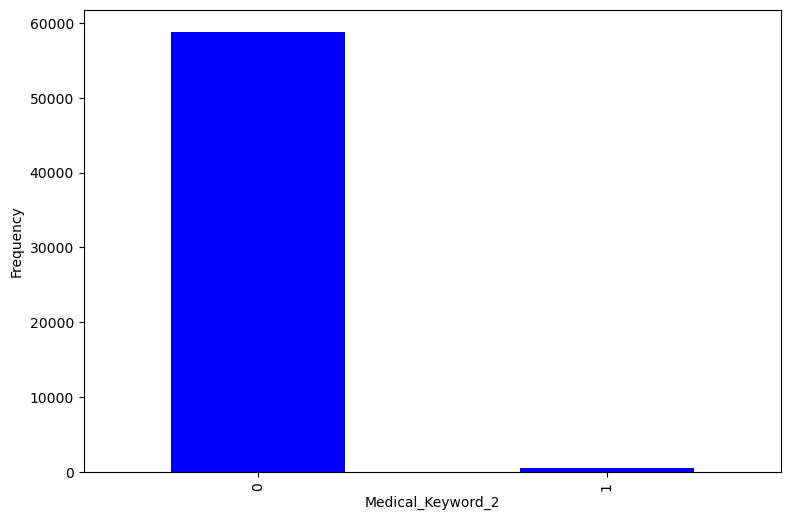

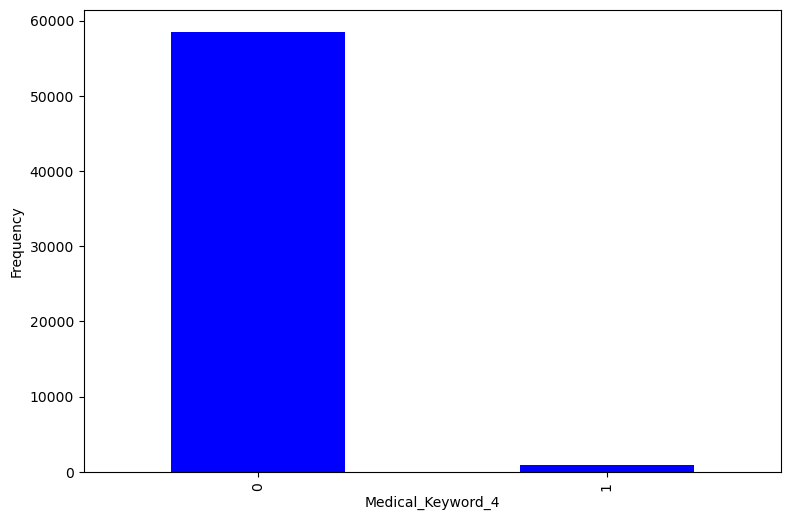

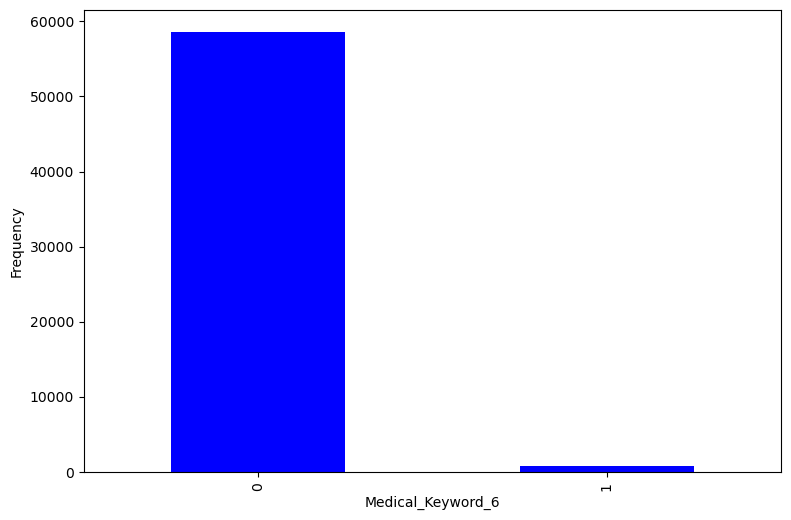

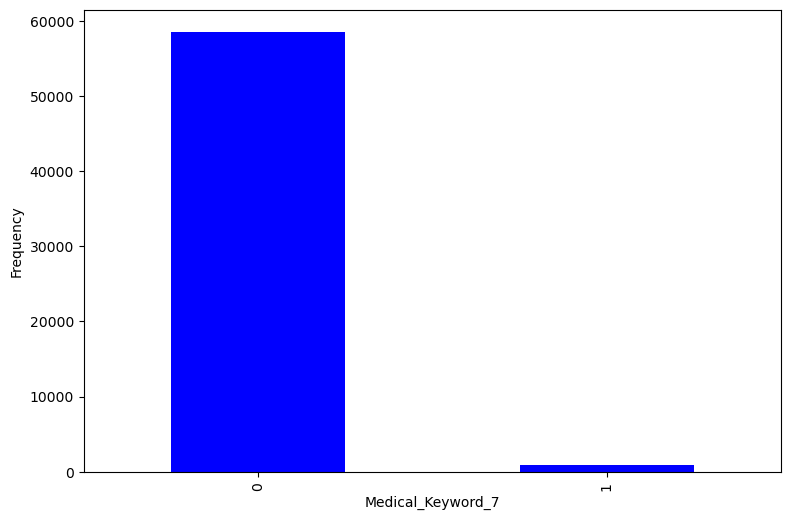

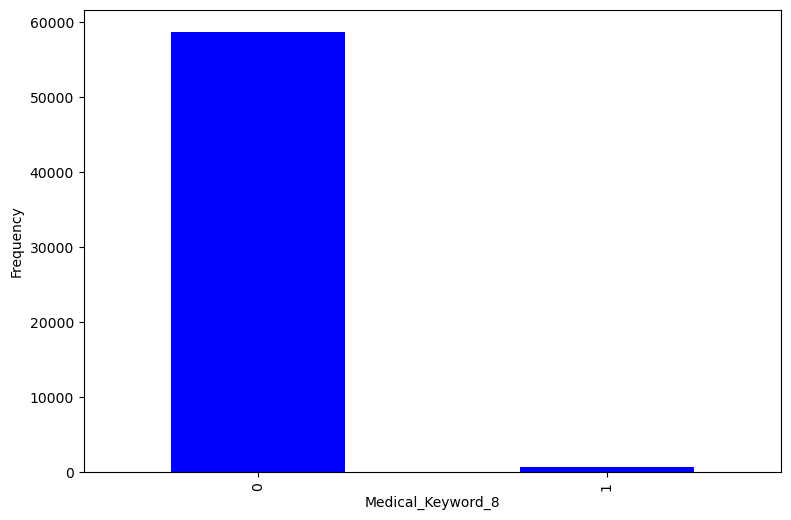

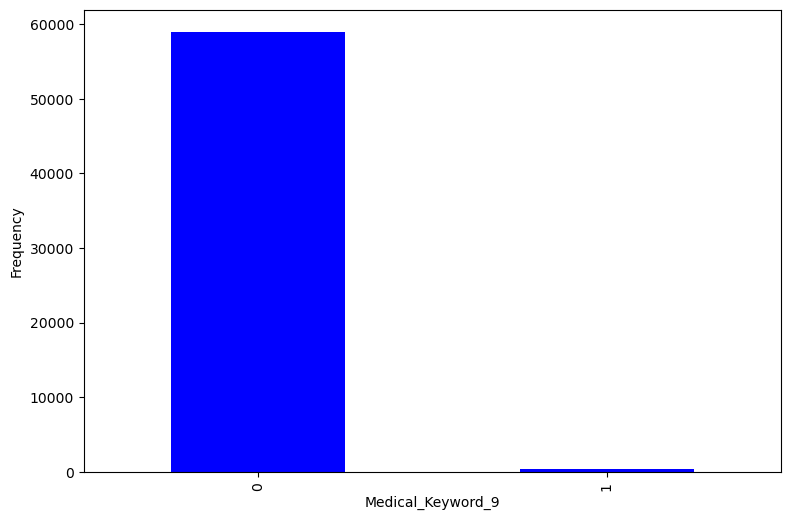

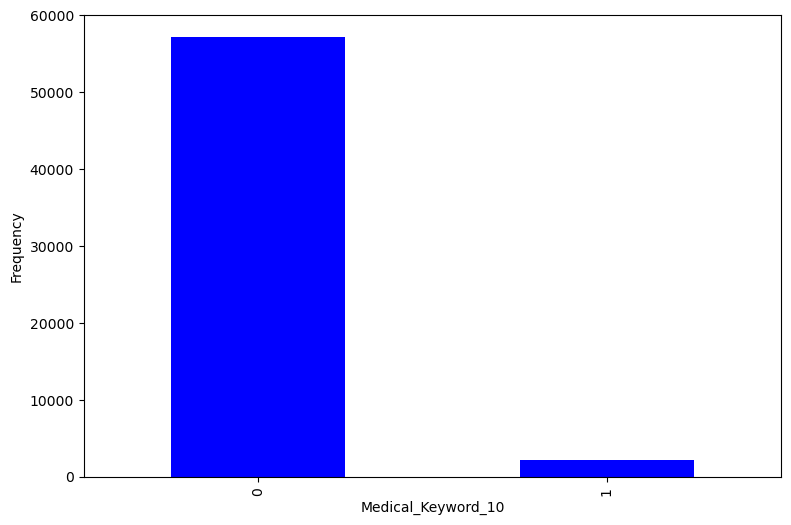

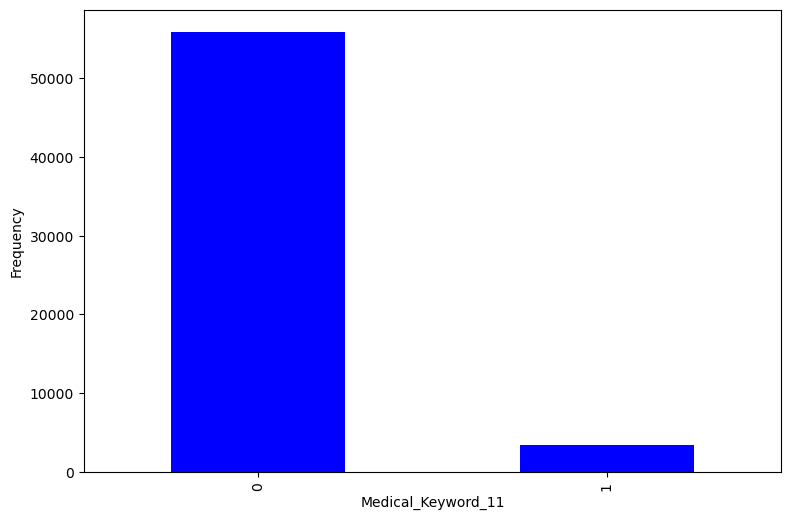

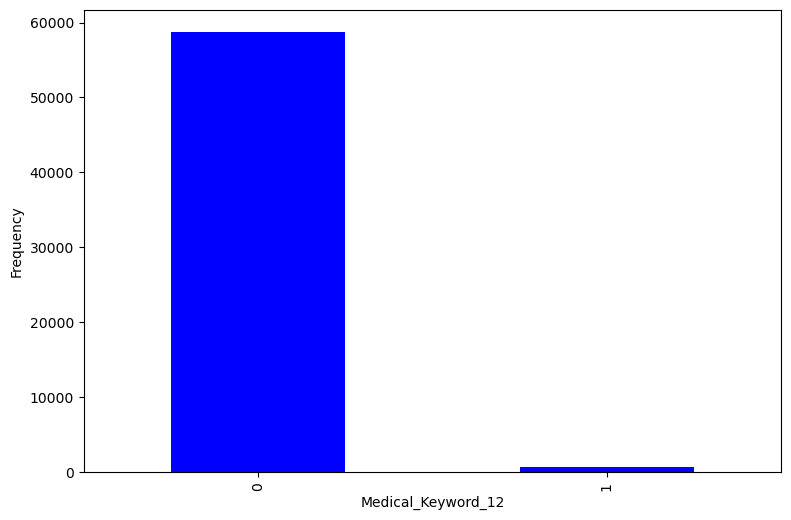

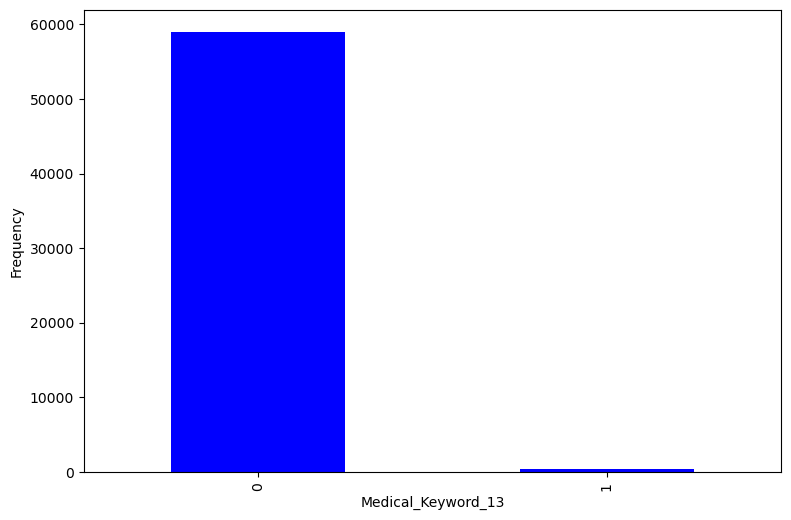

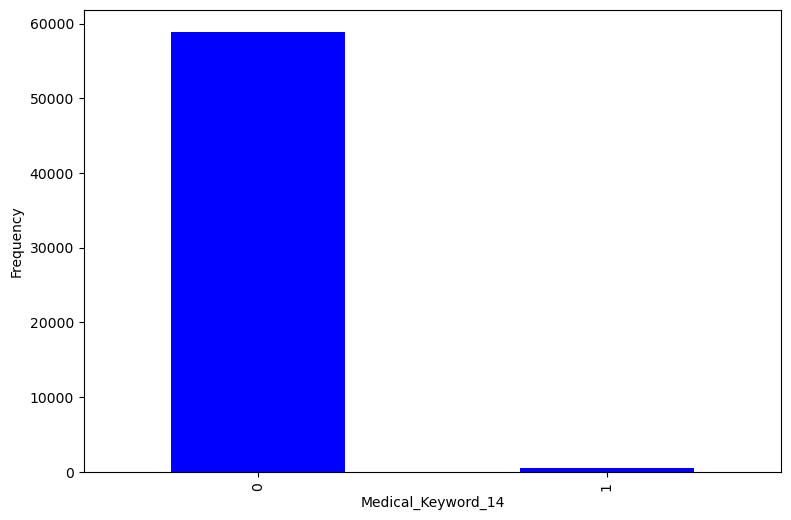

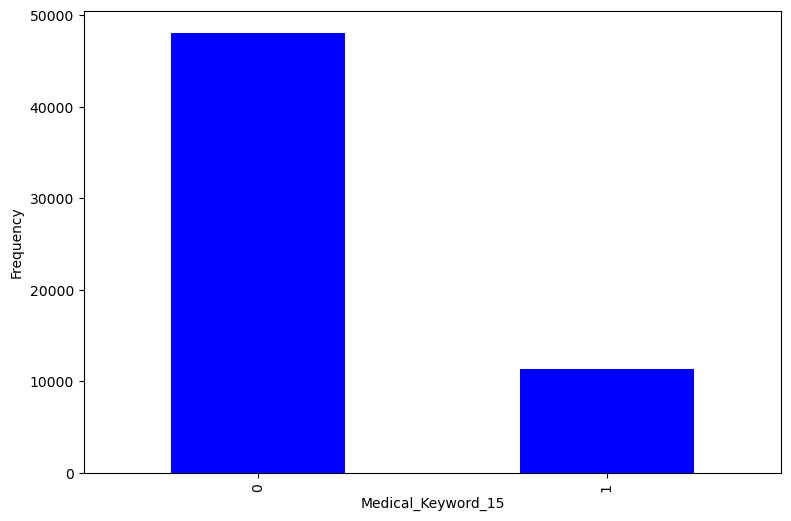

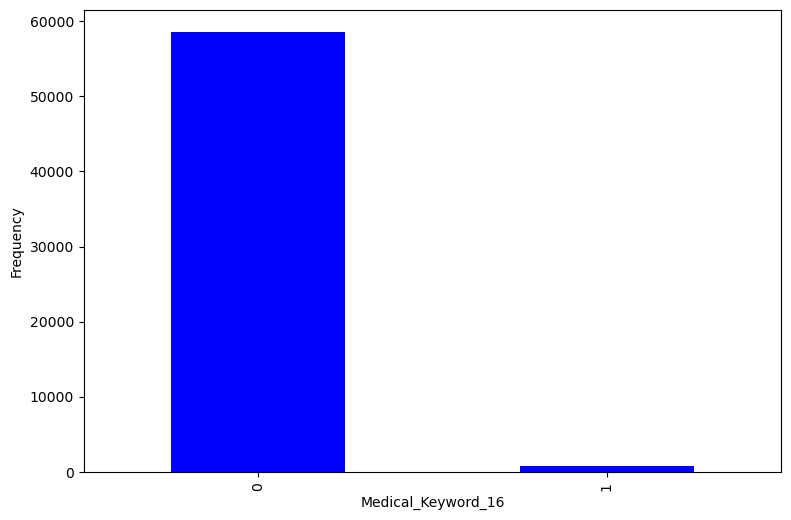

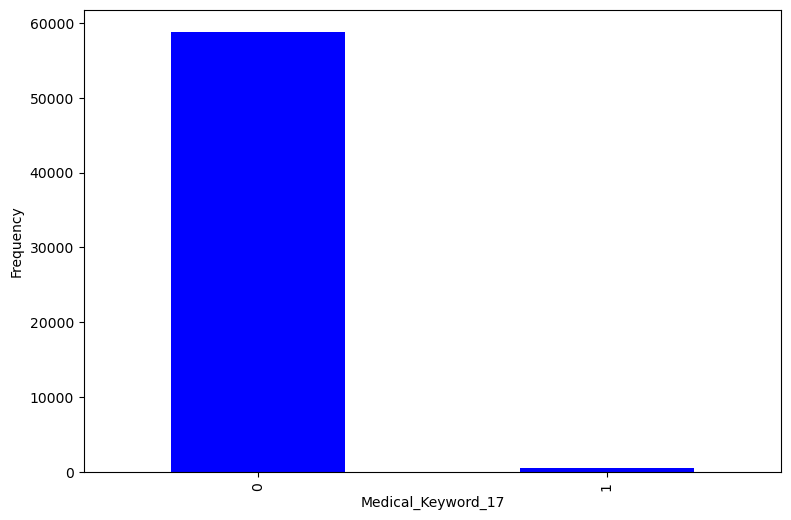

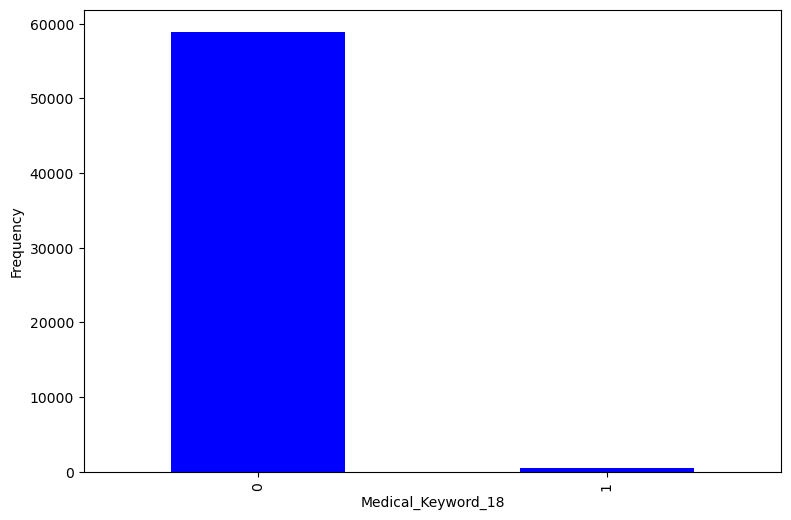

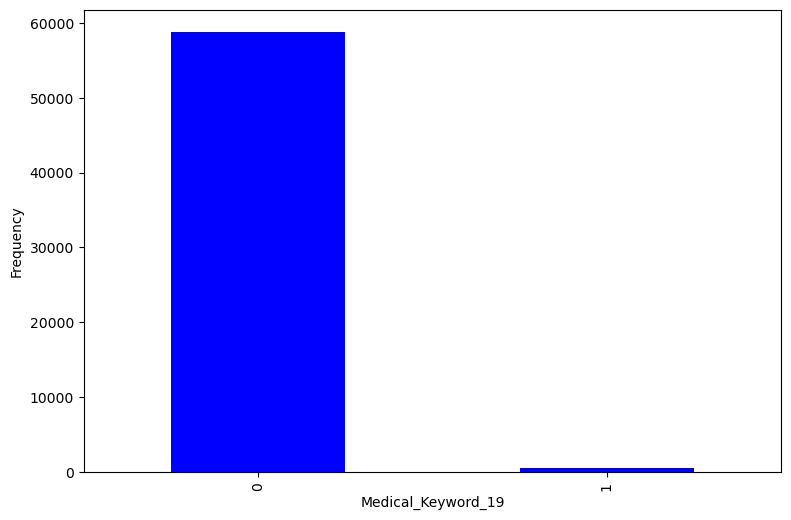

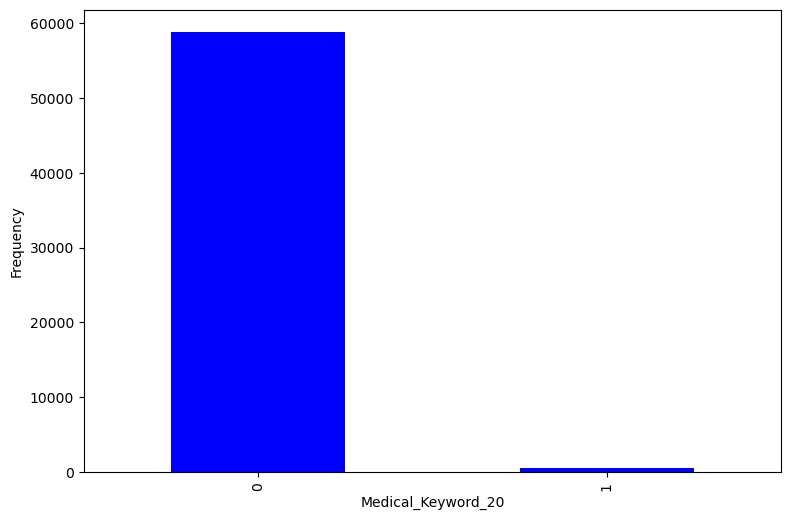

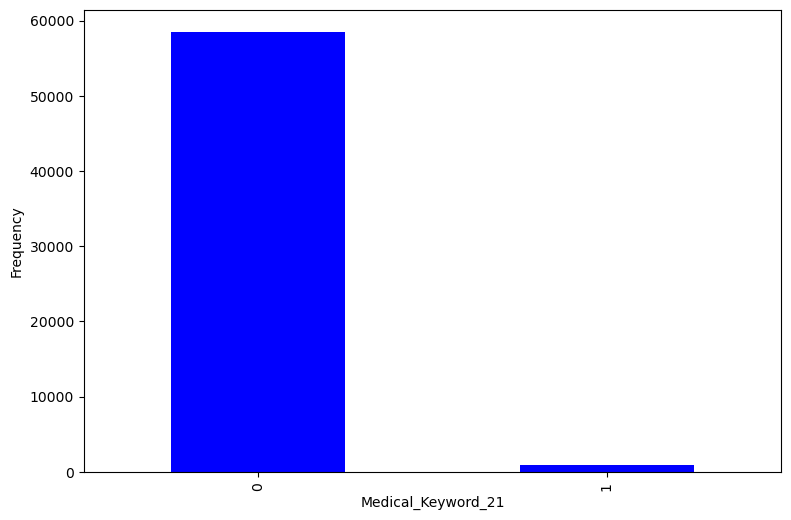

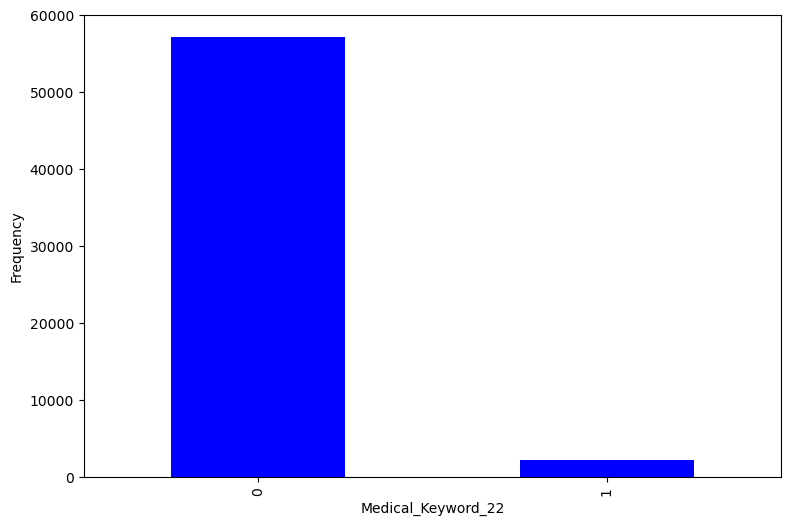

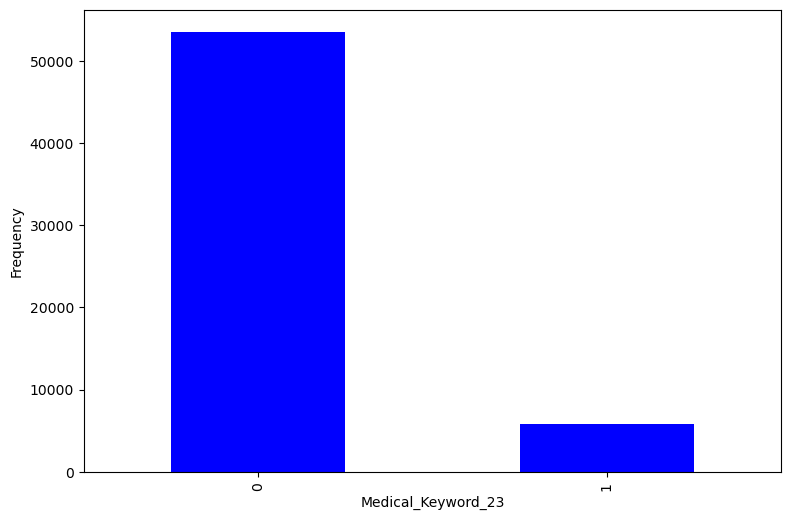

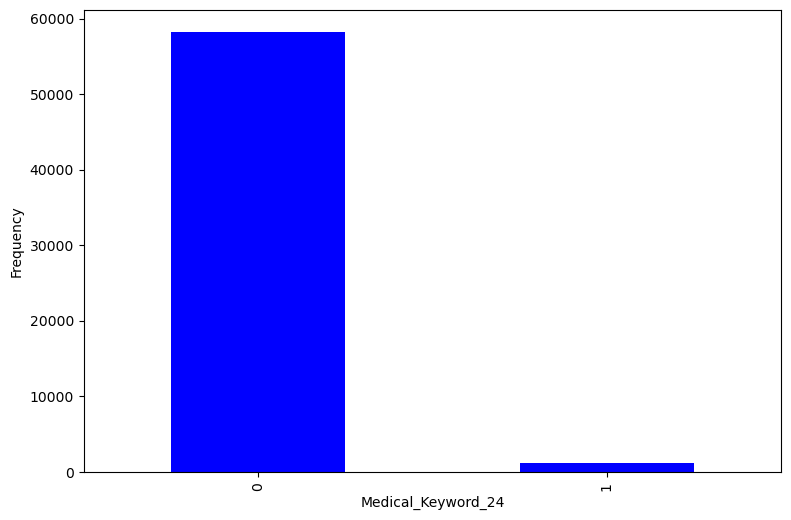

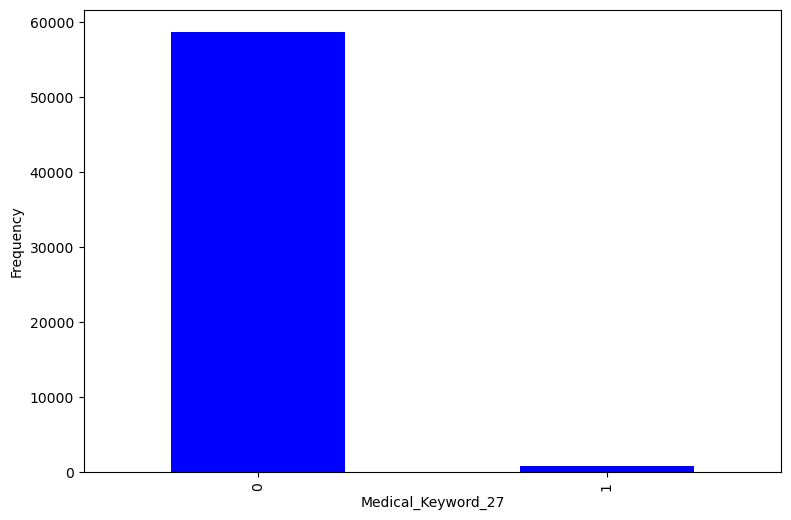

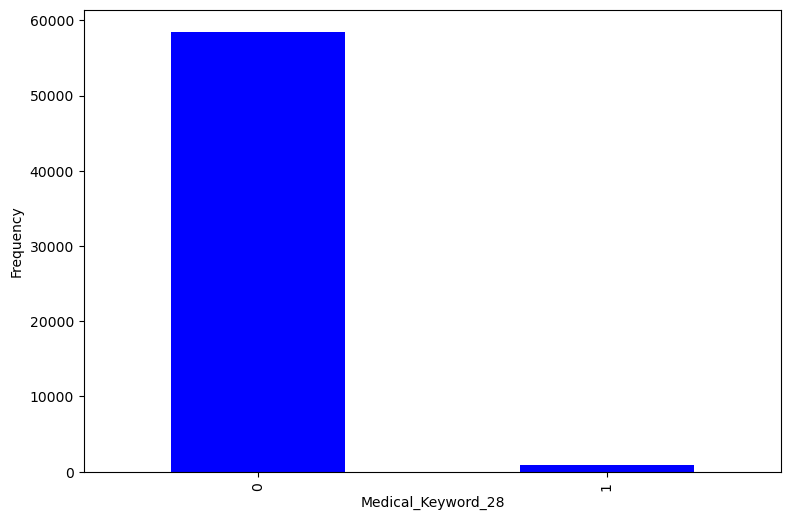

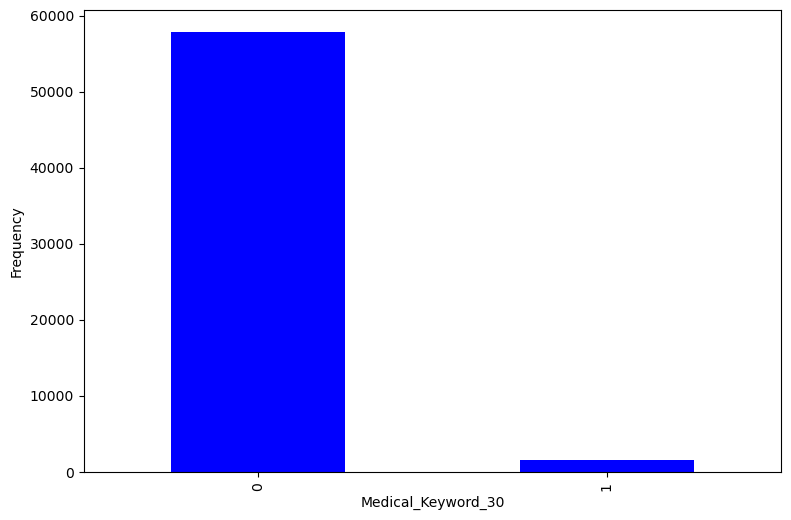

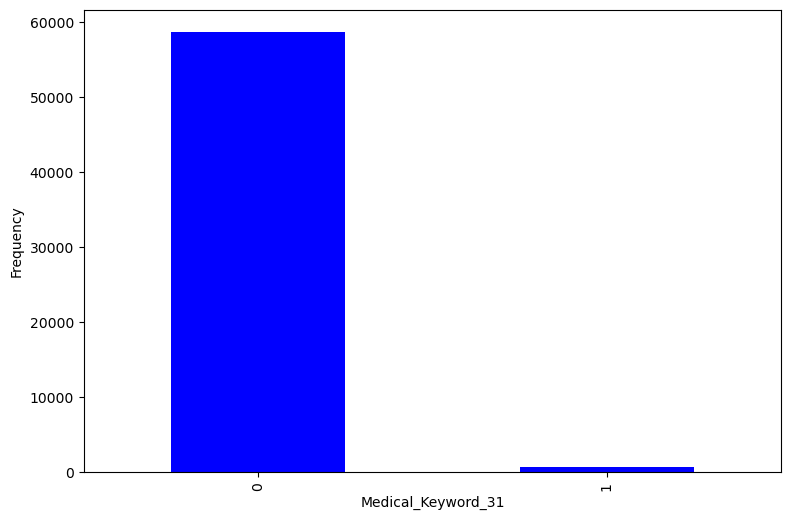

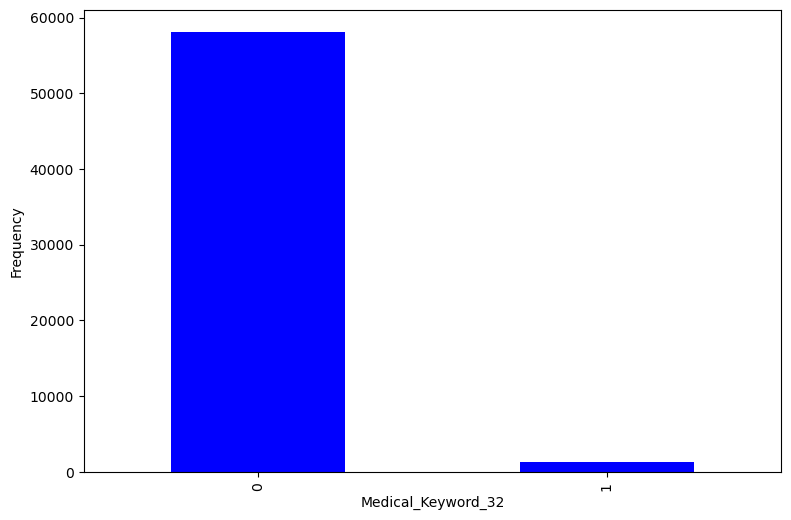

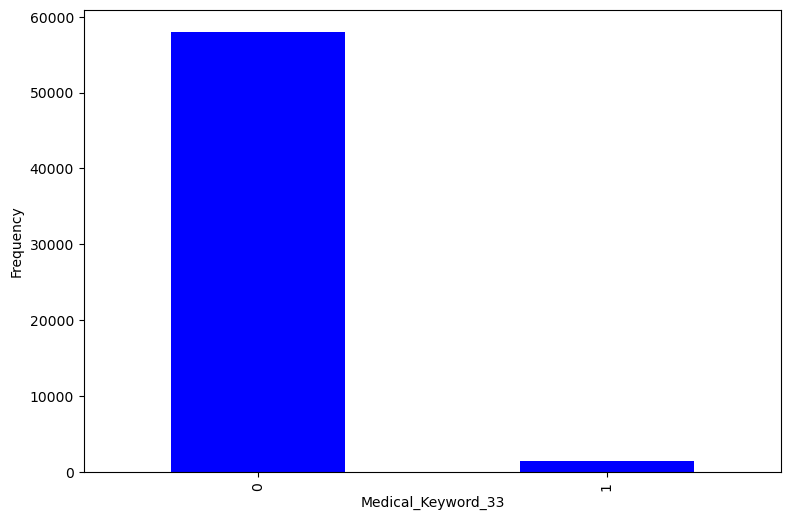

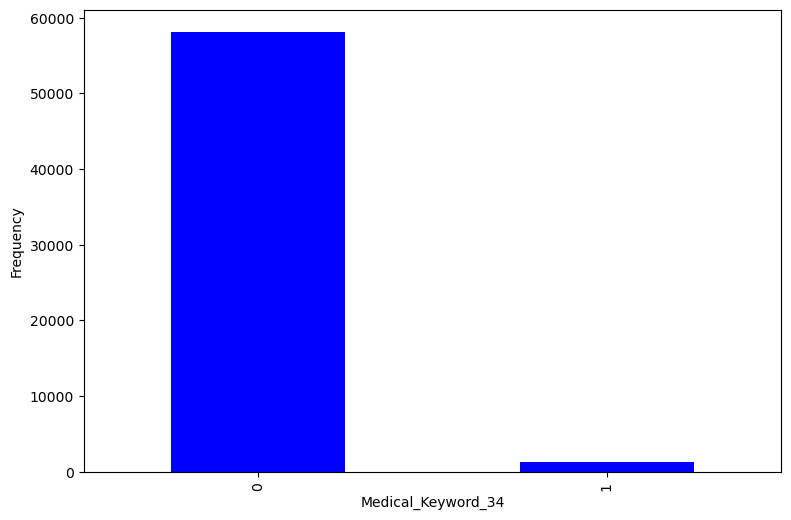

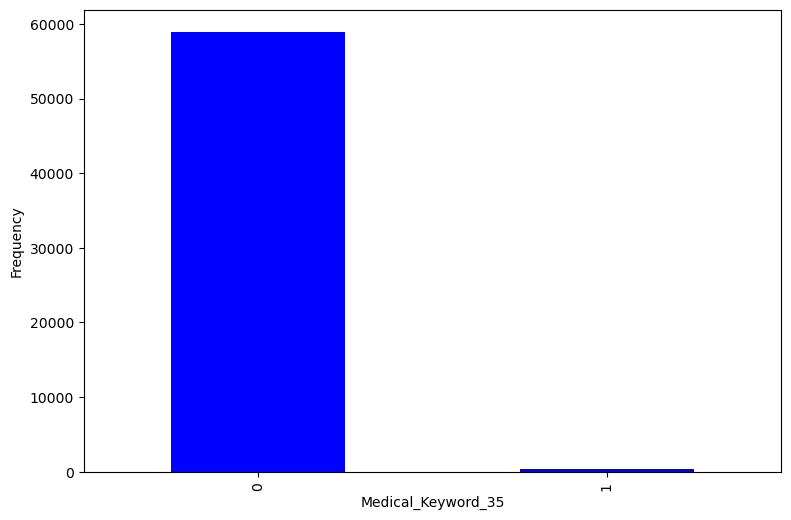

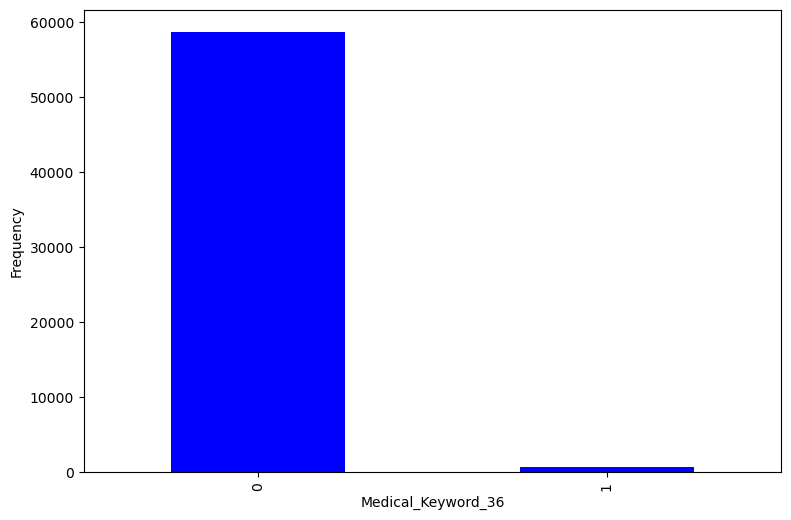

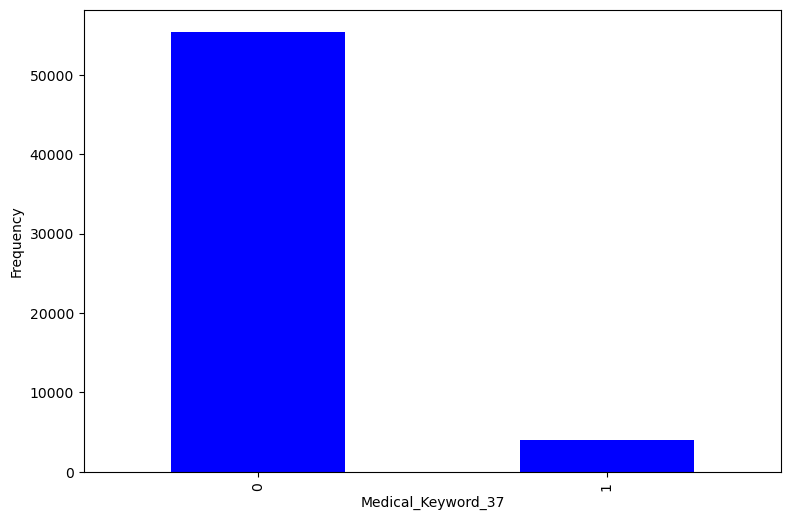

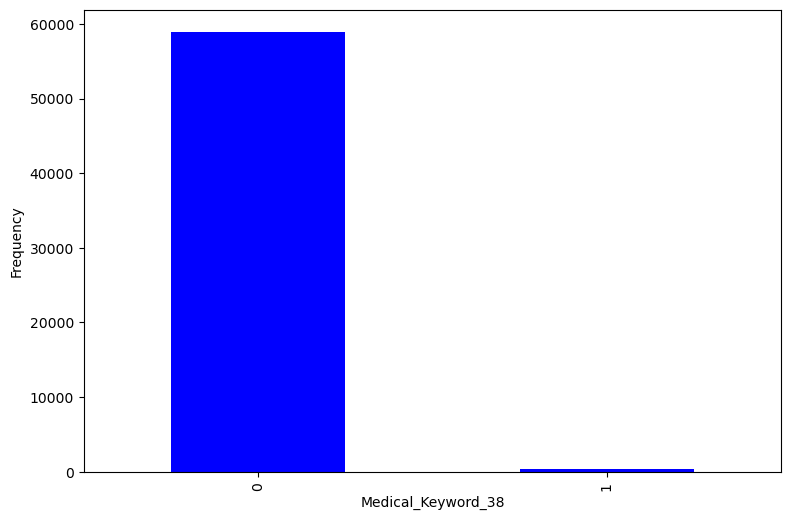

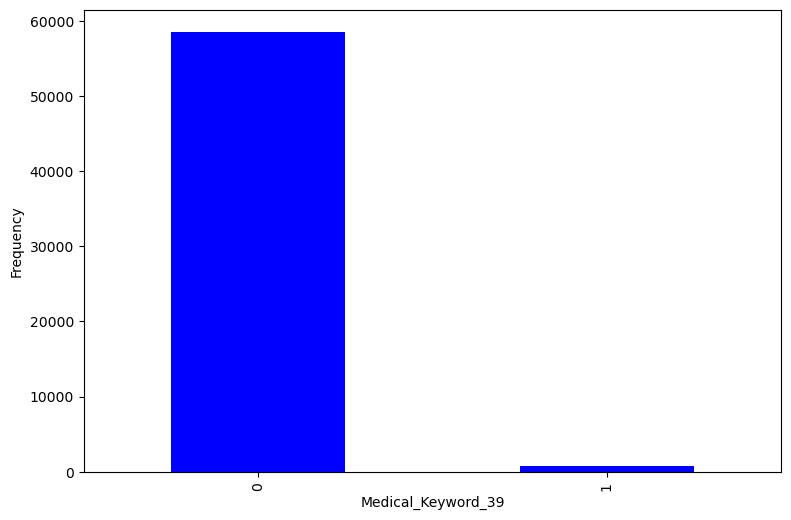

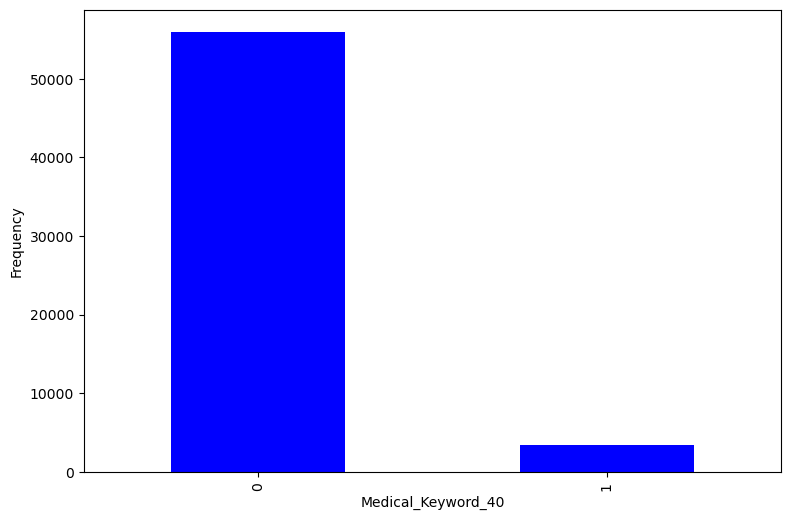

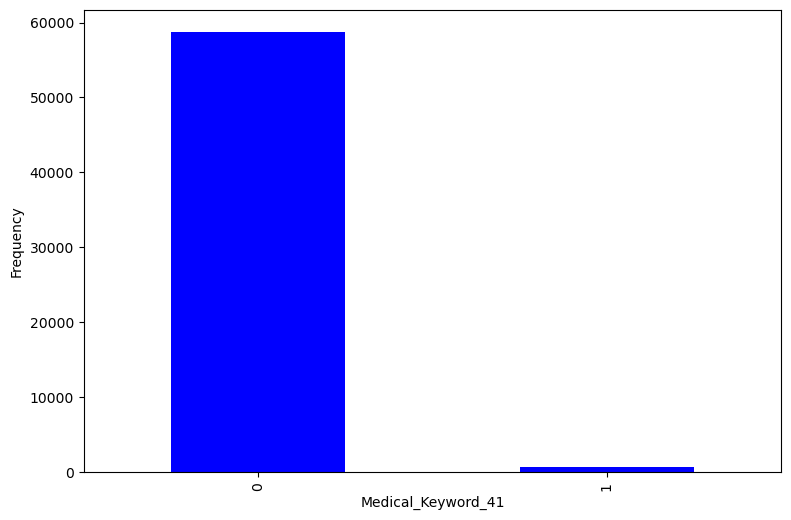

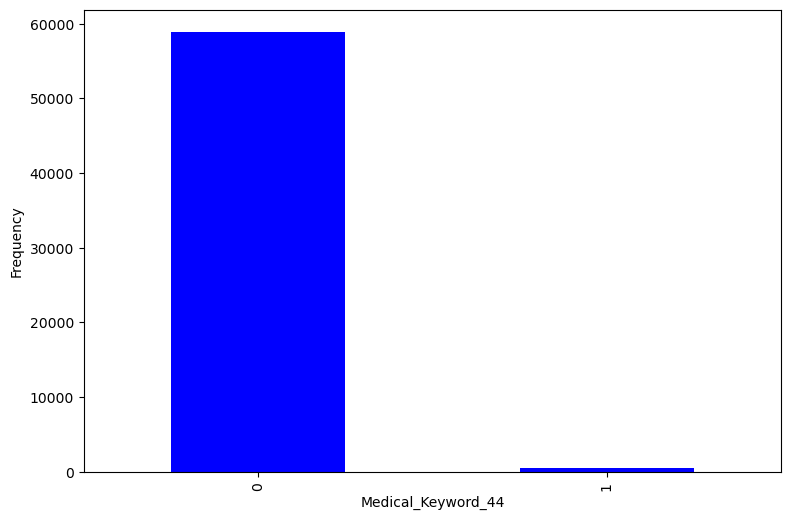

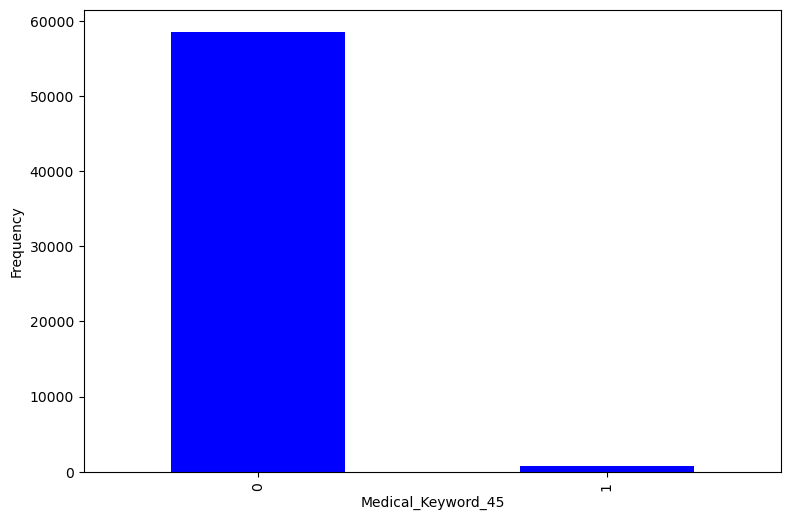

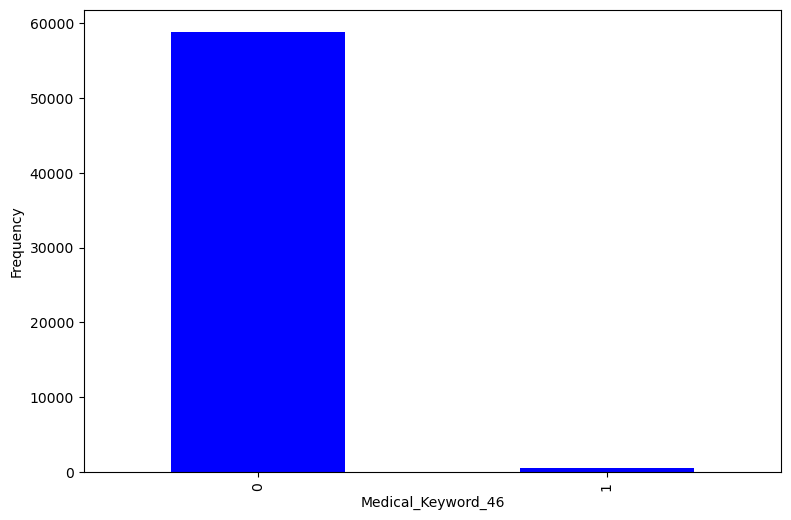

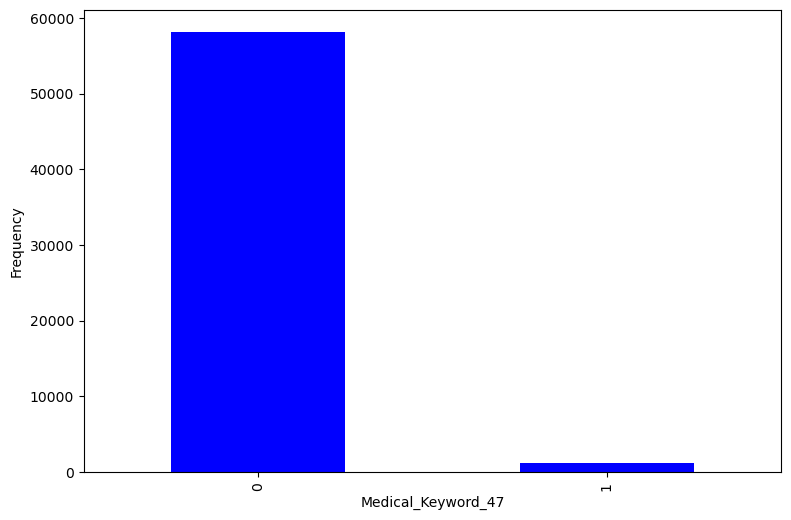

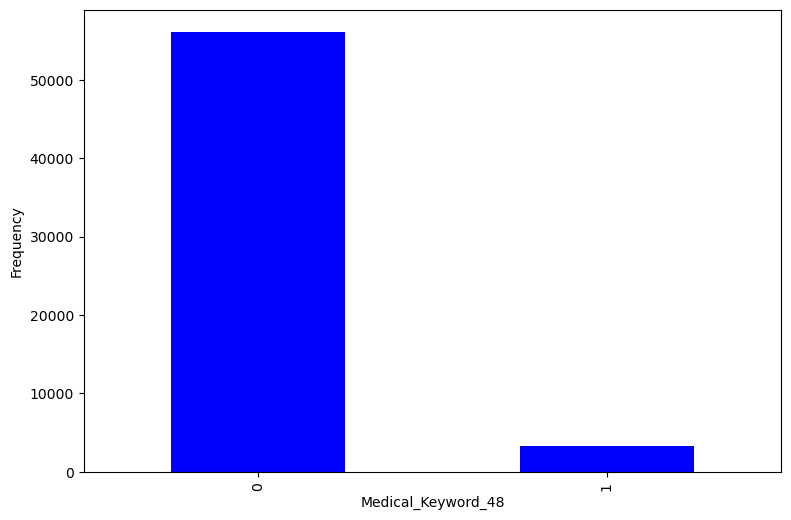

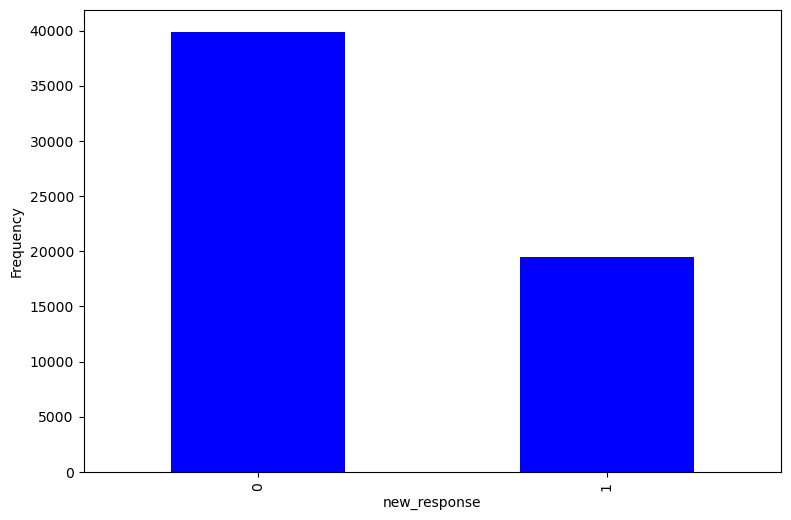

In [9]:
for col in numerical:
    counts = data[col].value_counts().sort_index()
    if len(counts)>10 and len(counts)<50:
        fig = plt.figure(figsize=(30,10))
    elif len(counts)>50:
        continue
    else:
        fig = plt.figure(figsize = (9,6))
    ax = fig.gca()    
    counts.plot.bar(ax=ax, color = "blue")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()



/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_13612/4189569752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[col], ax=axes[0])
/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_13612/4189569752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = data[col]

<function matplotlib.pyplot.show(close=None, block=None)>

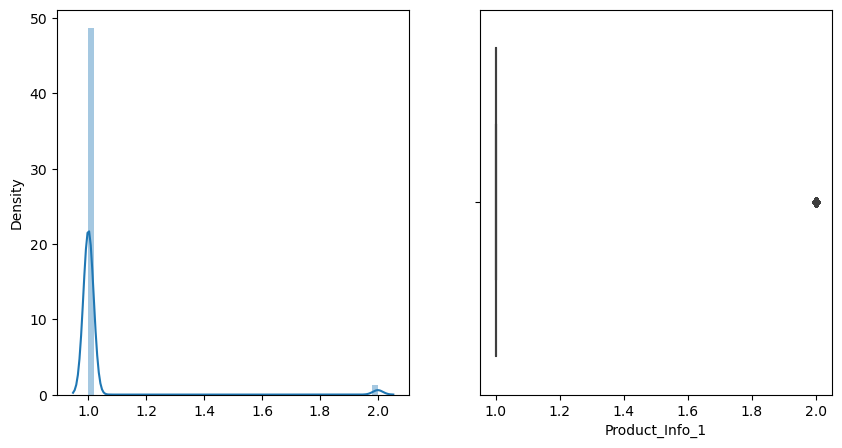

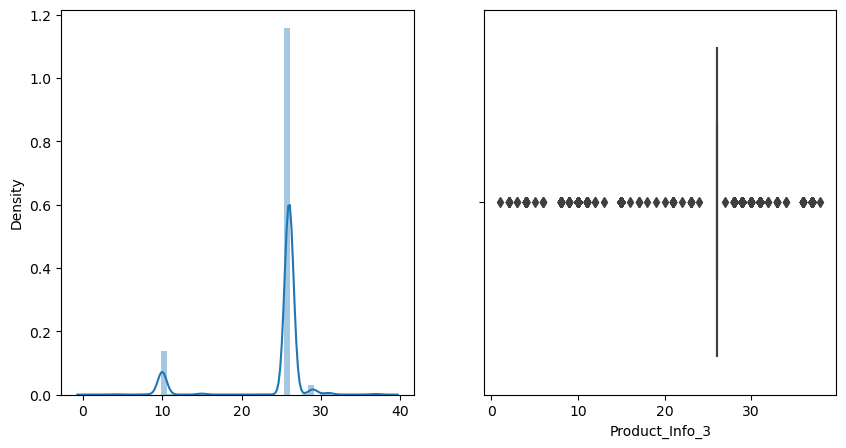

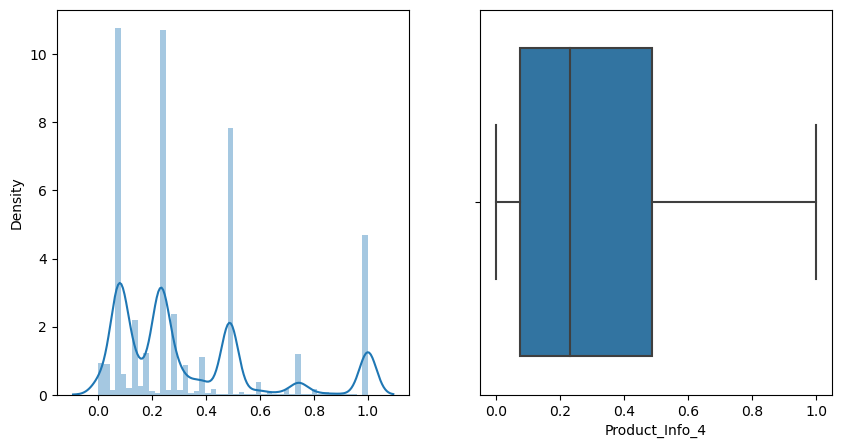

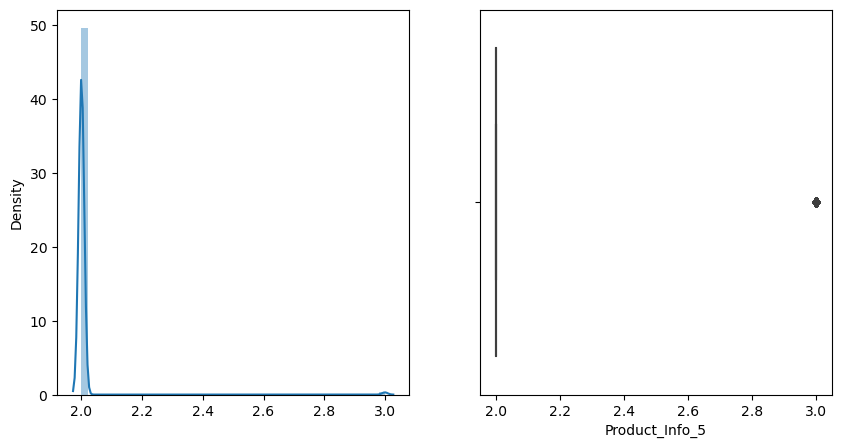

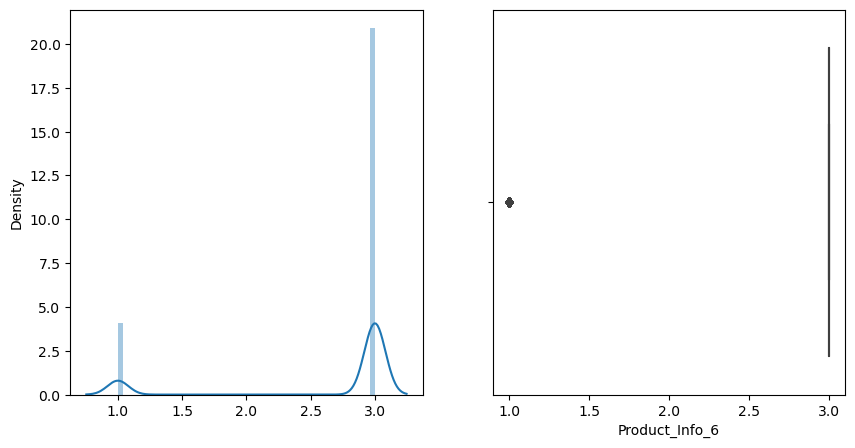

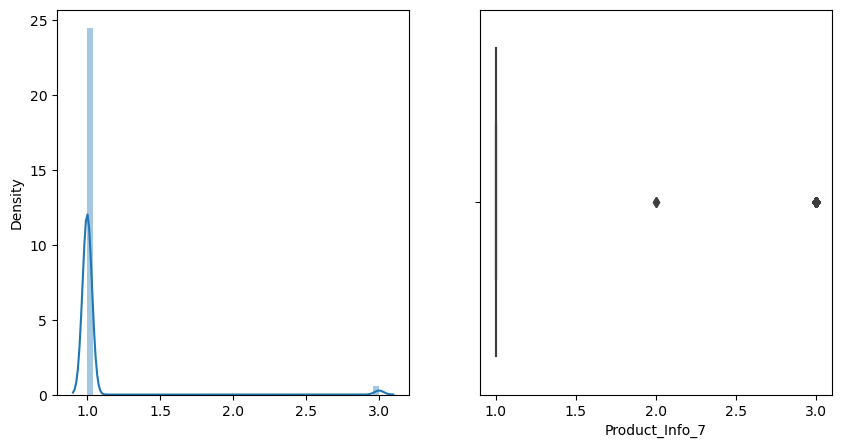

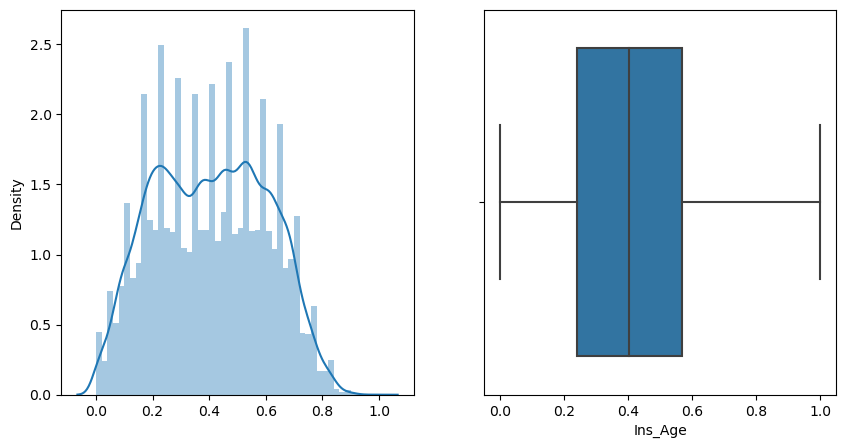

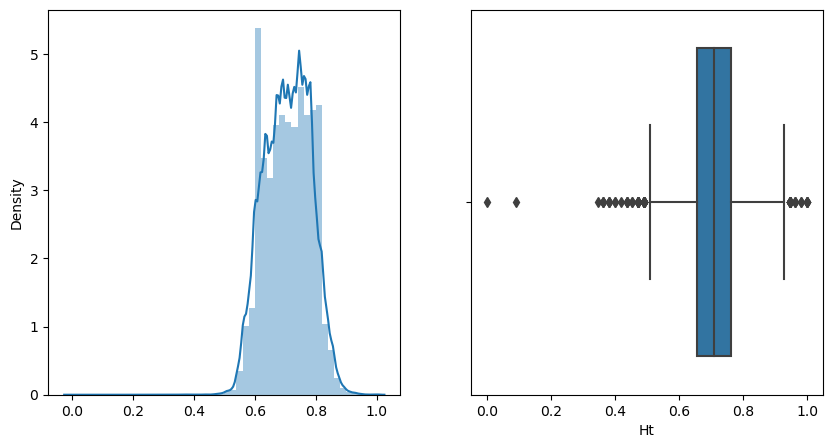

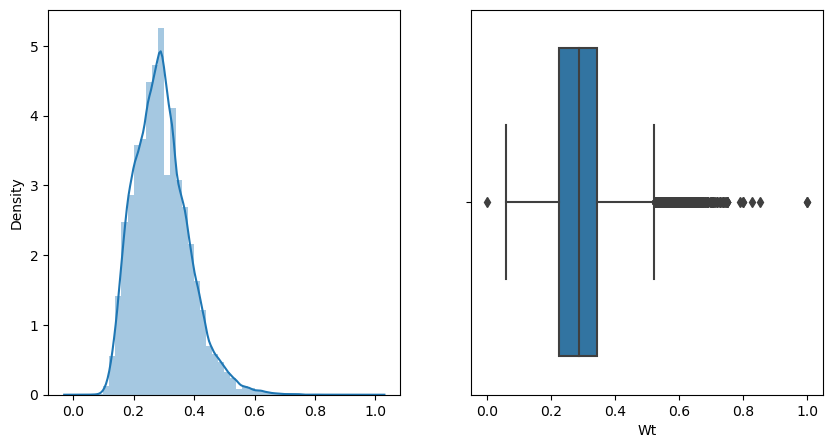

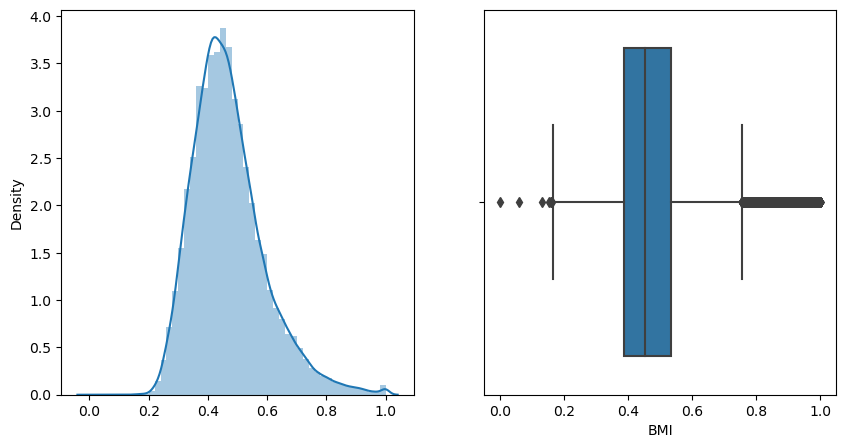

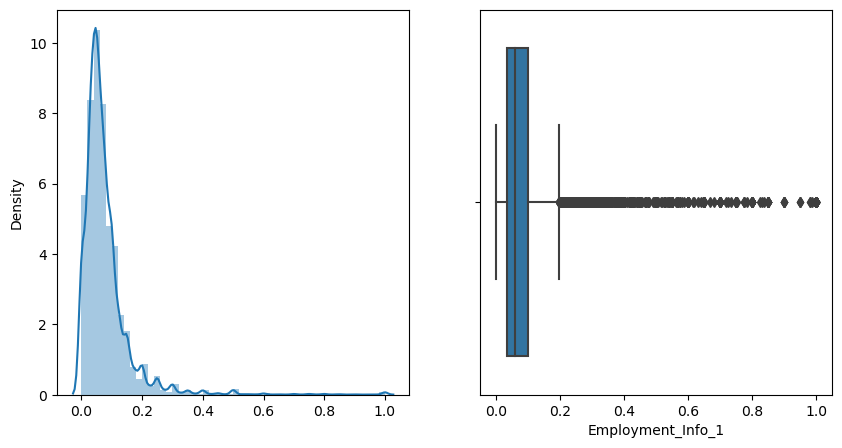

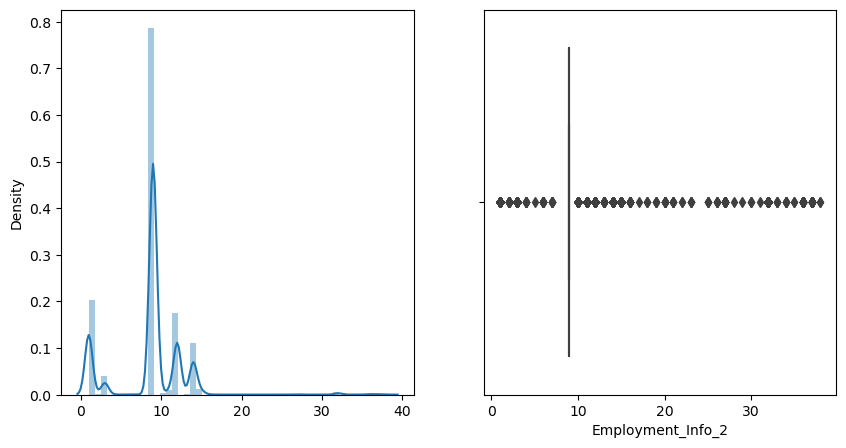

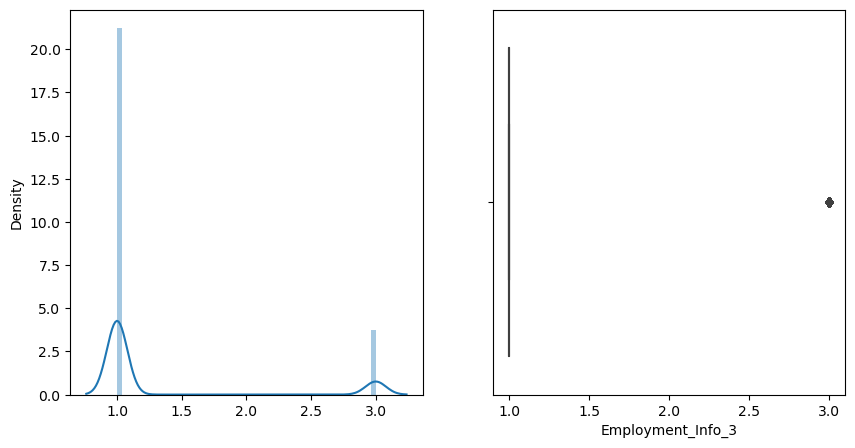

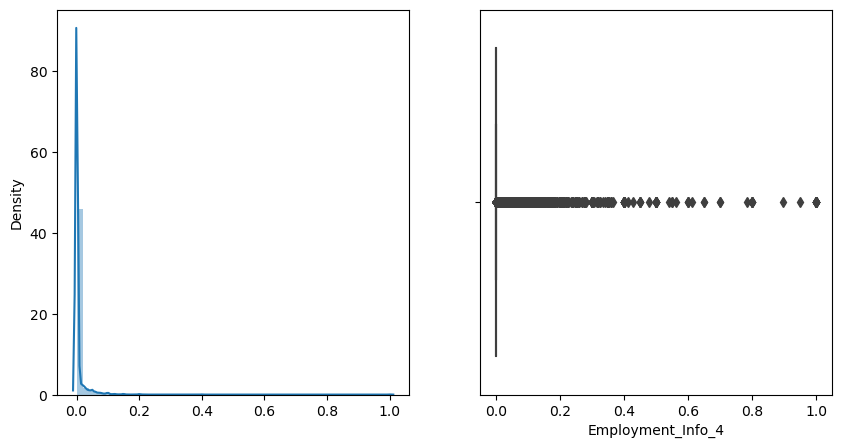

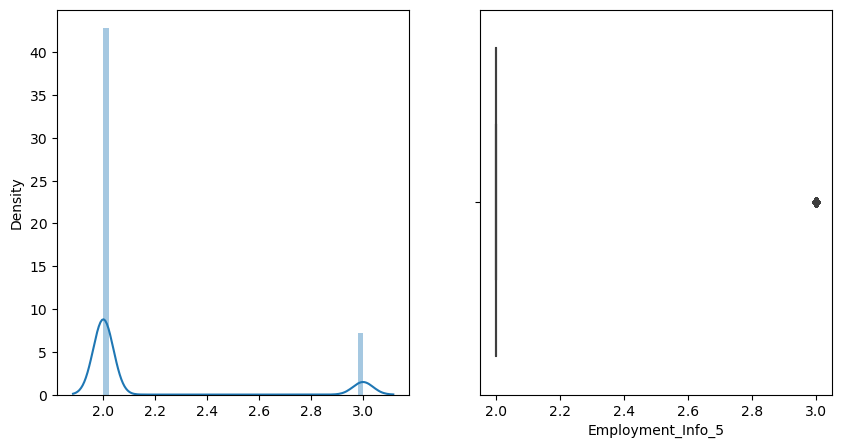

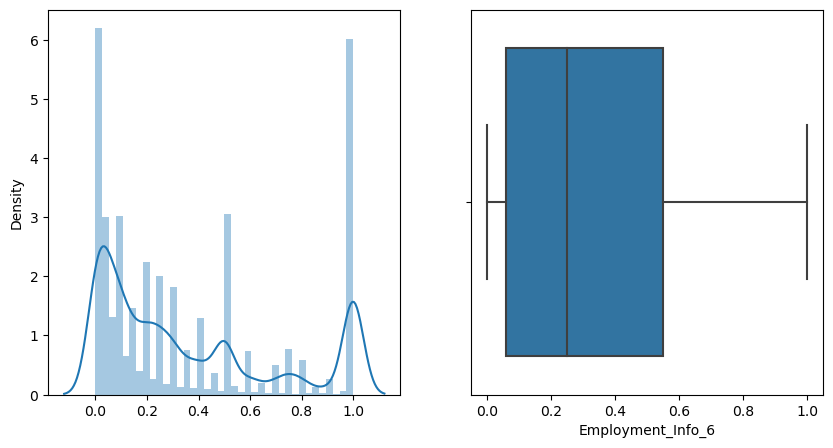

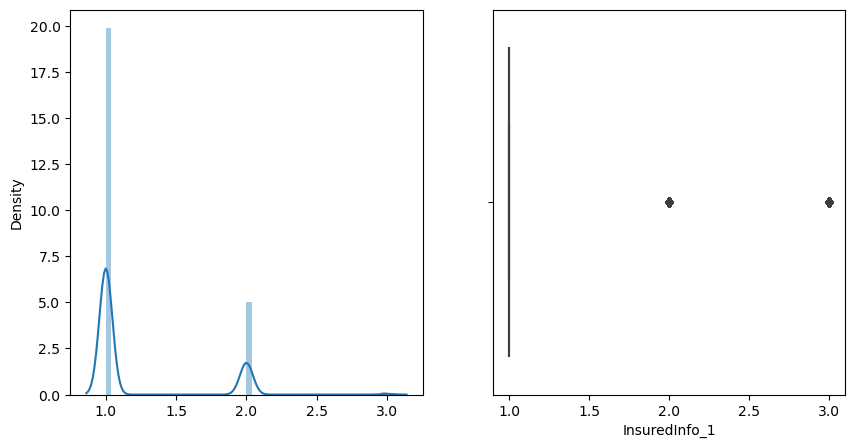

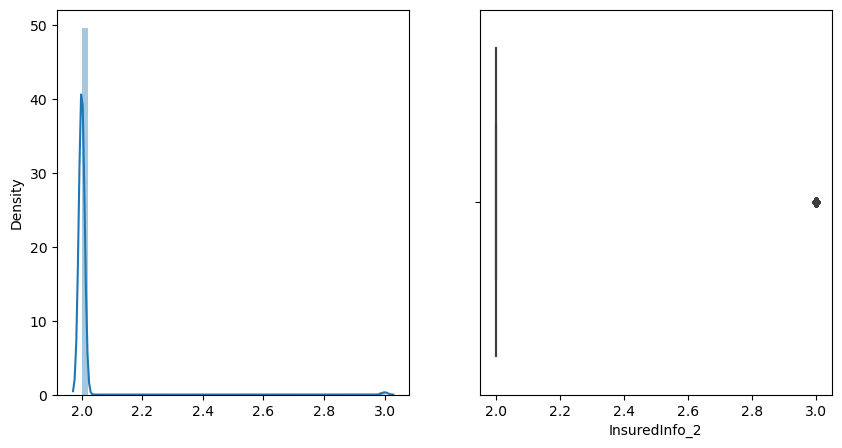

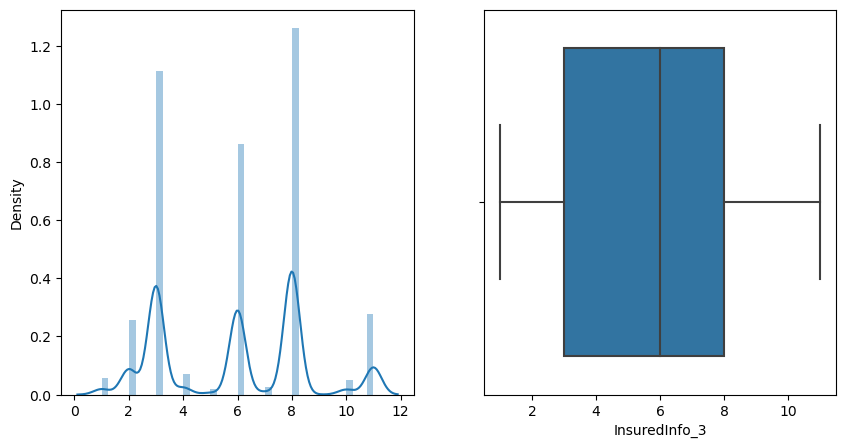

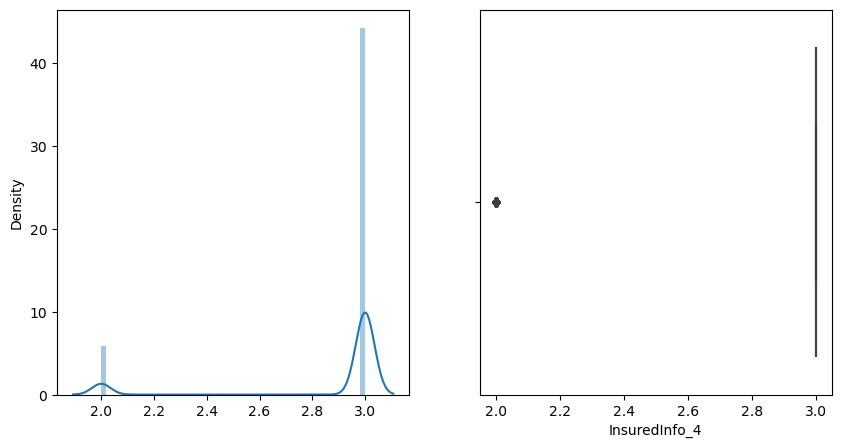

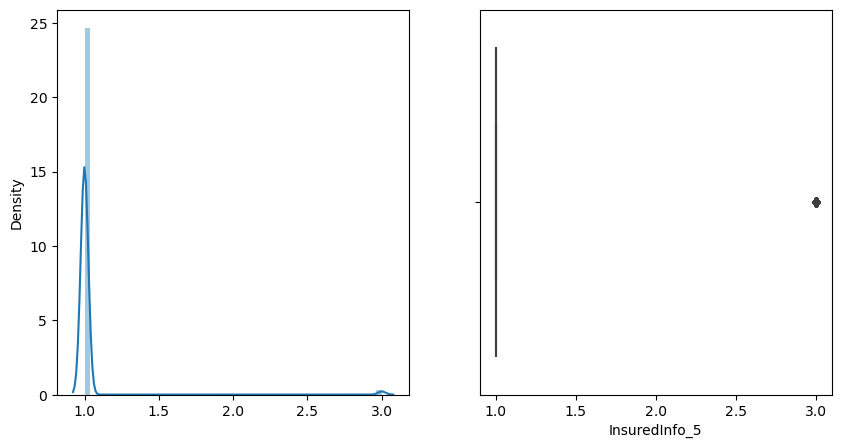

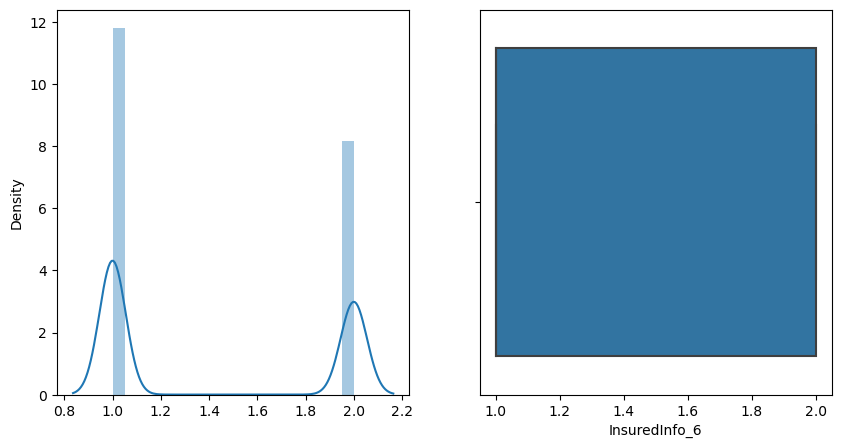

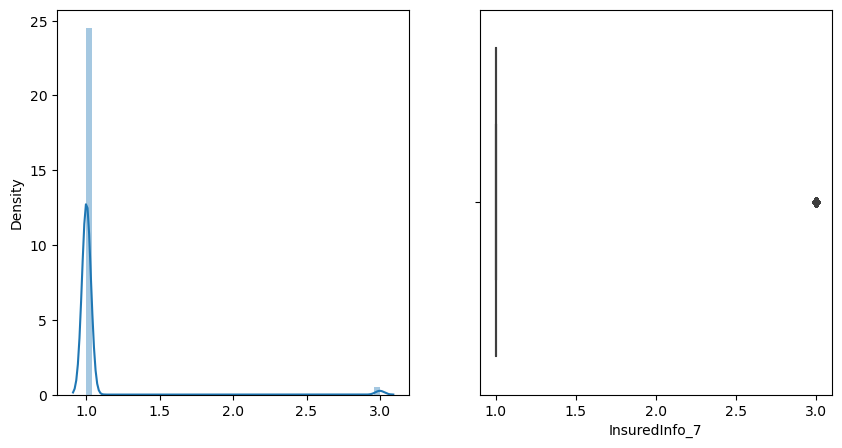

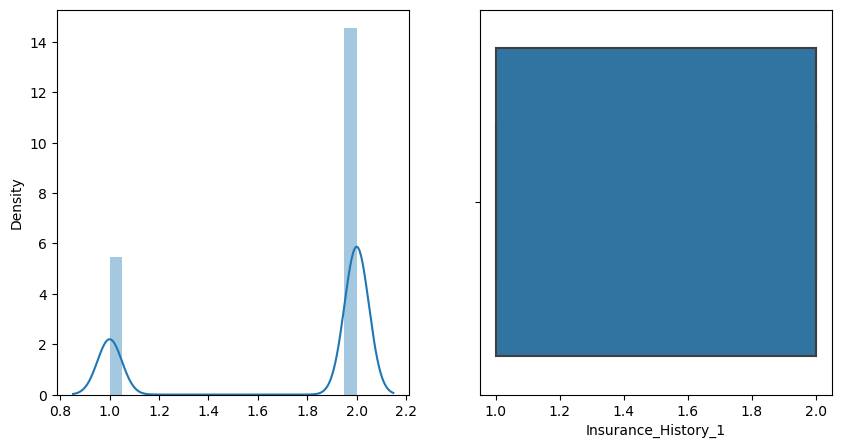

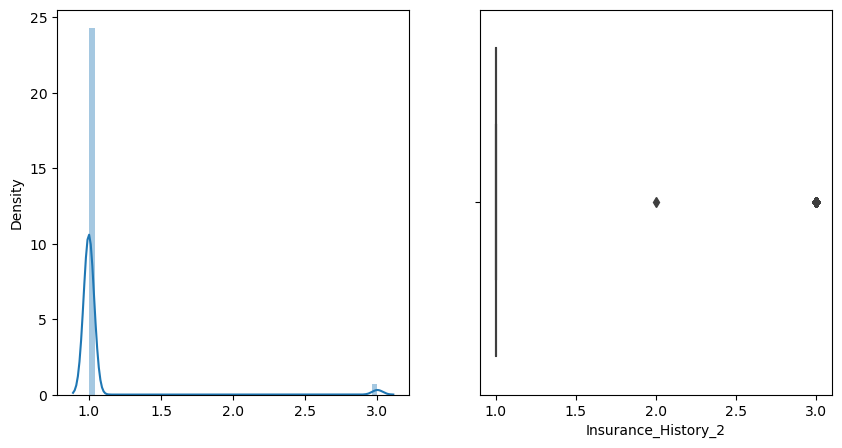

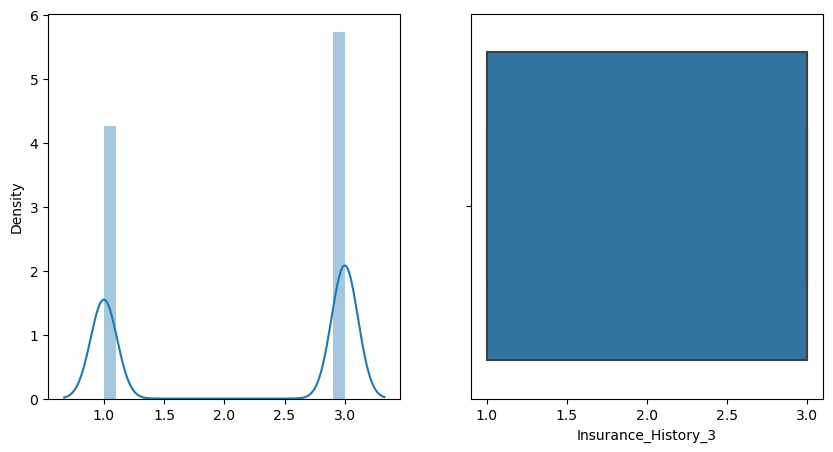

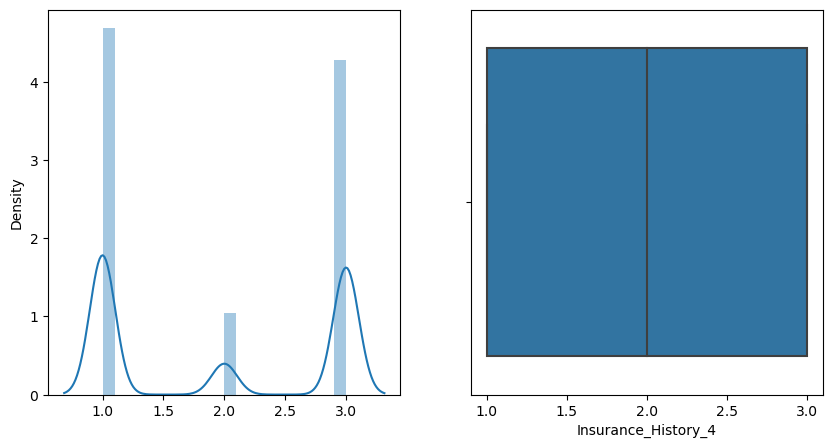

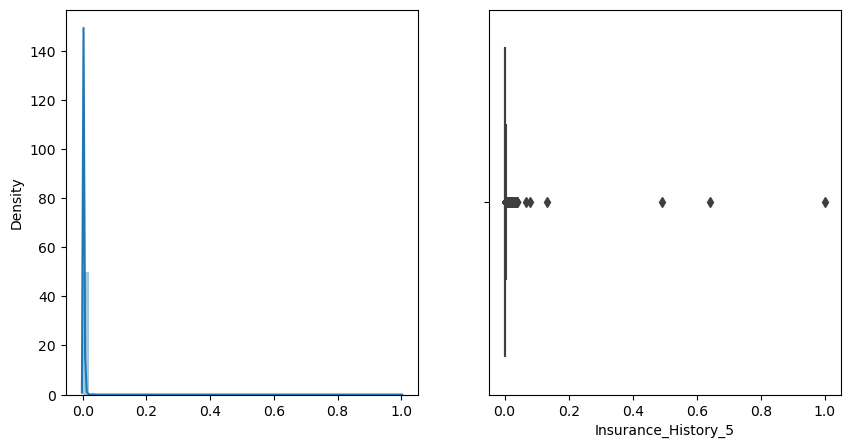

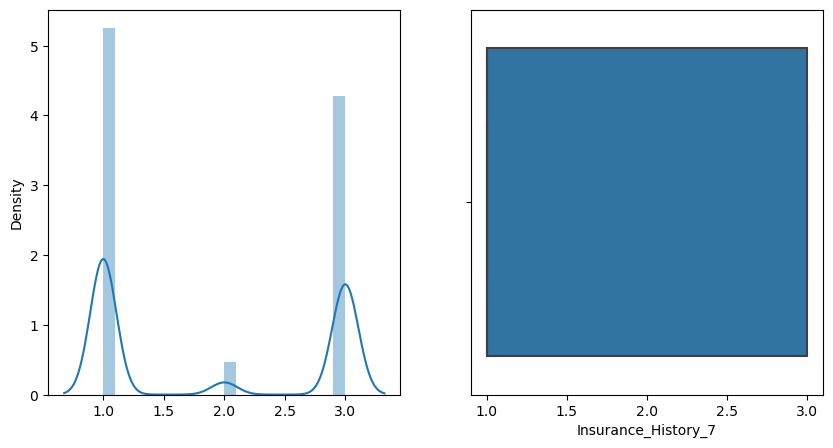

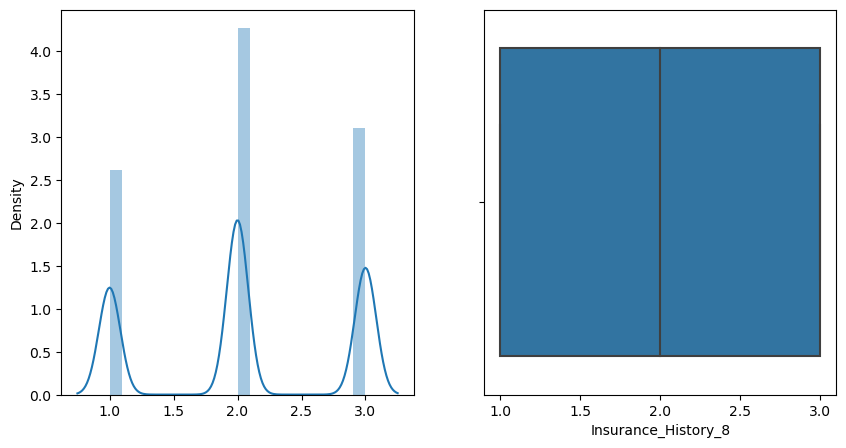

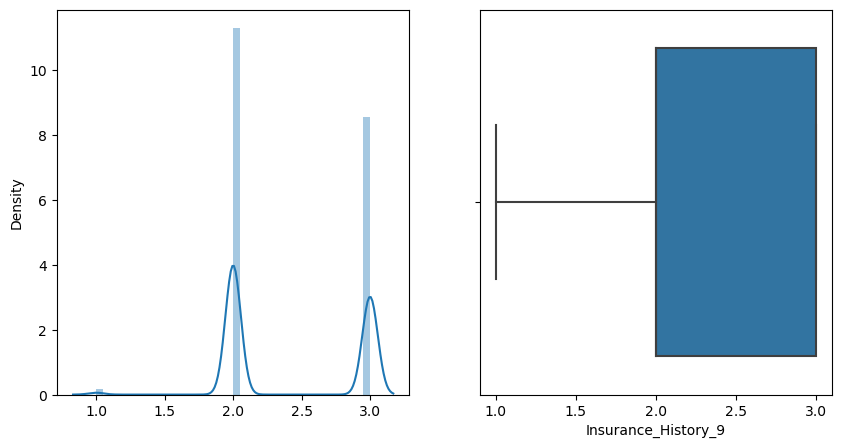

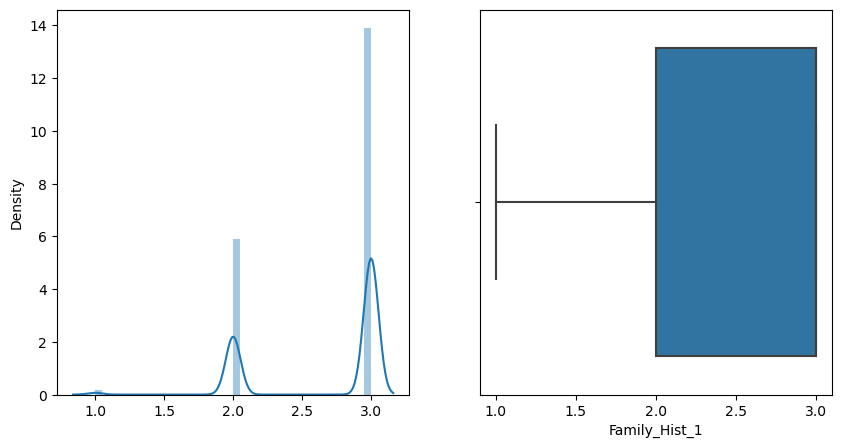

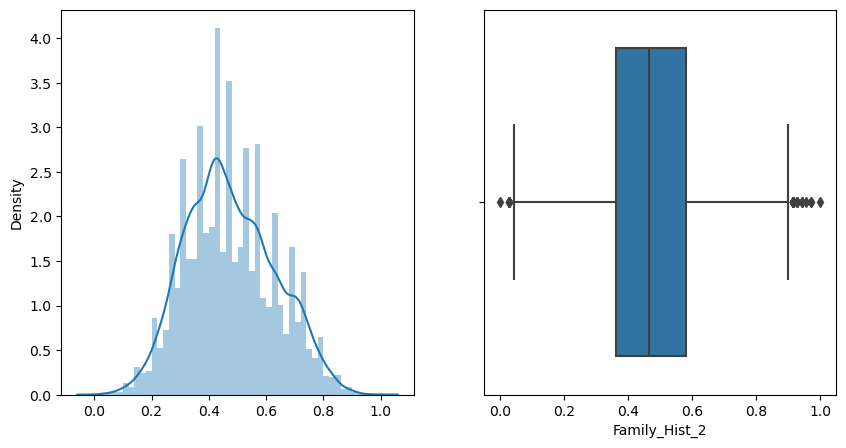

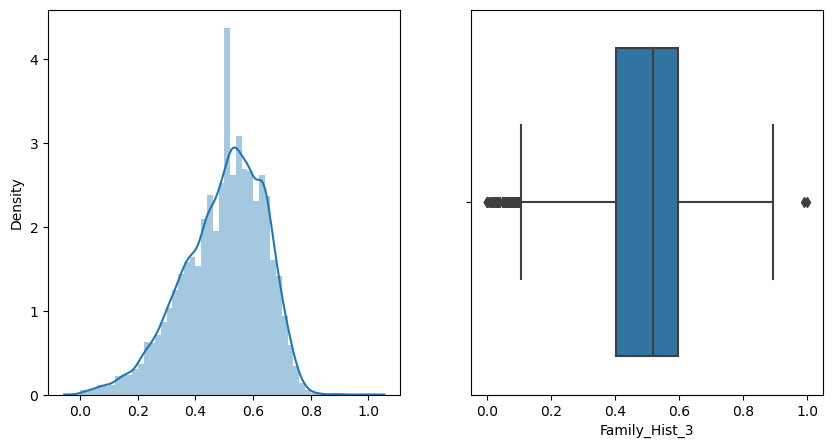

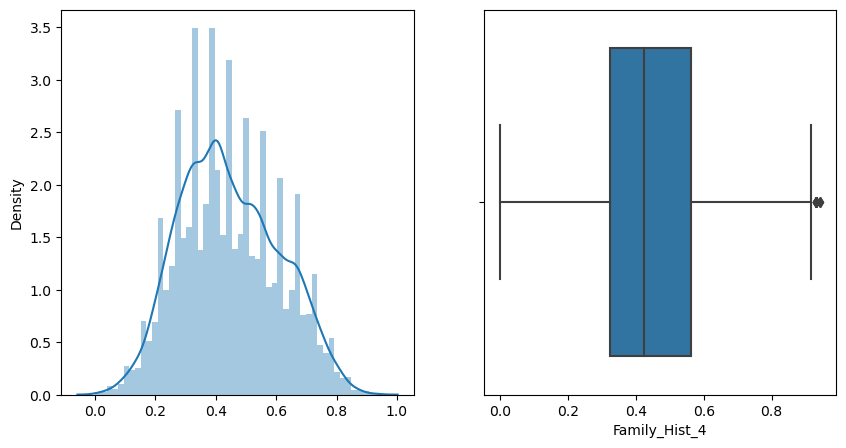

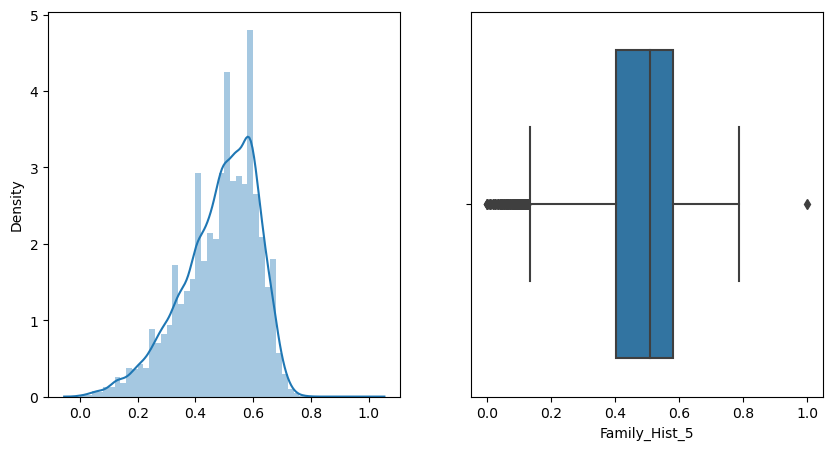

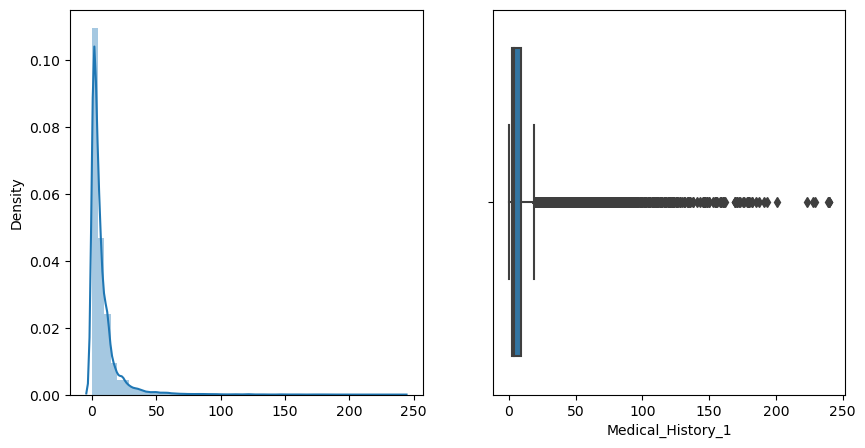

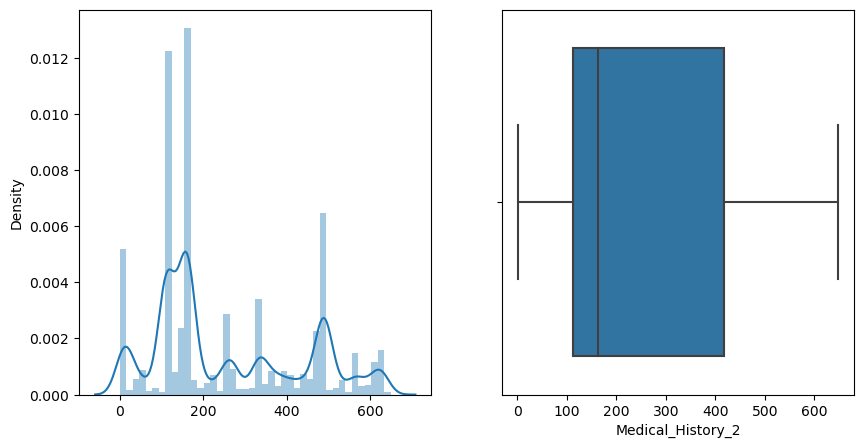

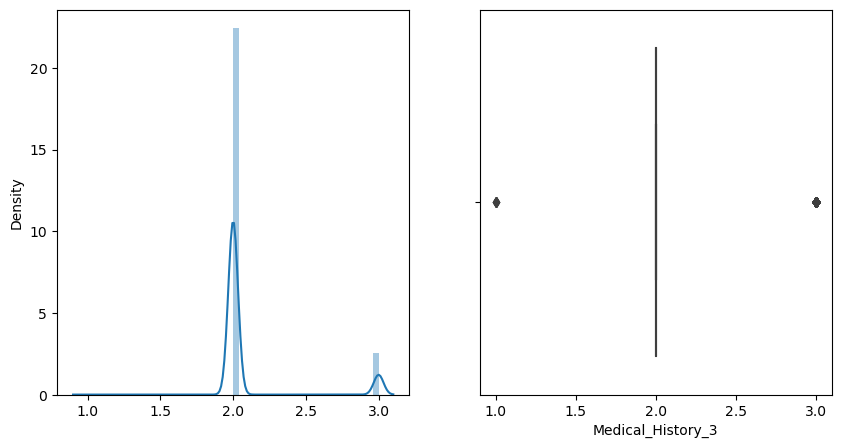

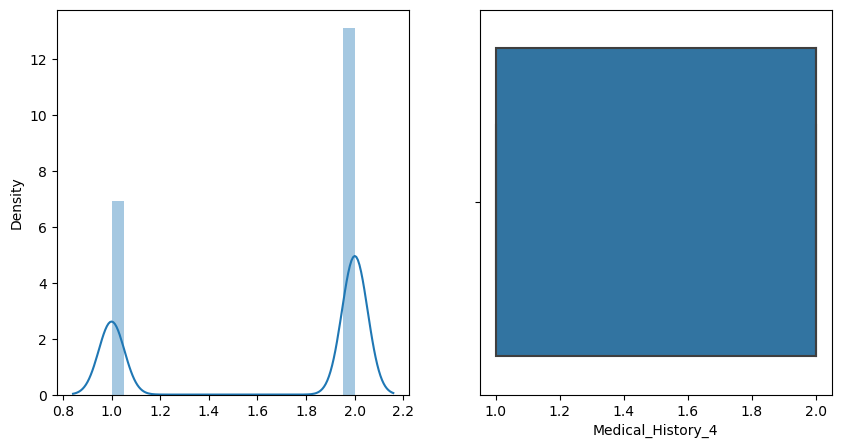

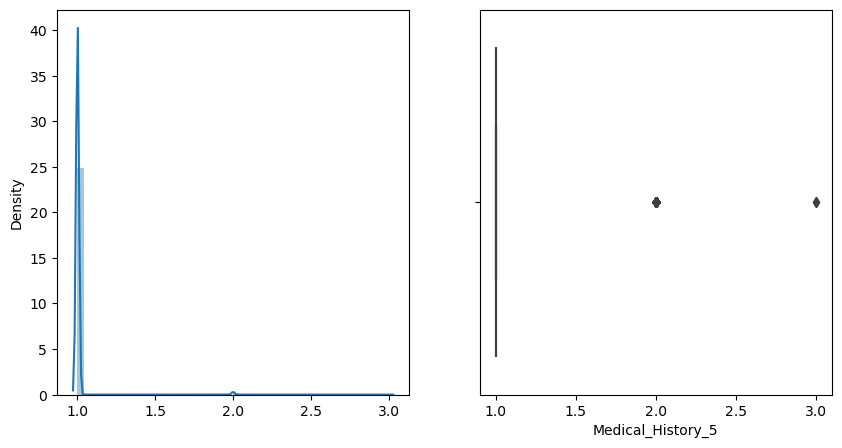

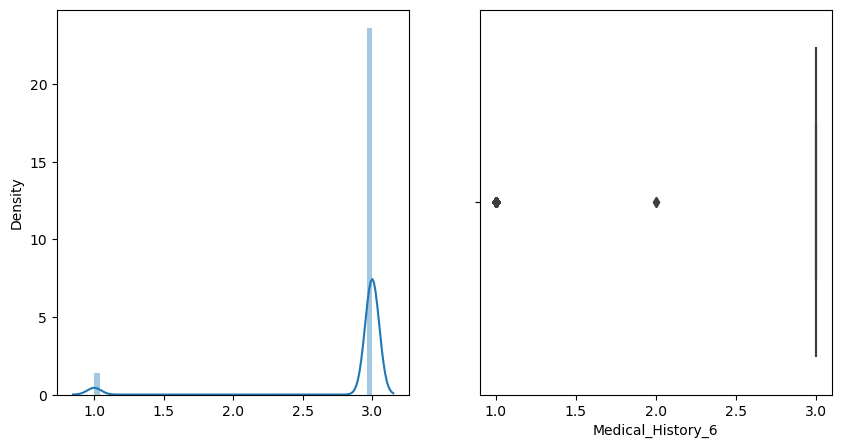

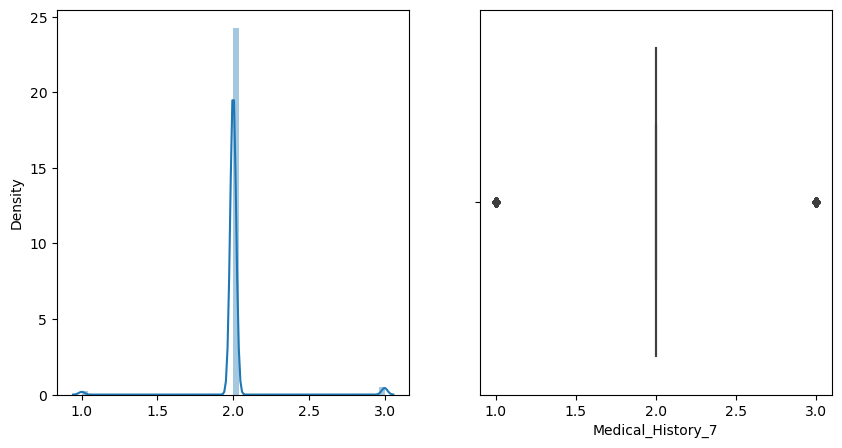

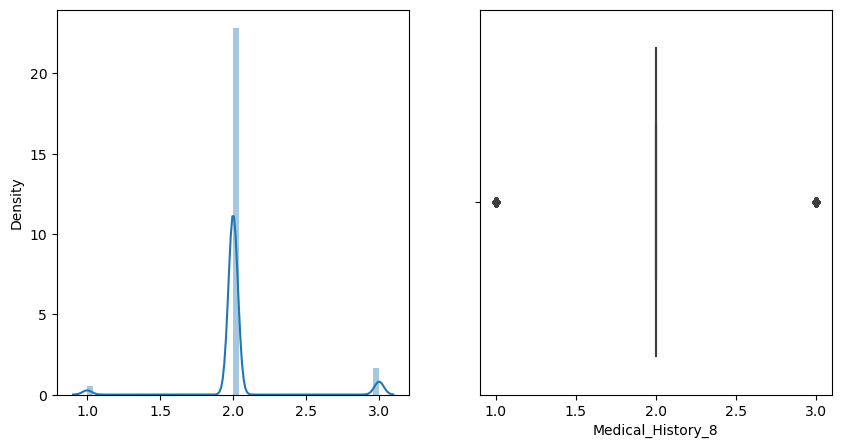

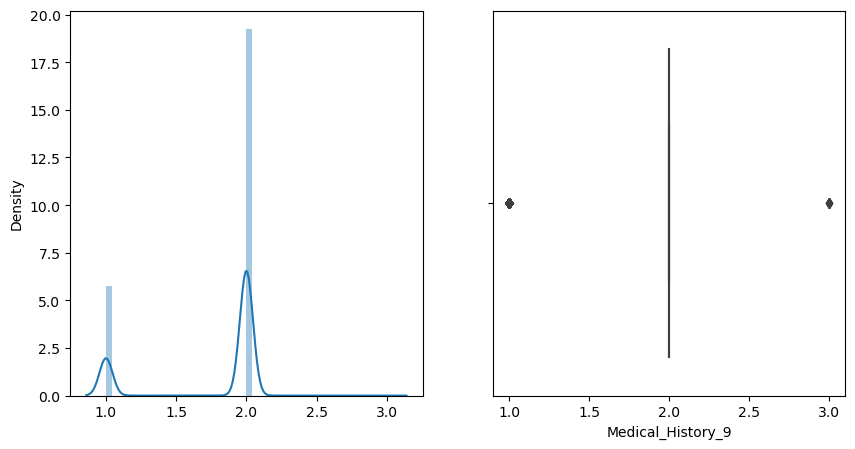

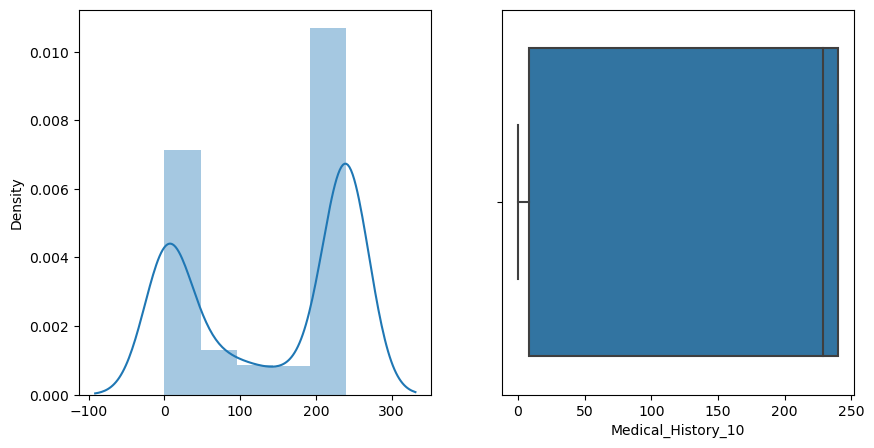

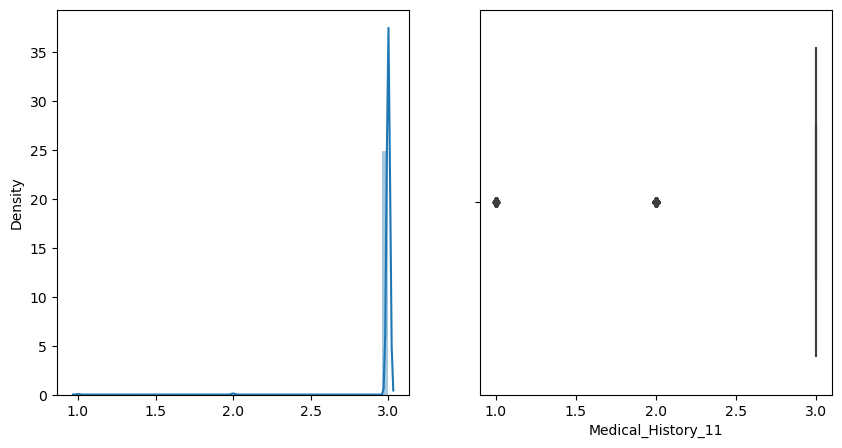

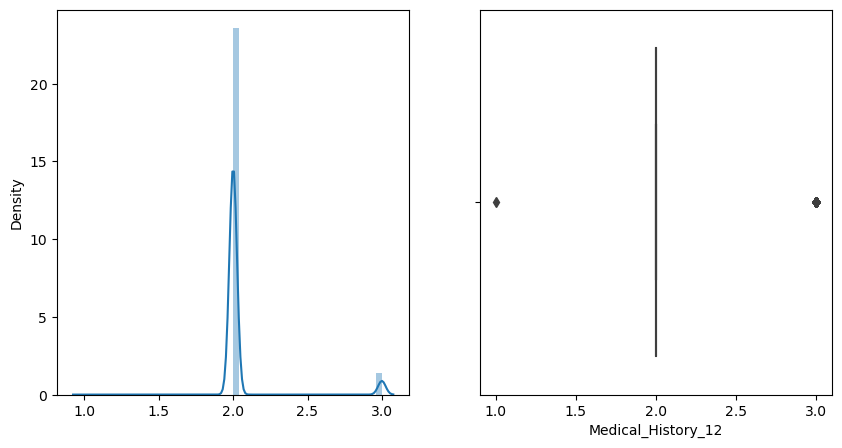

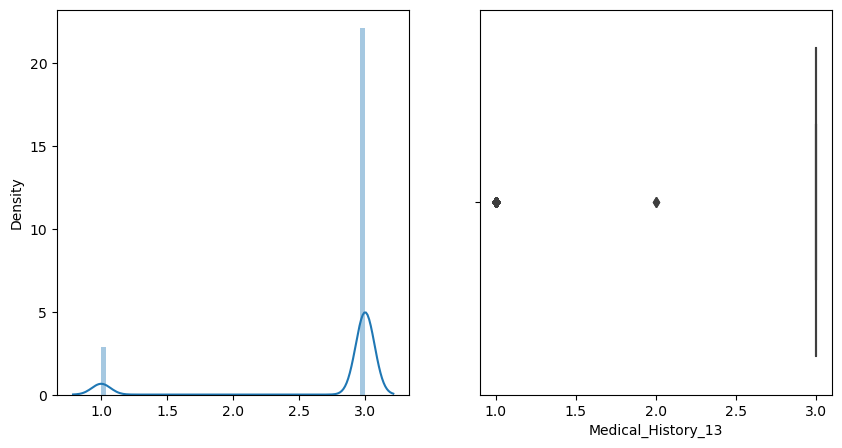

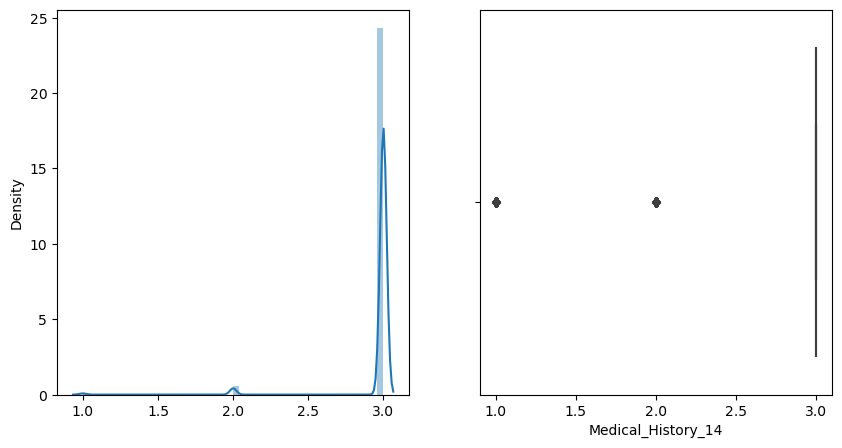

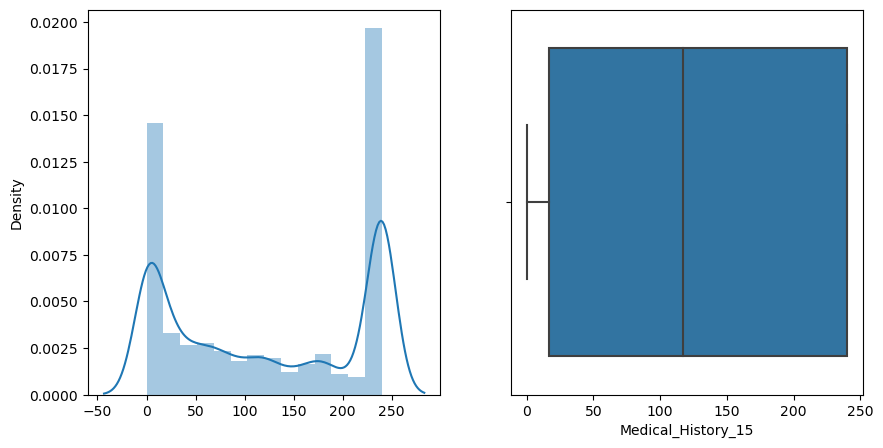

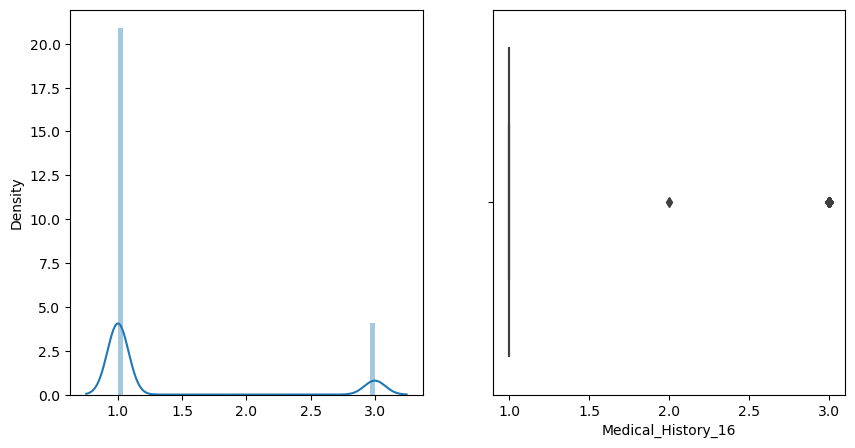

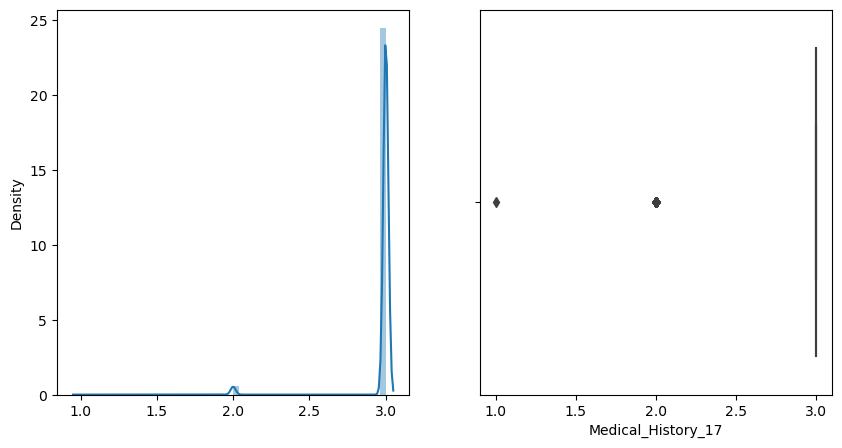

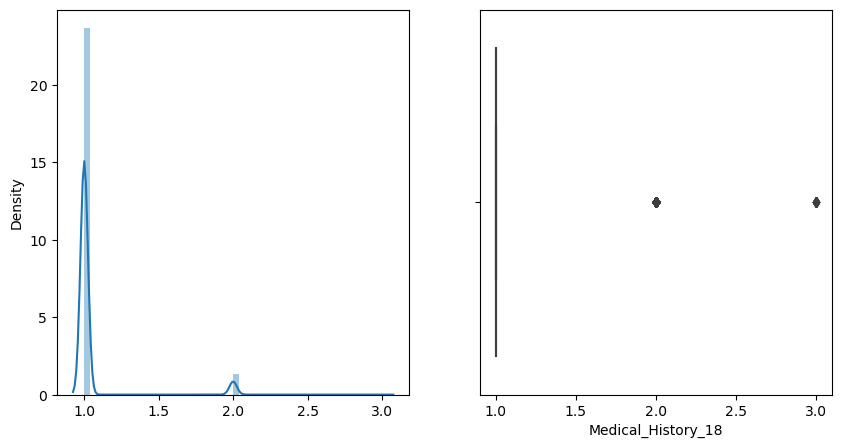

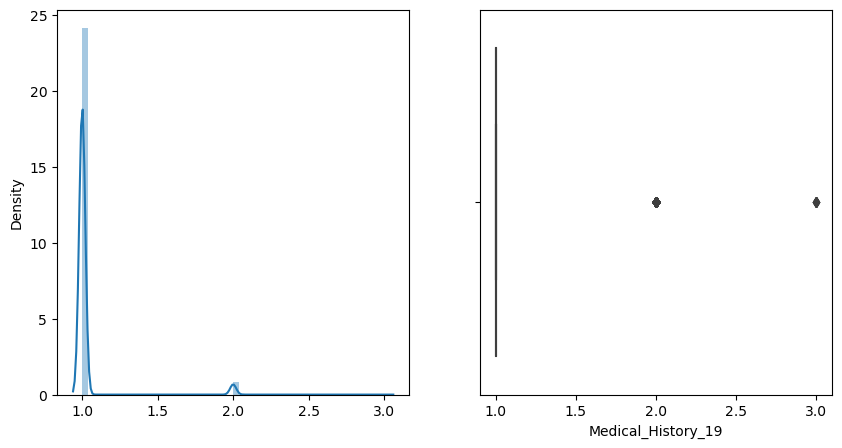

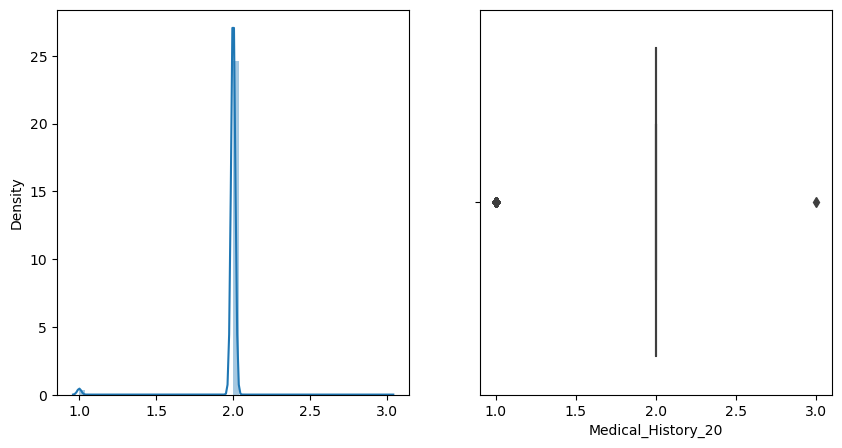

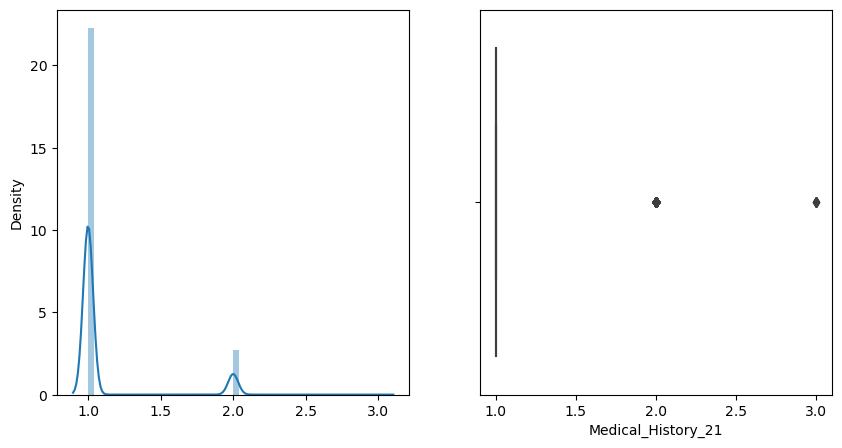

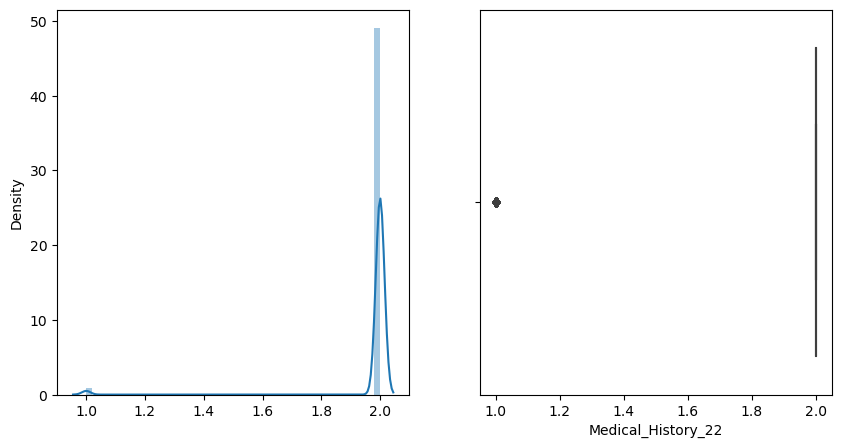

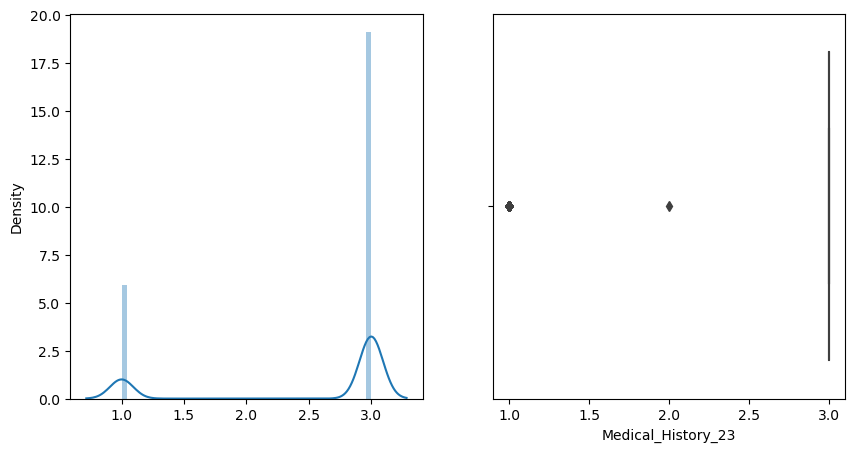

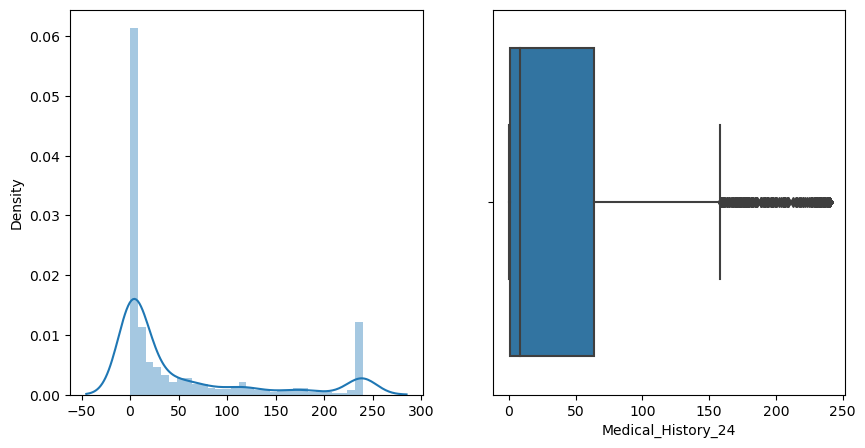

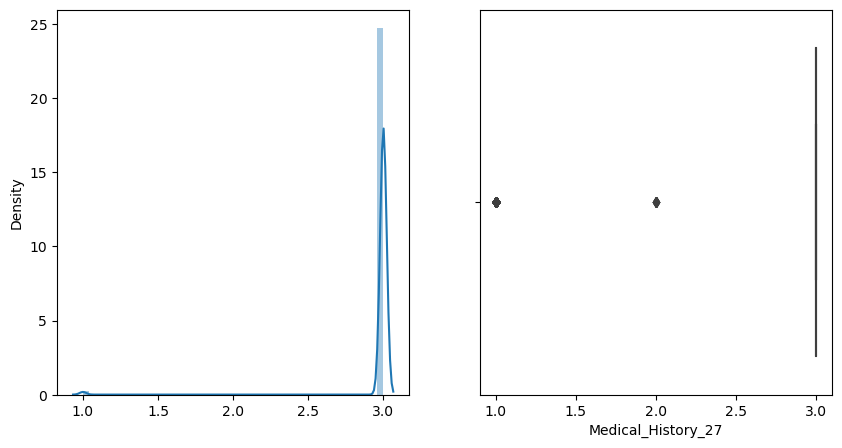

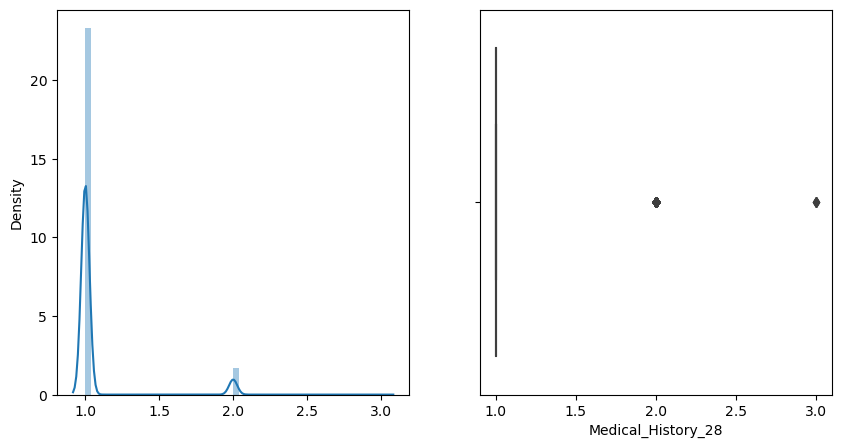

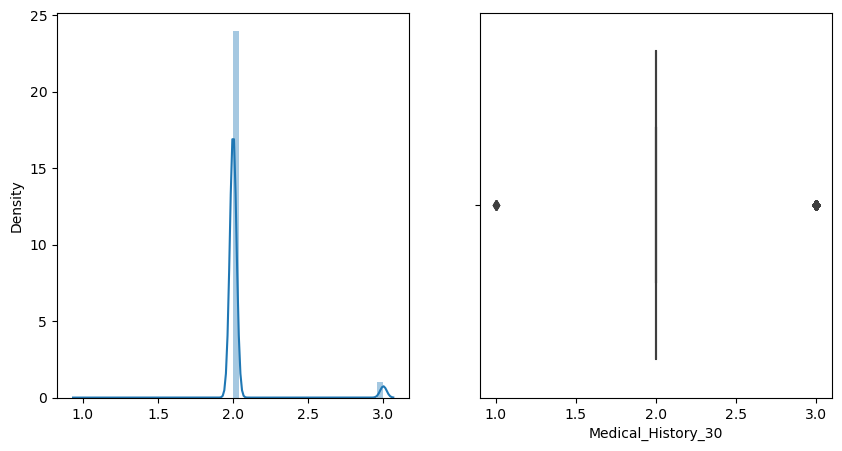

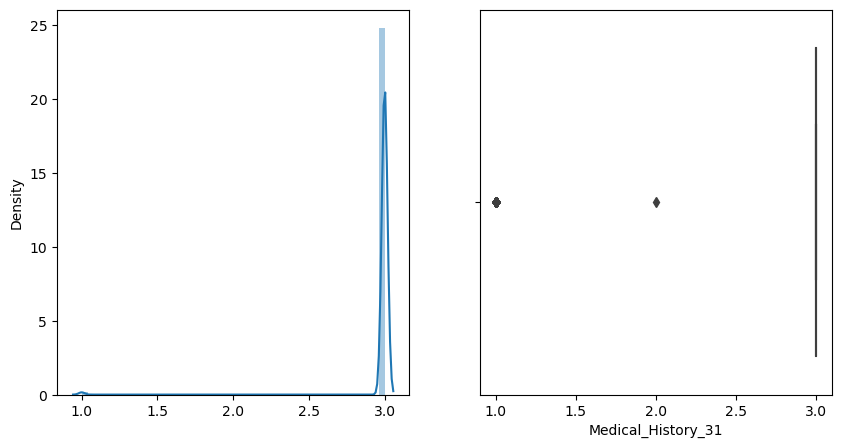

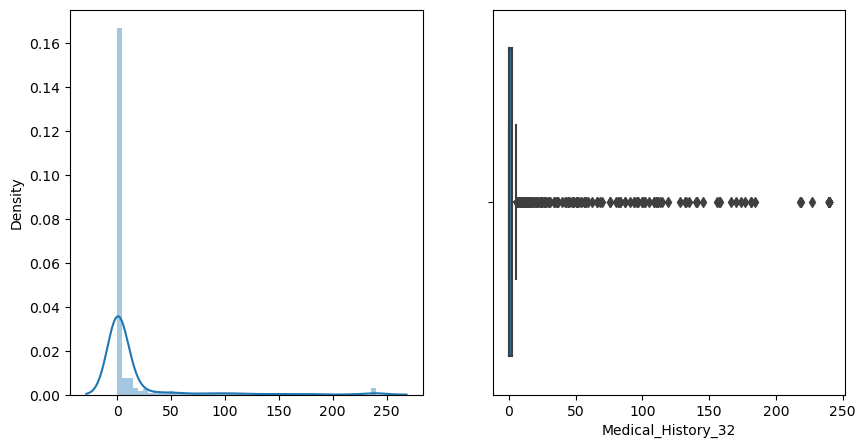

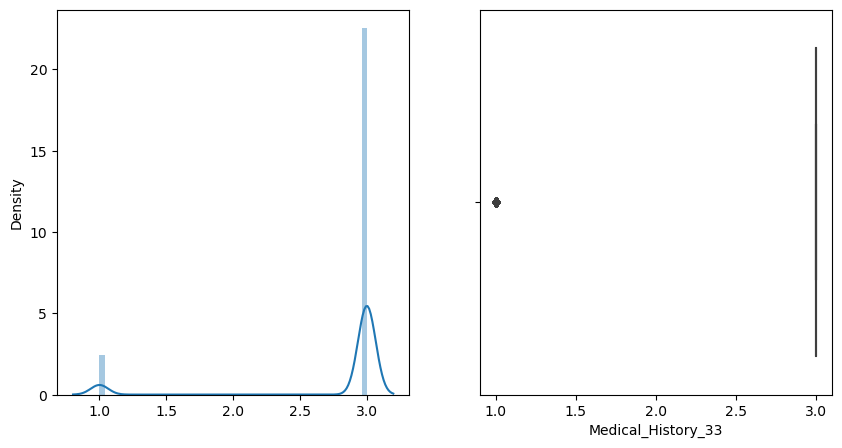

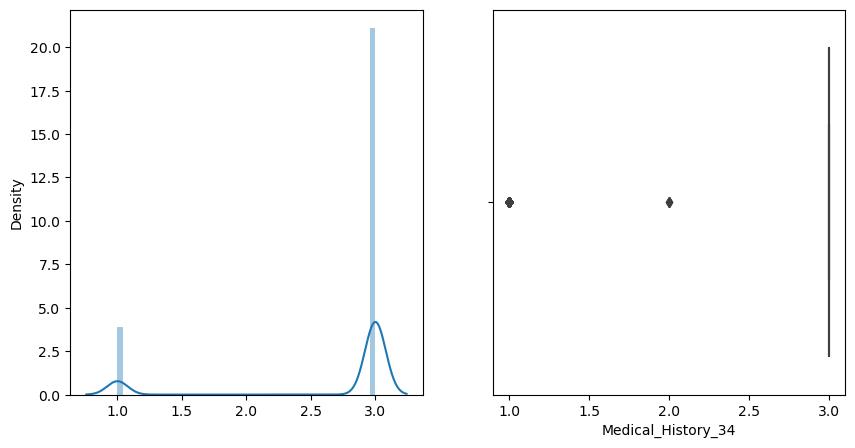

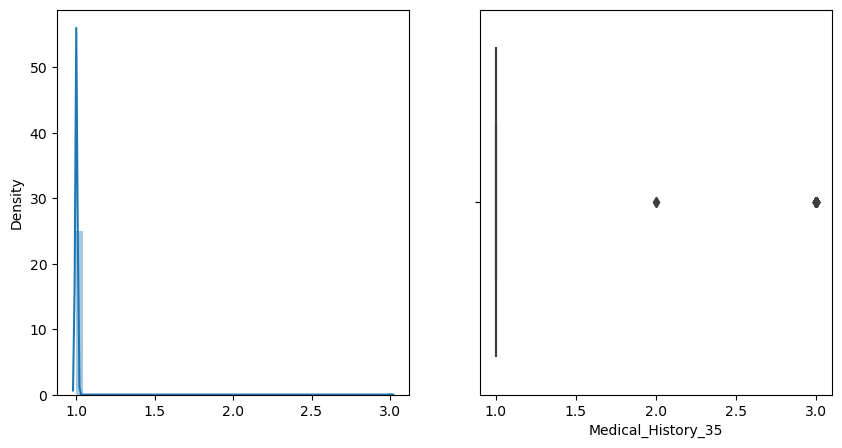

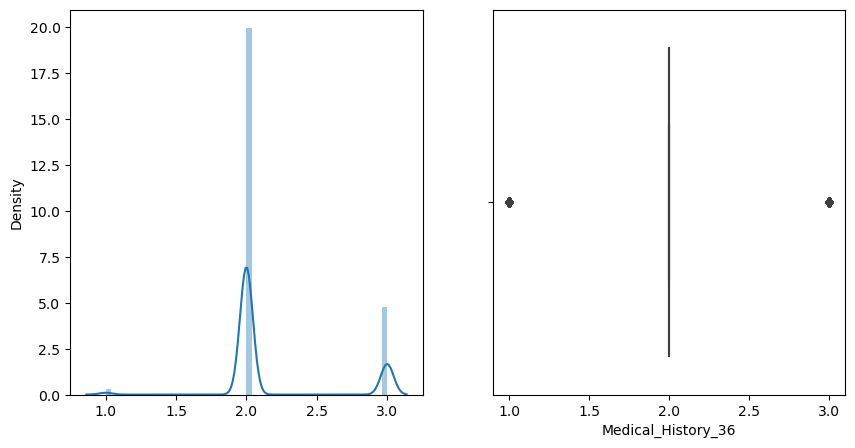

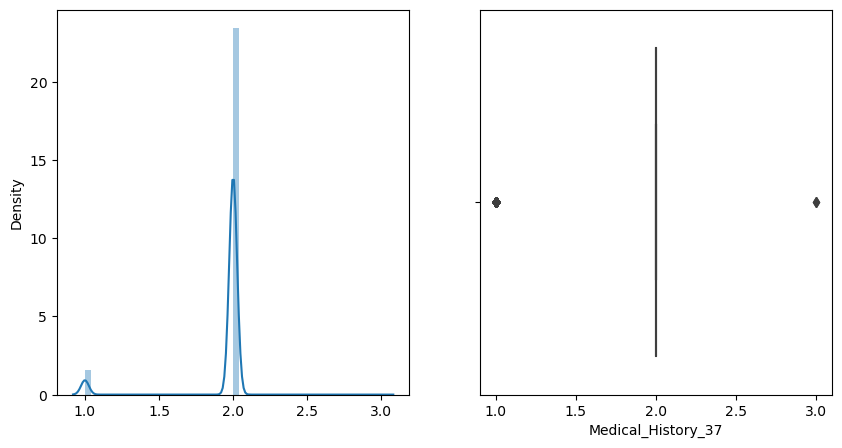

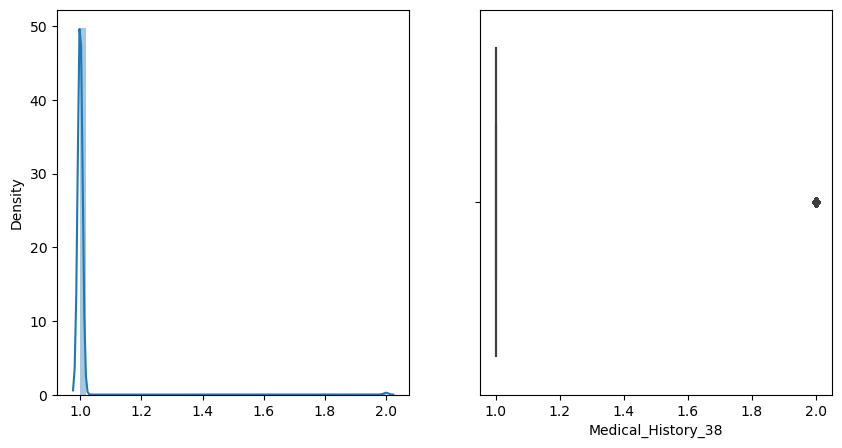

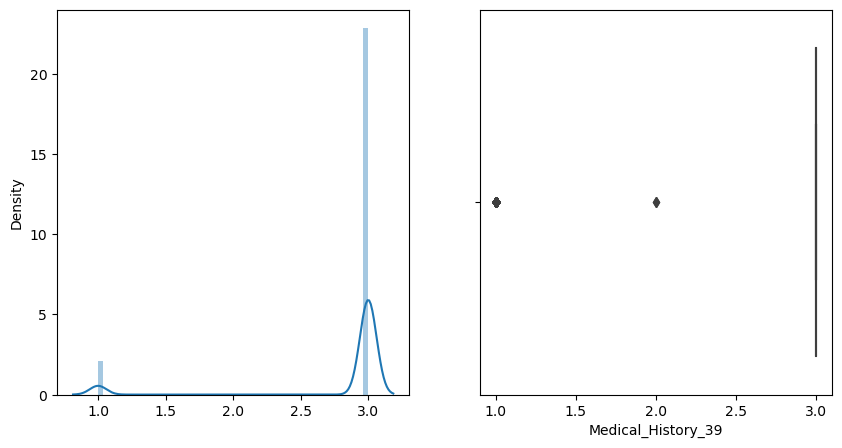

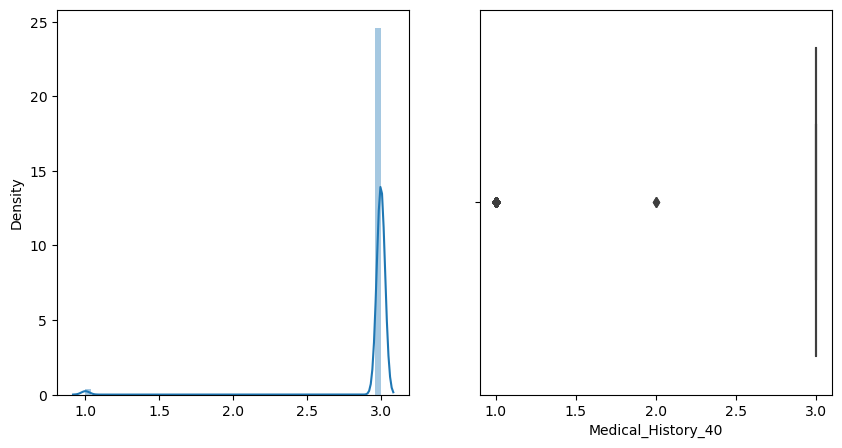

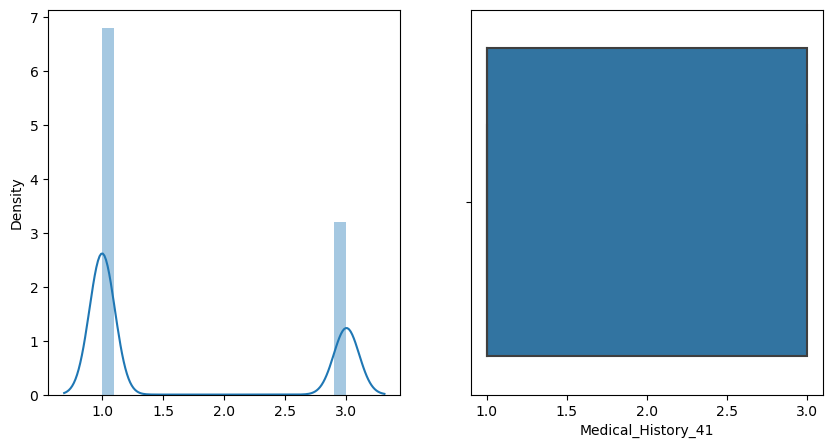

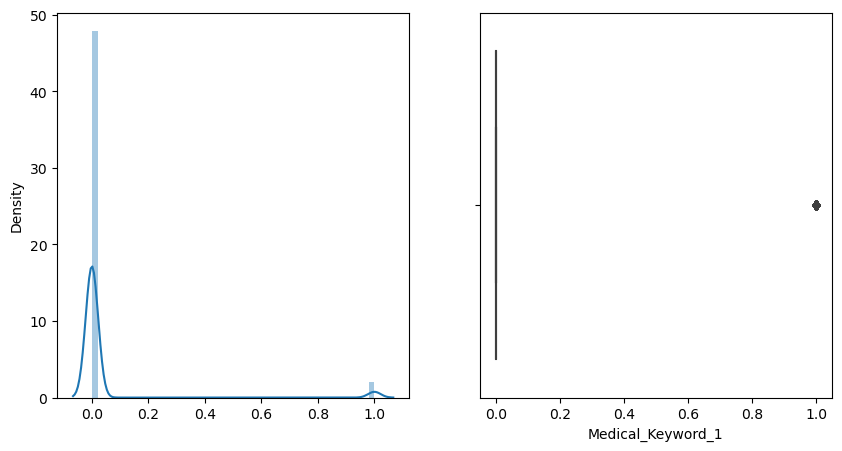

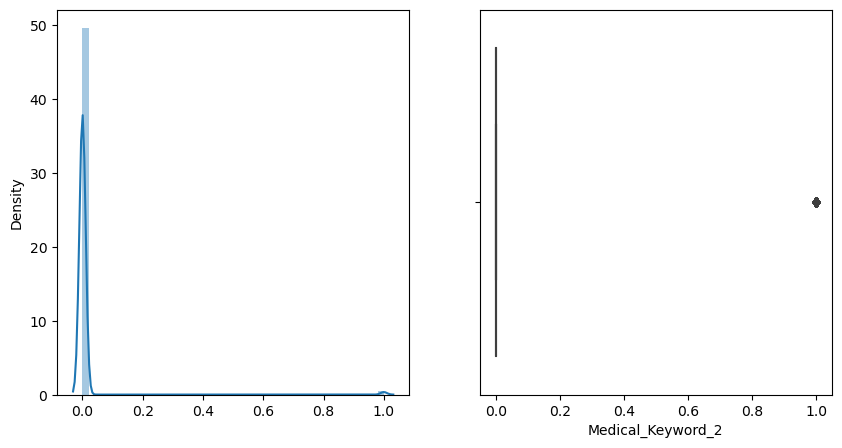

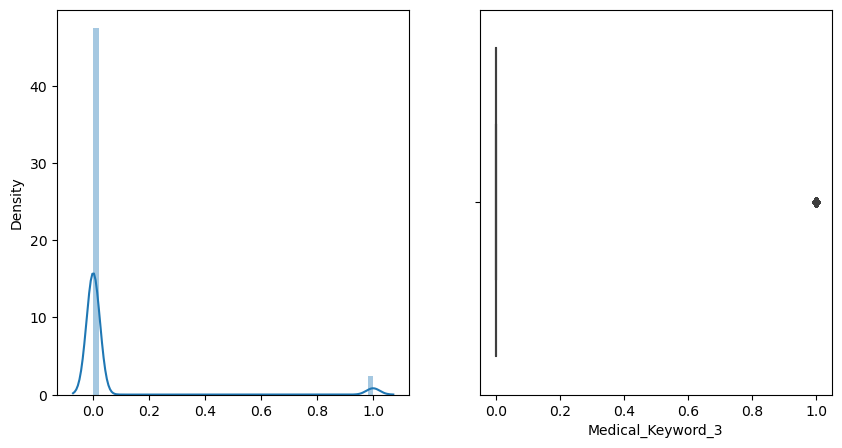

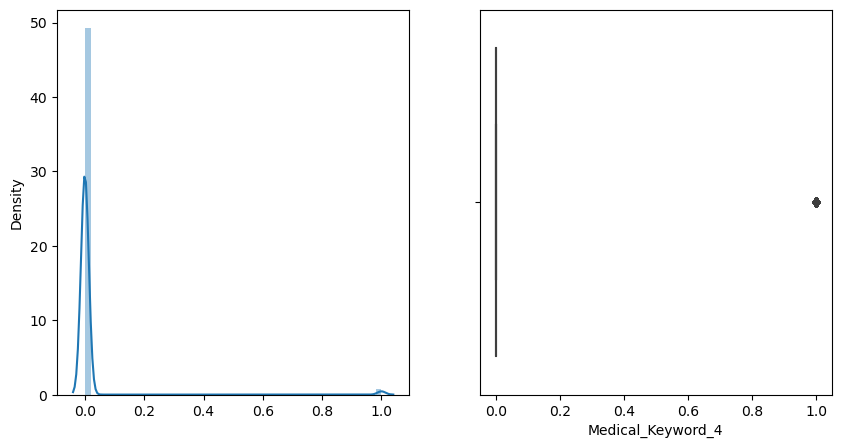

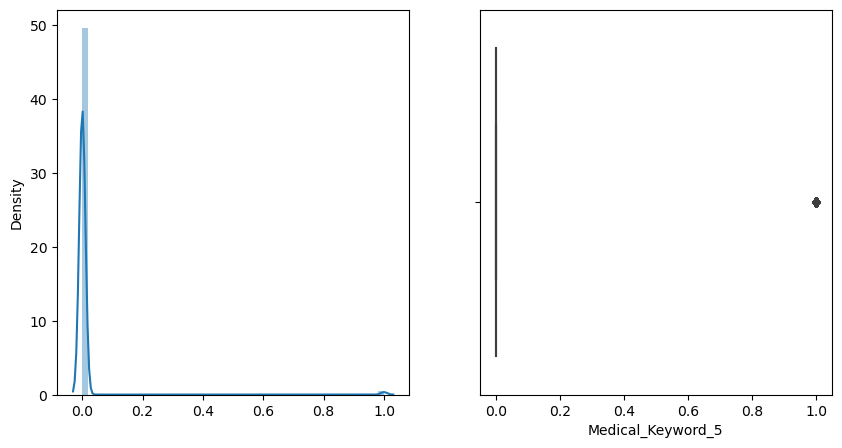

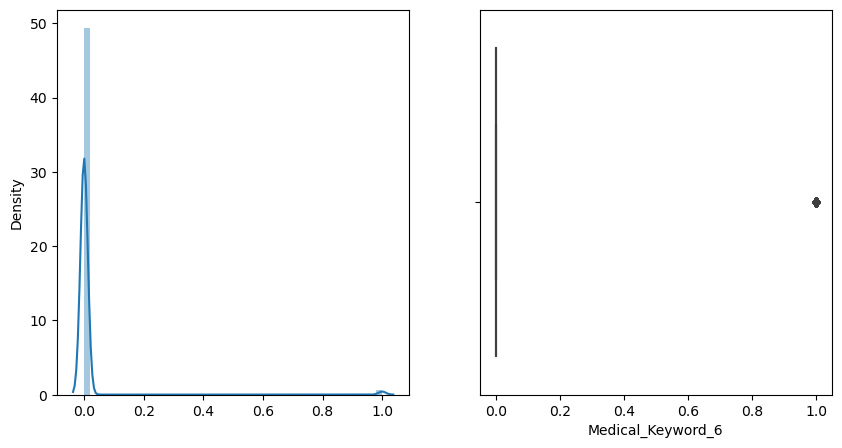

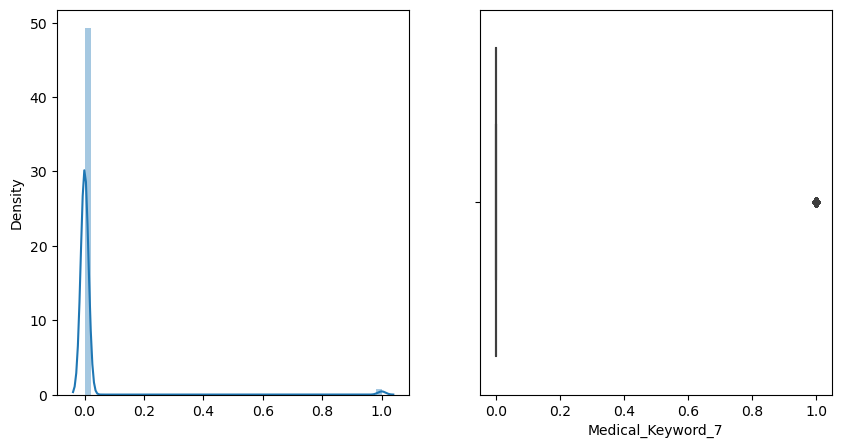

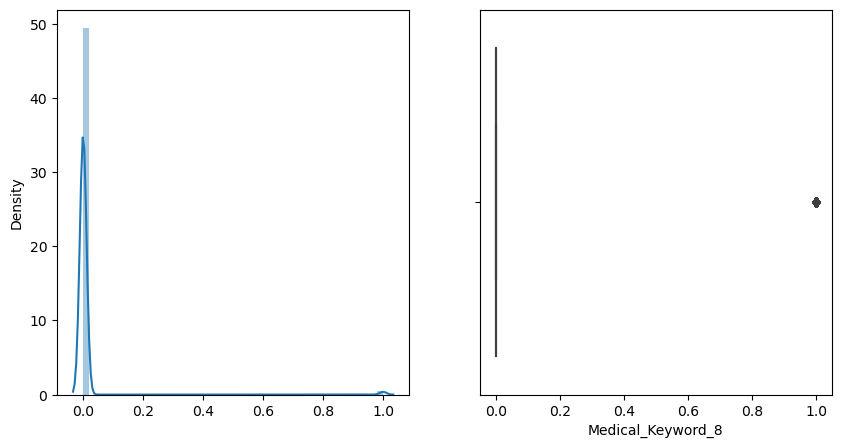

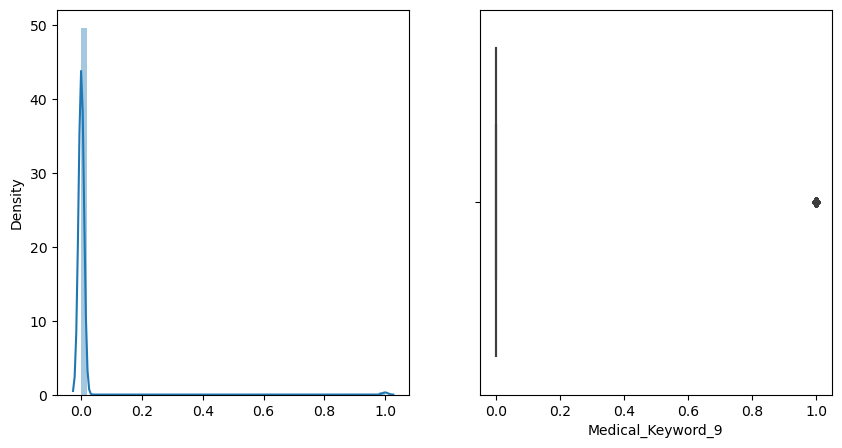

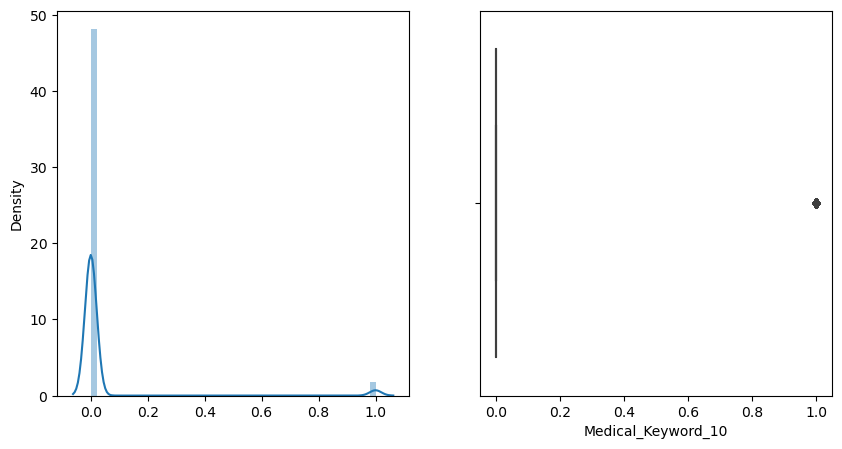

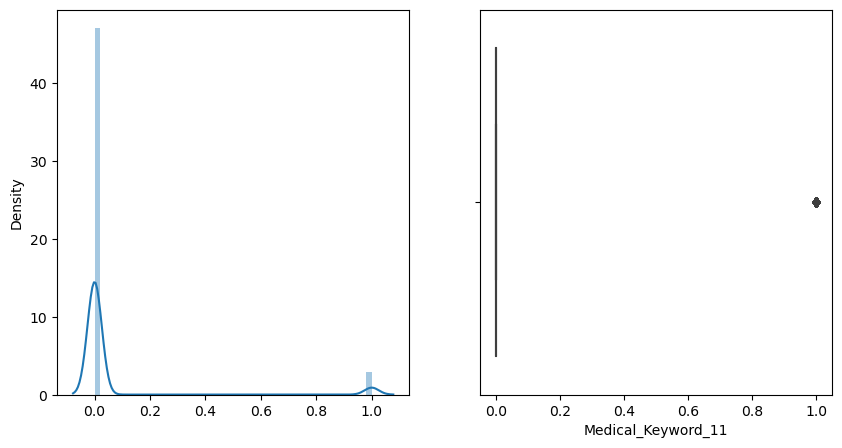

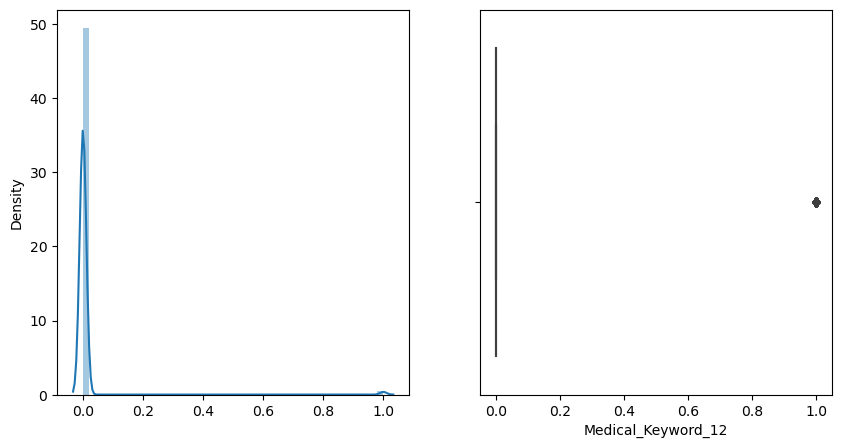

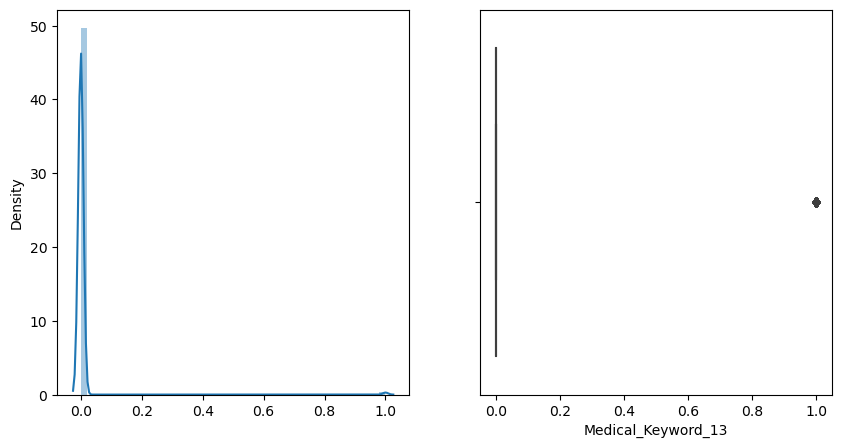

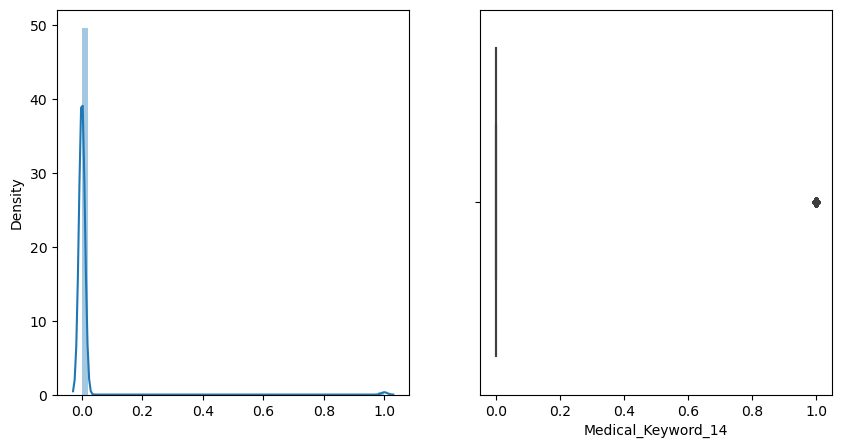

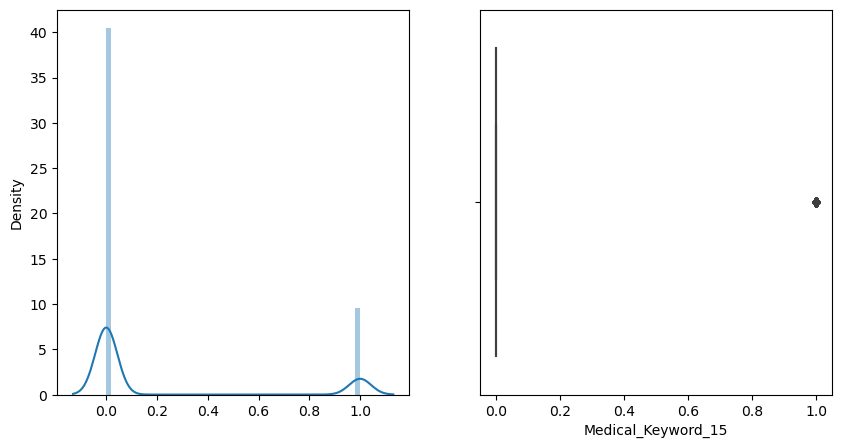

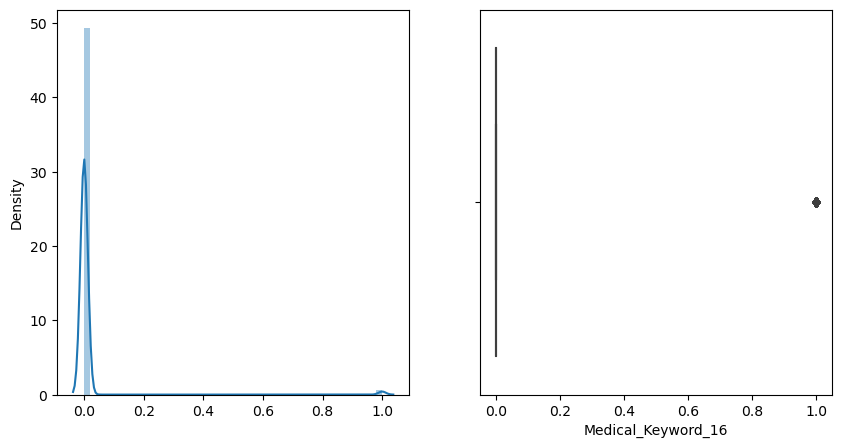

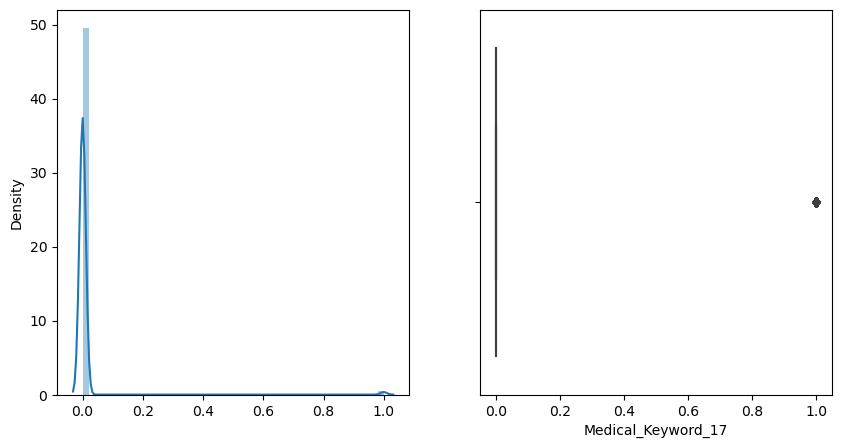

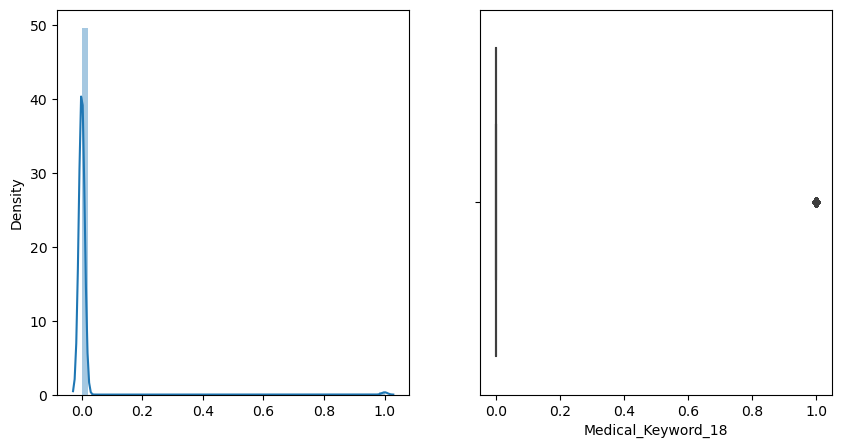

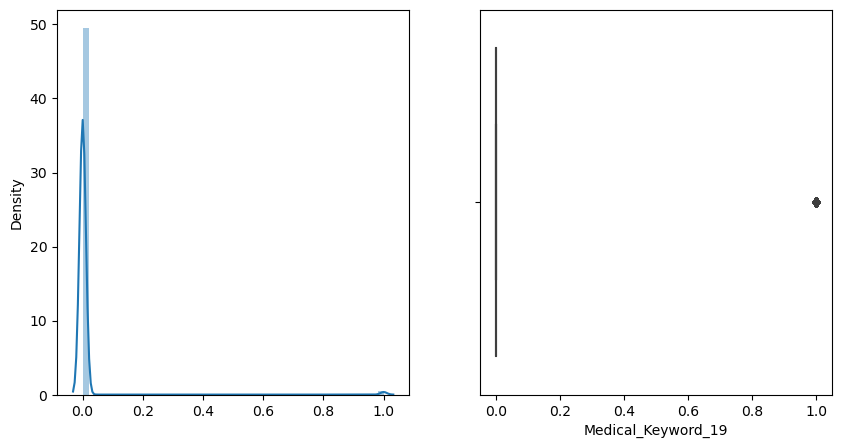

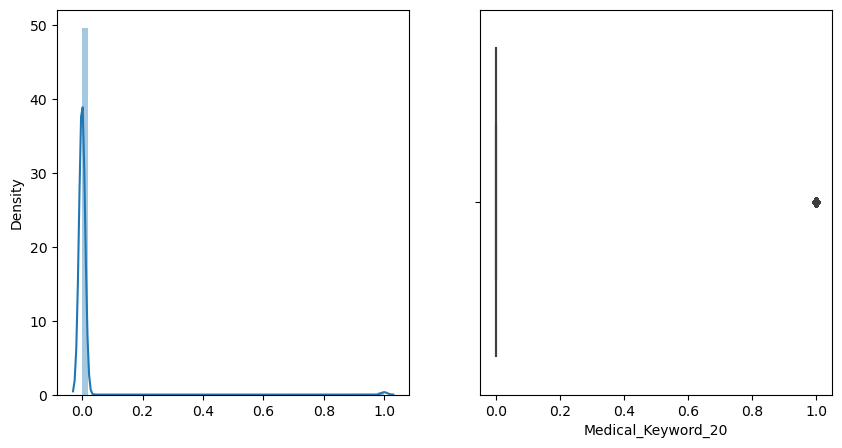

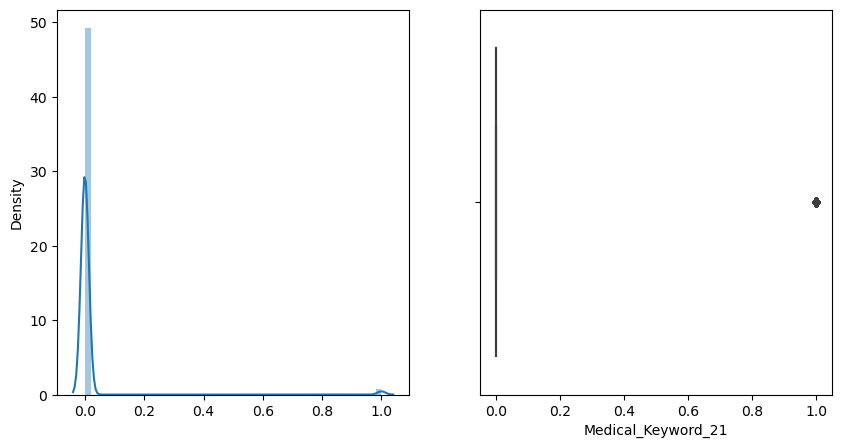

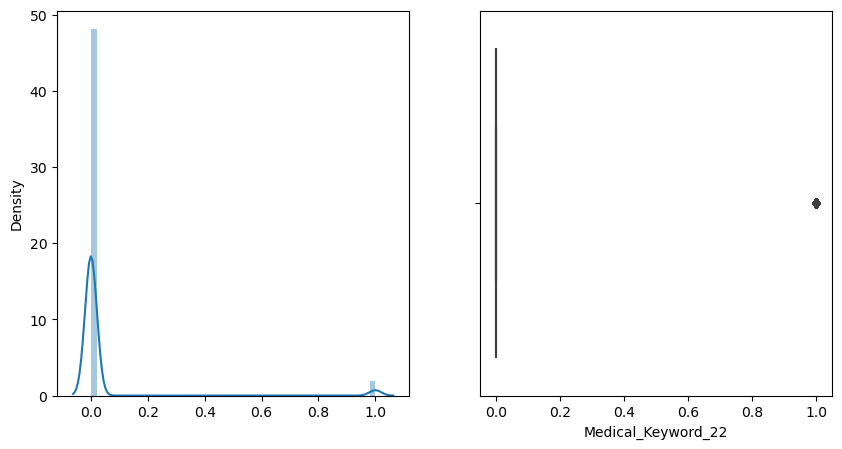

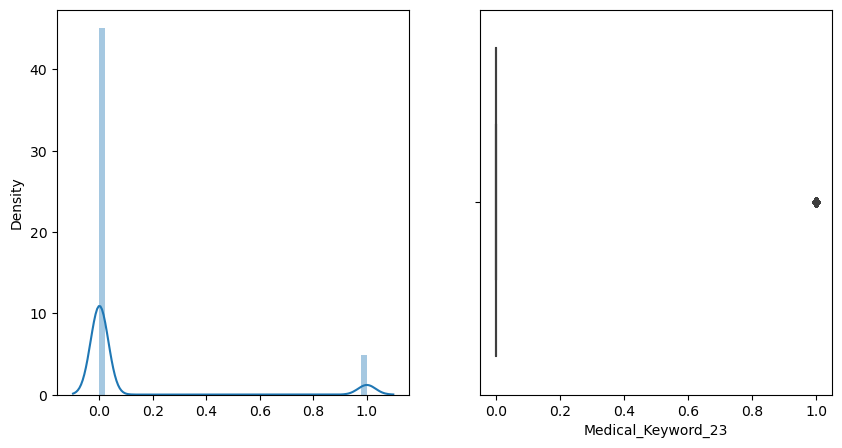

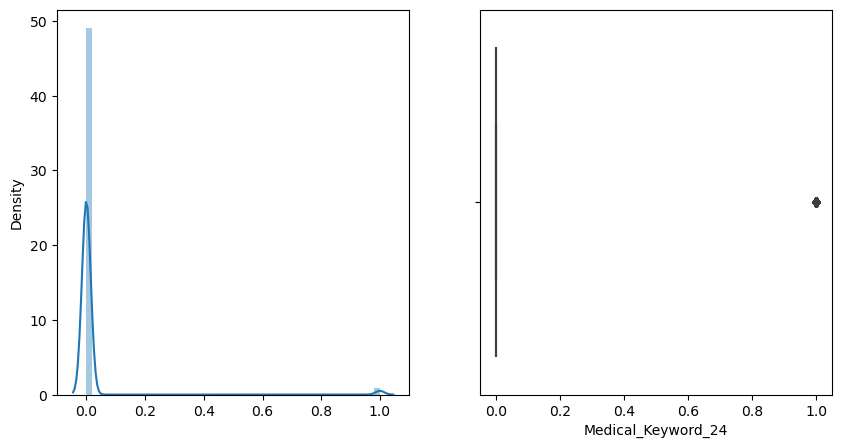

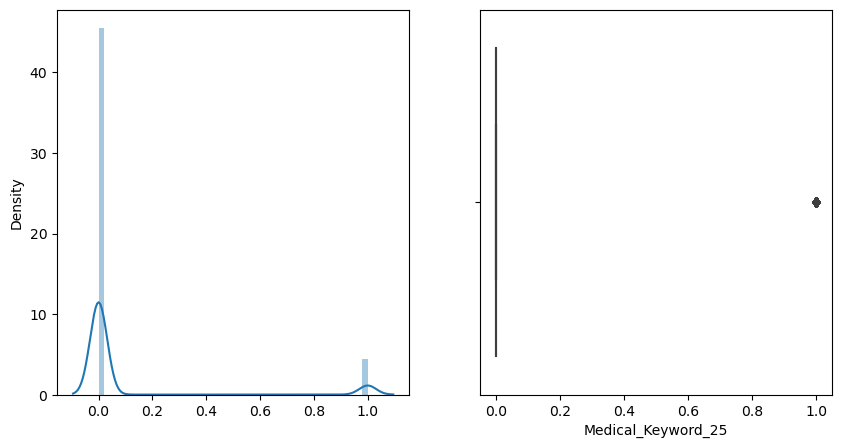

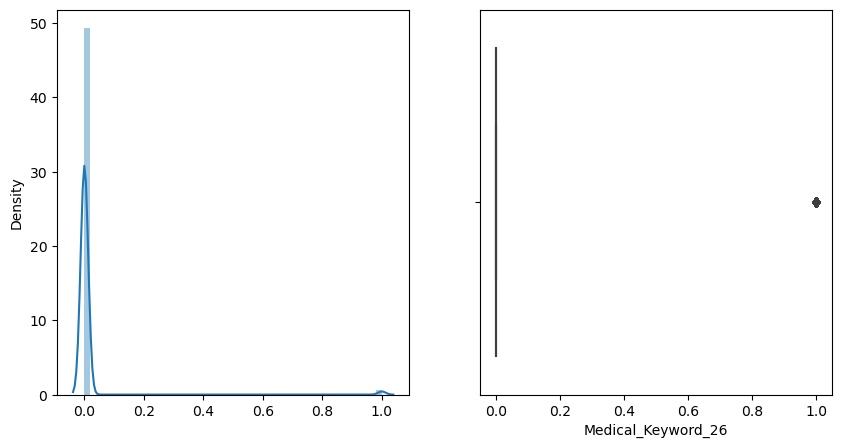

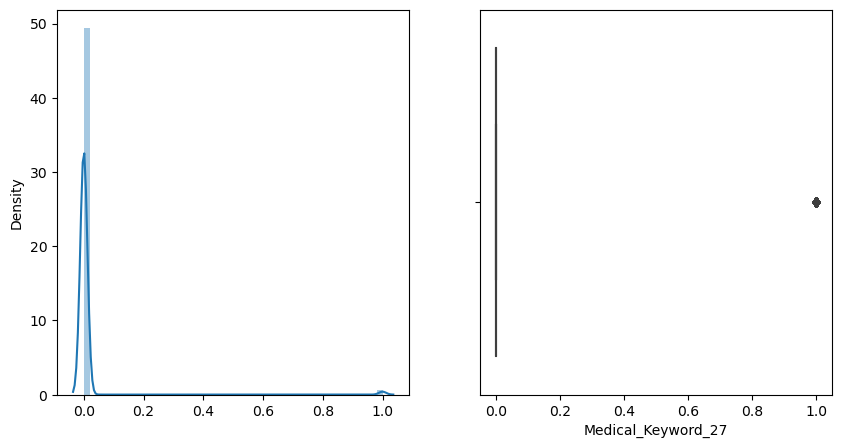

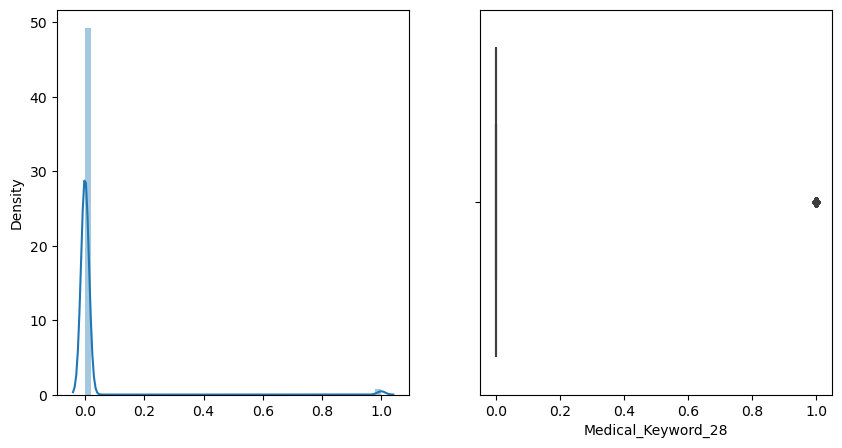

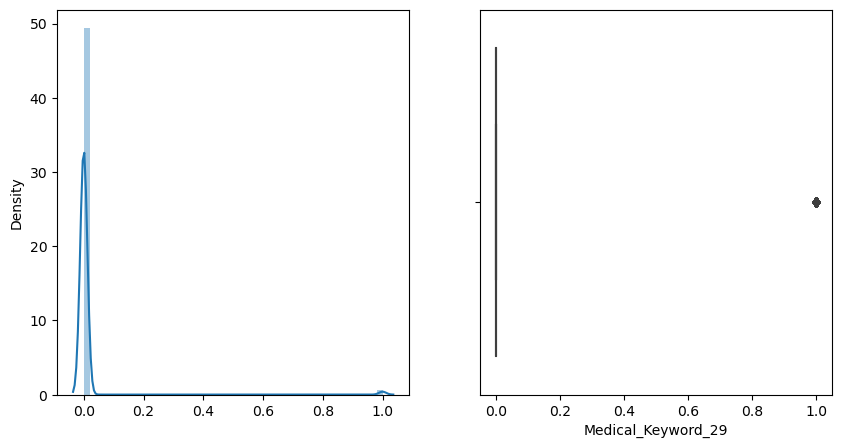

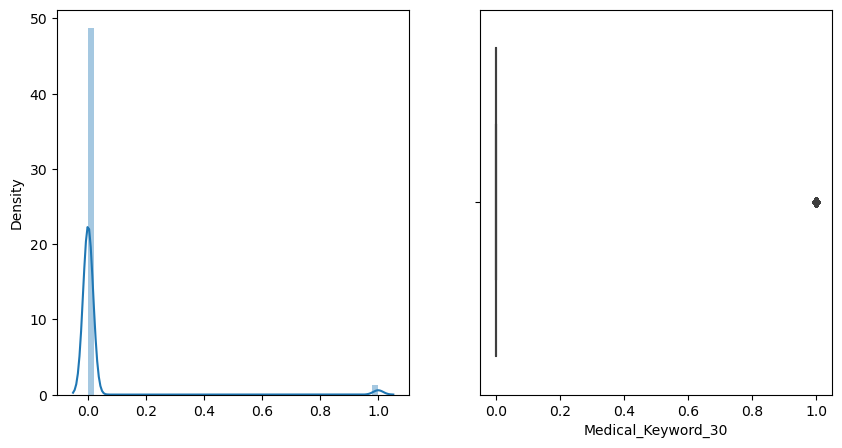

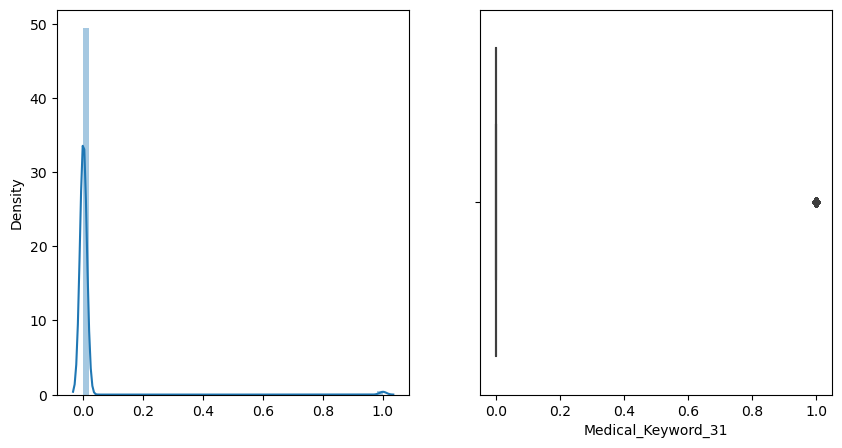

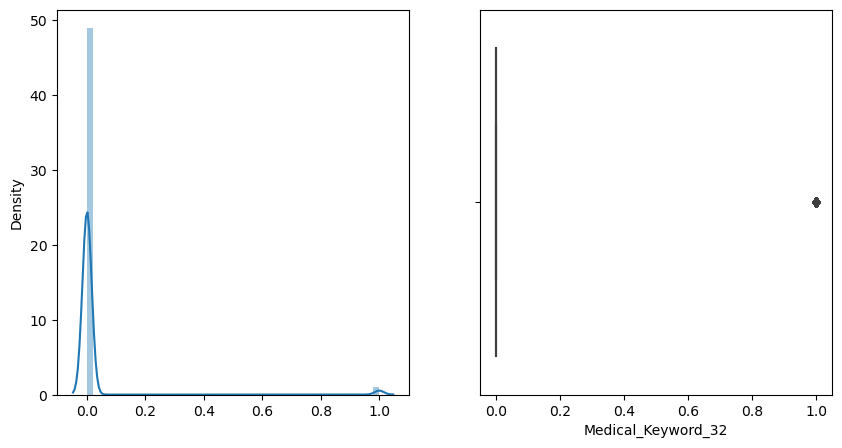

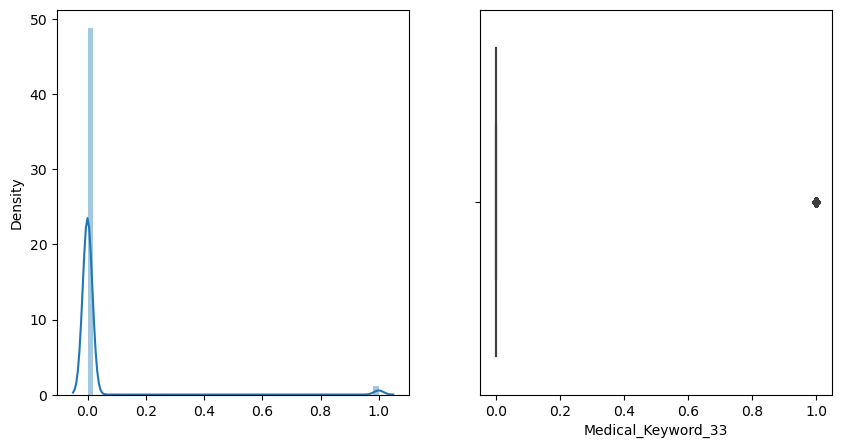

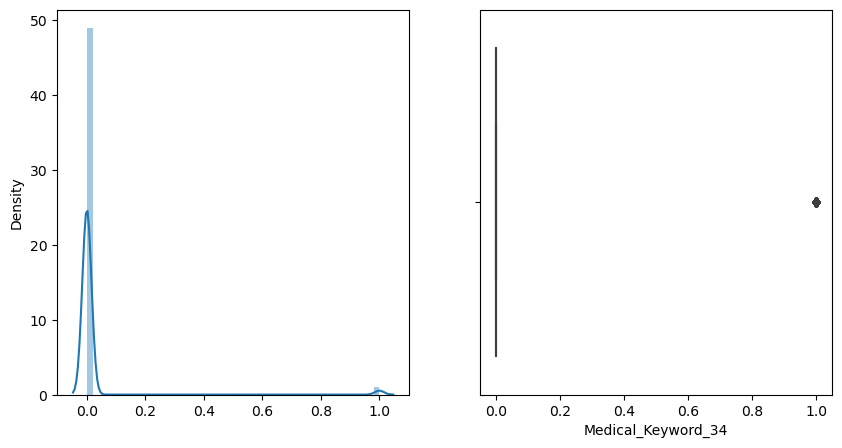

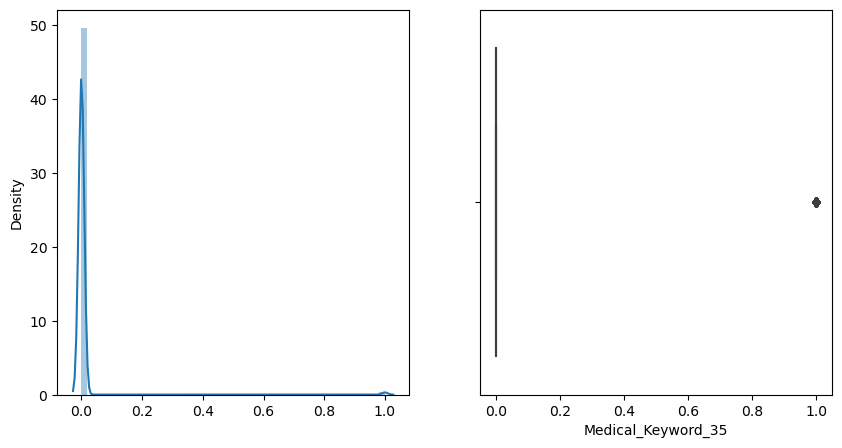

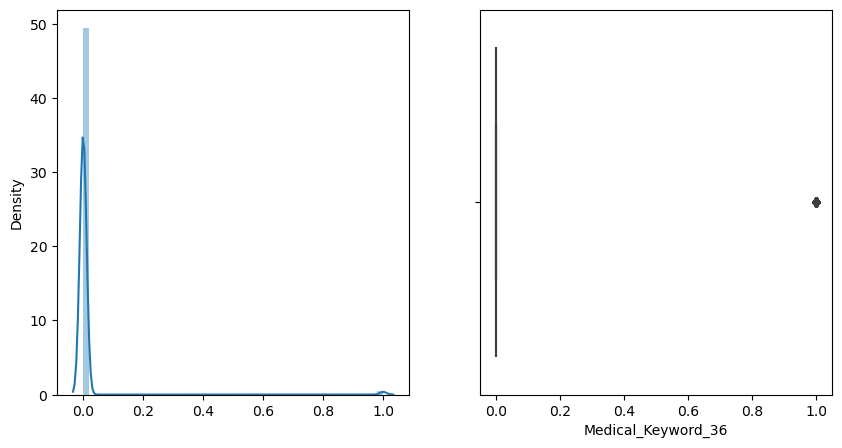

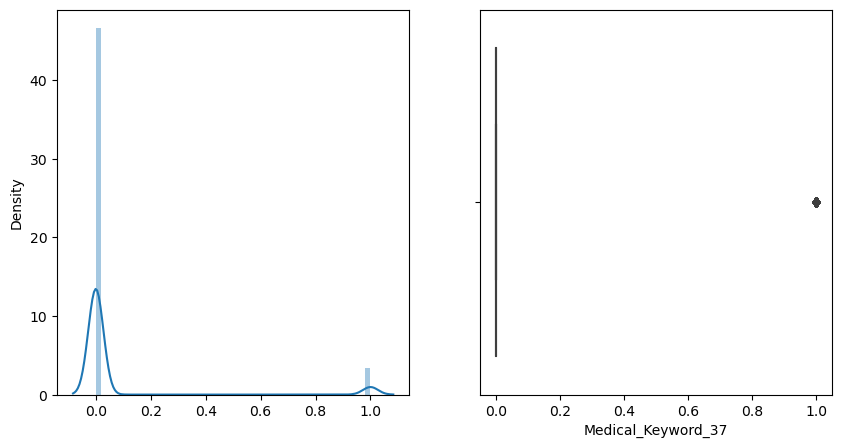

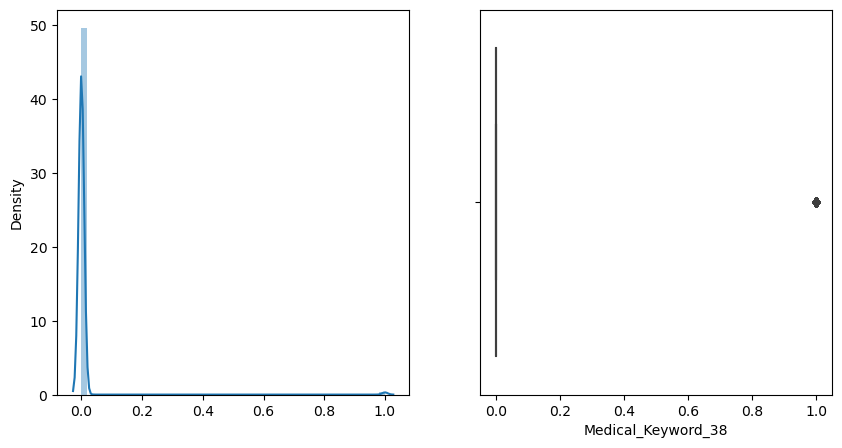

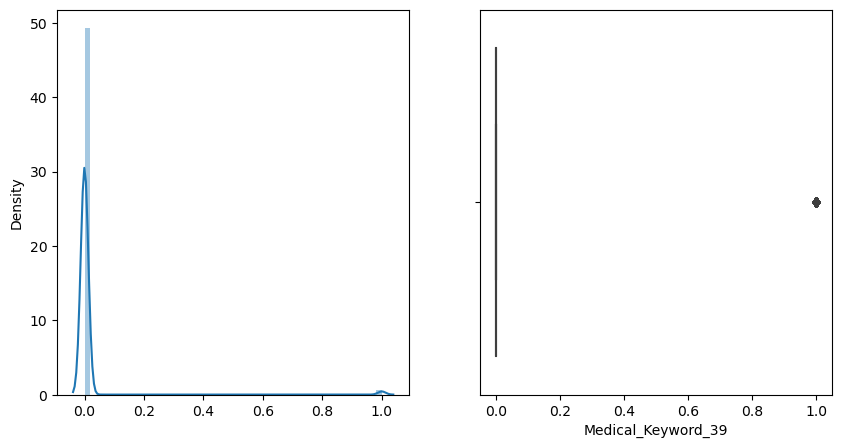

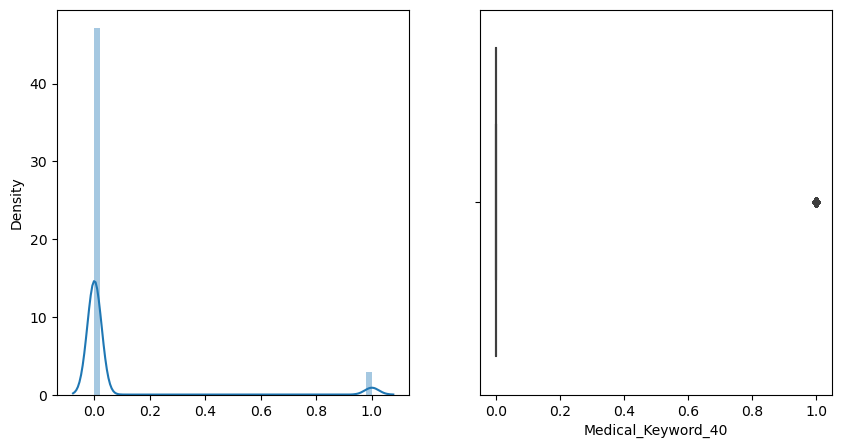

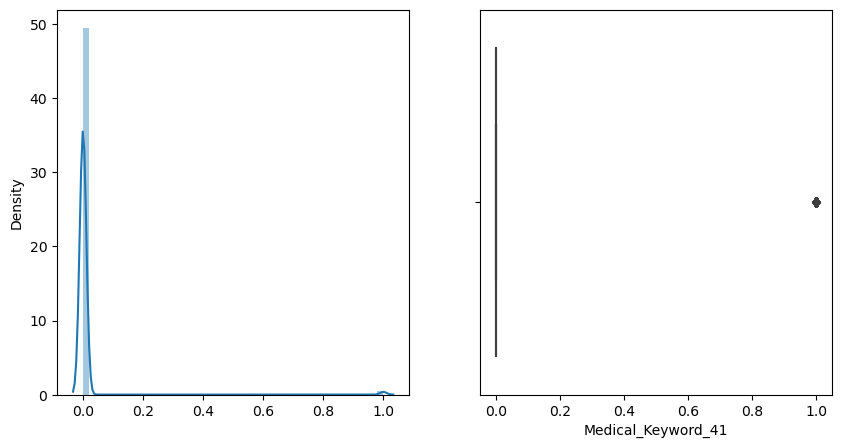

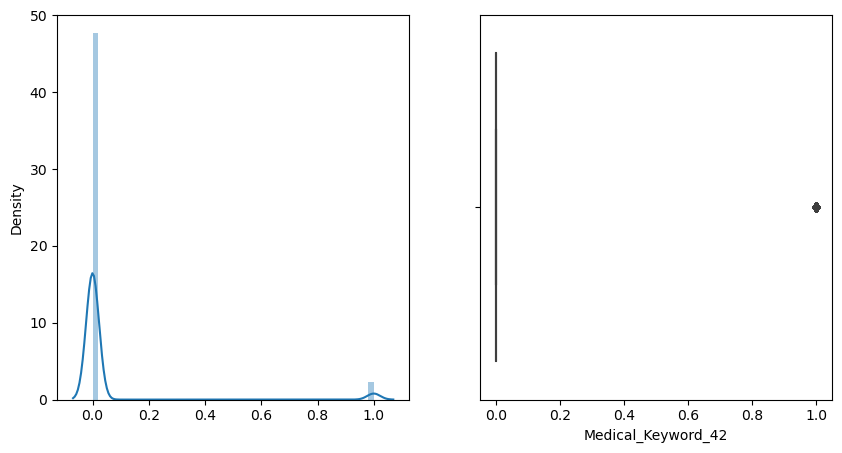

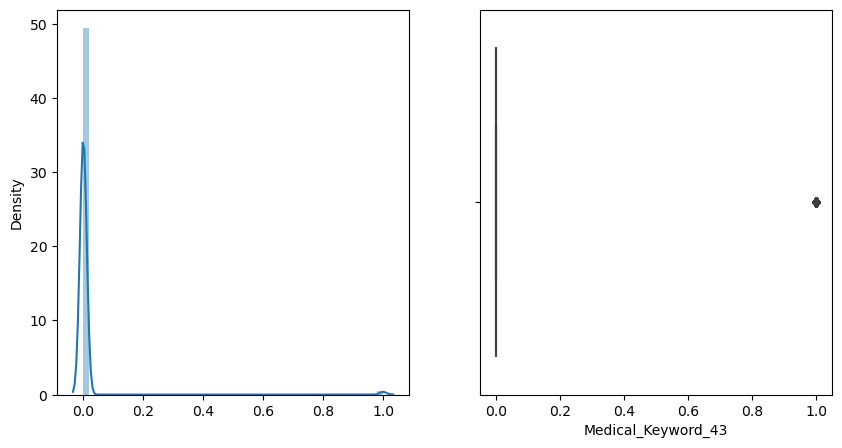

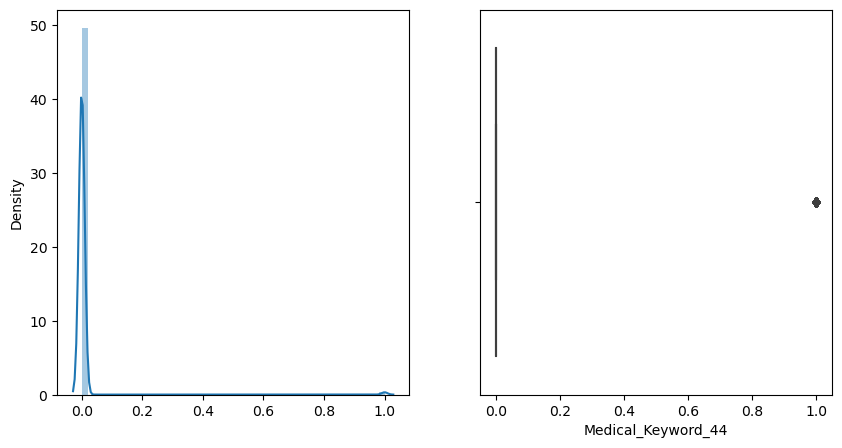

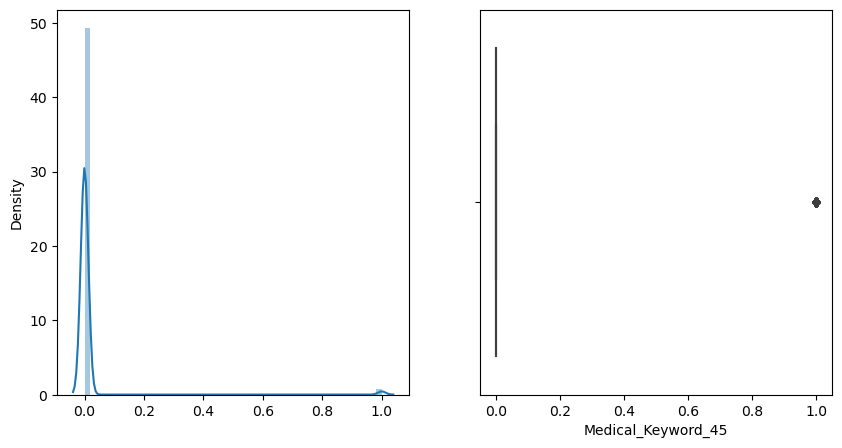

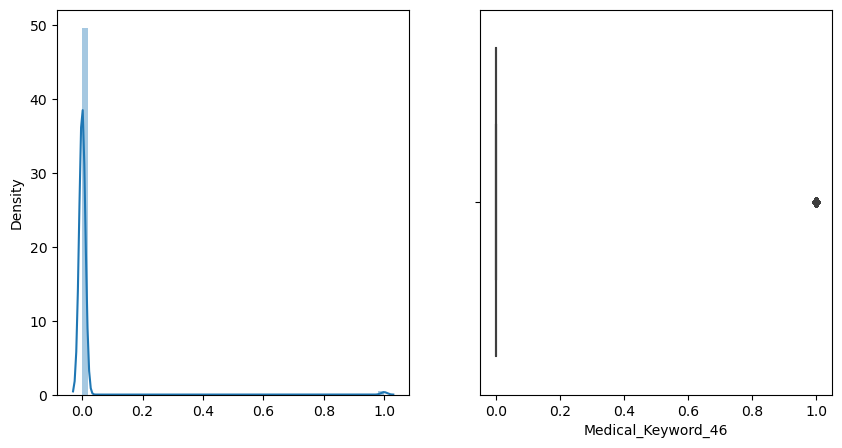

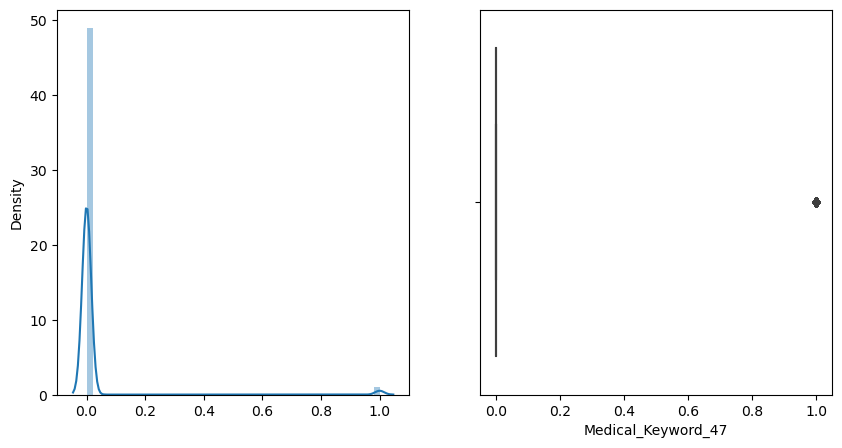

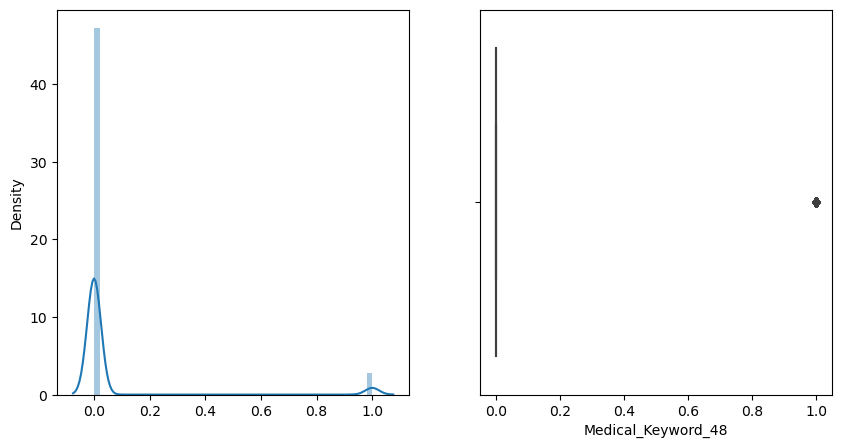

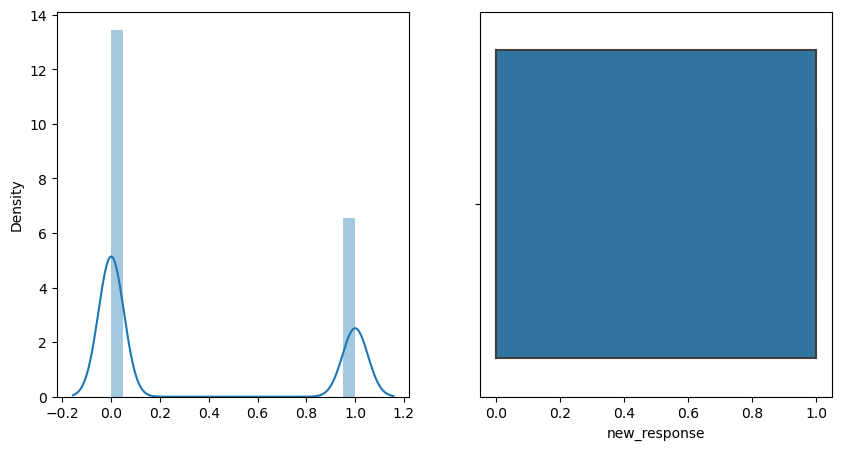

In [10]:
for col in numerical:
    fig, axes = plt.subplots(1,2, figsize = (10,5))
    sns.distplot(x = data[col], ax=axes[0])
    sns.boxplot(x = data[col],ax=axes[1])
plt.show




<Axes: >

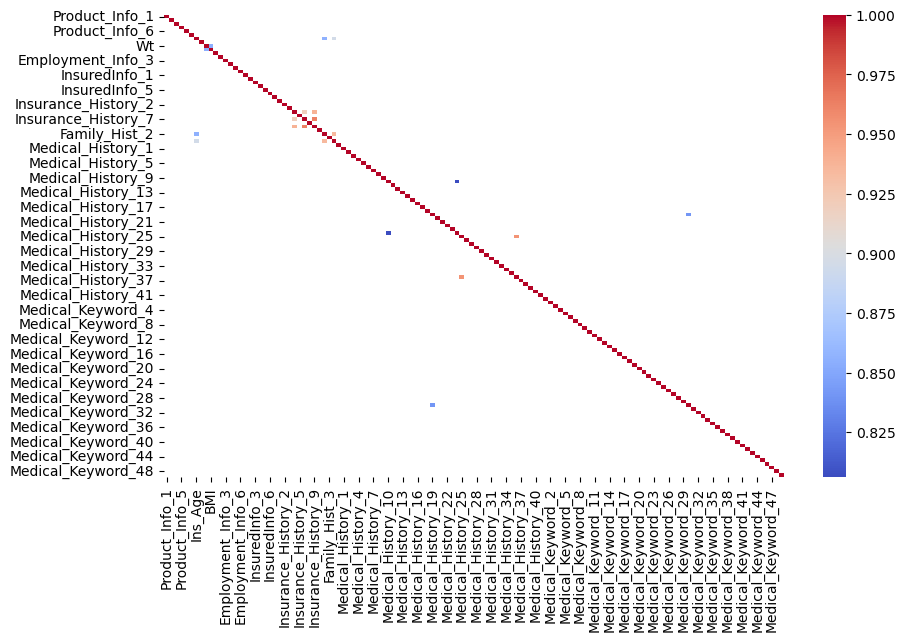

In [11]:
number_data = data.select_dtypes(include=[np.number])
corr = number_data.corr()
corr_80 = corr[corr>=.80]
corr_80

print

plt.figure(figsize=(10,6))
sns.heatmap(corr_80, cmap = 'coolwarm')




In [12]:
missing_val_cols = data.isnull().sum()/len(data)
print(missing_val_cols[missing_val_cols>0.4].sort_values(ascending = False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [13]:
columns_to_drop = missing_val_cols[missing_val_cols>0.4].index.to_list()
columns_to_drop.append('Product_Info_2')
print(columns_to_drop)
data = data.drop(columns = columns_to_drop)

['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32', 'Product_Info_2']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59381 entries, 2 to 79146
Columns: 118 entries, Product_Info_1 to new_response
dtypes: float64(10), int64(108)
memory usage: 53.9 MB


In [15]:
X = data.drop(columns = "new_response")

y = data["new_response"]

In [16]:
X = X.fillna(X.mean())

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(47504, 117) (47504,)
(11877, 117) (11877,)


In [58]:
def check_scores(model, X_train, X_test):
    
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_class_preds)
    test_accuracy = accuracy_score(y_test, test_class_preds)
    
    print("the accuracy on trin set is", train_accuracy)
    print("the accuracy on test set is", test_accuracy)
    
    train_preds = model.predict_proba(X_train)[:,1]
    test_preds = model.predict_proba(X_test)[:,1]

    train_cm = confusion_matrix(y_train, train_class_preds)
    test_cm = confusion_matrix(y_test, test_class_preds)
    
    print('Train confusion matrix:')
    print( train_cm)
    print()
    print('Test confusion matrix:')
    print(test_cm)
    print()
    
    train_auc = roc_auc_score(y_train, train_class_preds)
    test_auc = roc_auc_score(y_test, test_class_preds)
    
    print('ROC on train data:', train_auc)
    print('ROC on test data:', test_auc)    
    
    
    f1 = f1_score(y_test, test_class_preds)
    precision = precision_score(y_test, test_class_preds)
    recall = recall_score(y_test, test_class_preds) 
  
 
    train_log = log_loss(y_train,train_preds)
    test_log = log_loss(y_test, test_preds)
    
    print()
    print('Train log loss:', train_log)
    print('Test log loss:', test_log)
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
    return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log



def check_importances(model, X_train):
    importances = model.feature_importances_
    importance_dict = {'Feature': list(X_train.columns),
                      'Feature Importance': importances}
    
    importance_df = pd.DataFrame(importance_dict)
    
    importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
    
    return importance_df.sort_values(by = ['Feature Importance'], ascending = False)




def grid_search(model, parameters, X_train, y_train):
    grid = GridSearchCV(estimator = model,
                       param_grid = parameters,
                       cv = 2,
                       verbose = 2,
                       scoring = 'roc_auc')
    
    grid.fit(X_train, y_train)
    optimal_model = grid.best_estimator_
    print("Best model")
    pprint(grid.best_params_)
    
    return optimal_model
    
    
    

    
    
    

In [28]:
rf_parameters = {
    'n_estimators': [50, 100],
    'max_depth': [4,6,8],
    'min_samples_split': [50,100],
    'min_samples_leaf': [40,50]
}

rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, 

In [106]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

the accuracy on trin set is 0.8078267093297407
the accuracy on test set is 0.8057590300580955
Train confusion matrix:
[[28883  2990]
 [ 6139  9492]]

Test confusion matrix:
[[7275  744]
 [1563 2295]]

ROC on train data: 0.7567225032385794
ROC on test data: 0.7510440794093809

Train log loss: 0.42641217549516514
Test log loss: 0.42837096403434854

F score is: 0.665506742061766
Precision is: 0.7551826258637709
Recall is: 0.5948678071539658


In [61]:
#setting max columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


In [66]:
rf_importance_df = check_importances(rf_optimal_model, X_train)
print(gb_importance_df)

                 Feature  Feature Importance
9                    BMI                0.24
8                     Wt                0.18
35     Medical_History_4                0.11
52    Medical_History_23                0.10
83    Medical_Keyword_15                0.10
2         Product_Info_4                0.04
6                Ins_Age                0.04
21         InsuredInfo_6                0.03
31         Family_Hist_4                0.02
7                     Ht                0.02
71     Medical_Keyword_3                0.01
66    Medical_History_39                0.01
60    Medical_History_33                0.01
91    Medical_Keyword_23                0.01
45    Medical_History_16                0.01
93    Medical_Keyword_25                0.01
32     Medical_History_1                0.01
58    Medical_History_30                0.01
116   Medical_Keyword_48                0.01
19         InsuredInfo_4                0.00
92    Medical_Keyword_24                0.00
90    Medi

               Feature  Feature Importance
9                  BMI                0.24
8                   Wt                0.18
35   Medical_History_4                0.11
52  Medical_History_23                0.10
83  Medical_Keyword_15                0.10
2       Product_Info_4                0.04
6              Ins_Age                0.04
21       InsuredInfo_6                0.03
31       Family_Hist_4                0.02
7                   Ht                0.02


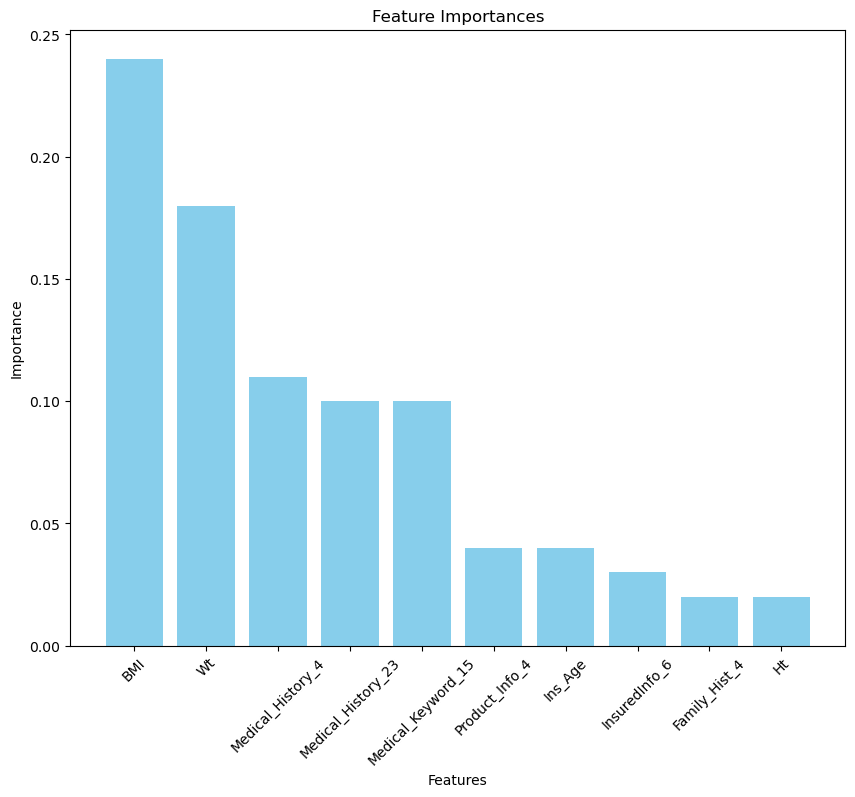

In [68]:
top_10_importance_df = rf_importance_df.nlargest(10, 'Feature Importance')  # Selecting the top 10
print(top_10_importance_df)

import matplotlib.pyplot as plt

# Create a bar chart for feature importances
plt.figure(figsize=(10, 8))
plt.bar(top_10_importance_df['Feature'], top_10_importance_df['Feature Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [69]:
gb_parameters = {
    'n_estimators': [5, 50, 200],
    'learning_rate': [0.01, 0.1, 1 ],
    'max_depth': [1, 3, 5, 7]
}

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.8s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=200; total time=   3.0s
[CV] END ..learning_rate=0.01, max_depth=1, n_estimators=200; total time=   2.9s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   8.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_es

In [107]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test )

the accuracy on trin set is 0.8538649376894577
the accuracy on test set is 0.8343857876568157
Train confusion matrix:
[[28068  3805]
 [ 3137 12494]]

Test confusion matrix:
[[6968 1051]
 [ 916 2942]]

ROC on train data: 0.8399645128935126
ROC on test data: 0.8157537783999393

Train log loss: 0.31769150465213997
Test log loss: 0.3520155954477847

F score is: 0.7494586676856452
Precision is: 0.7367893814174806
Recall is: 0.7625712804561949


In [73]:
gb_importance_df = check_importances(gb_optimal_model, X_train)
print(gb_importance_df)

                 Feature  Feature Importance
9                    BMI                0.40
52    Medical_History_23                0.14
35     Medical_History_4                0.14
2         Product_Info_4                0.05
8                     Wt                0.04
6                Ins_Age                0.03
71     Medical_Keyword_3                0.02
83    Medical_Keyword_15                0.02
21         InsuredInfo_6                0.02
58    Medical_History_30                0.01
15     Employment_Info_6                0.01
31         Family_Hist_4                0.01
30         Family_Hist_1                0.01
17         InsuredInfo_2                0.01
32     Medical_History_1                0.01
10     Employment_Info_1                0.01
108   Medical_Keyword_40                0.00
114   Medical_Keyword_46                0.00
86    Medical_Keyword_18                0.00
85    Medical_Keyword_17                0.00
84    Medical_Keyword_16                0.00
113   Medi

               Feature  Feature Importance
9                  BMI                0.40
52  Medical_History_23                0.14
35   Medical_History_4                0.14
2       Product_Info_4                0.05
8                   Wt                0.04
6              Ins_Age                0.03
71   Medical_Keyword_3                0.02
83  Medical_Keyword_15                0.02
21       InsuredInfo_6                0.02
58  Medical_History_30                0.01


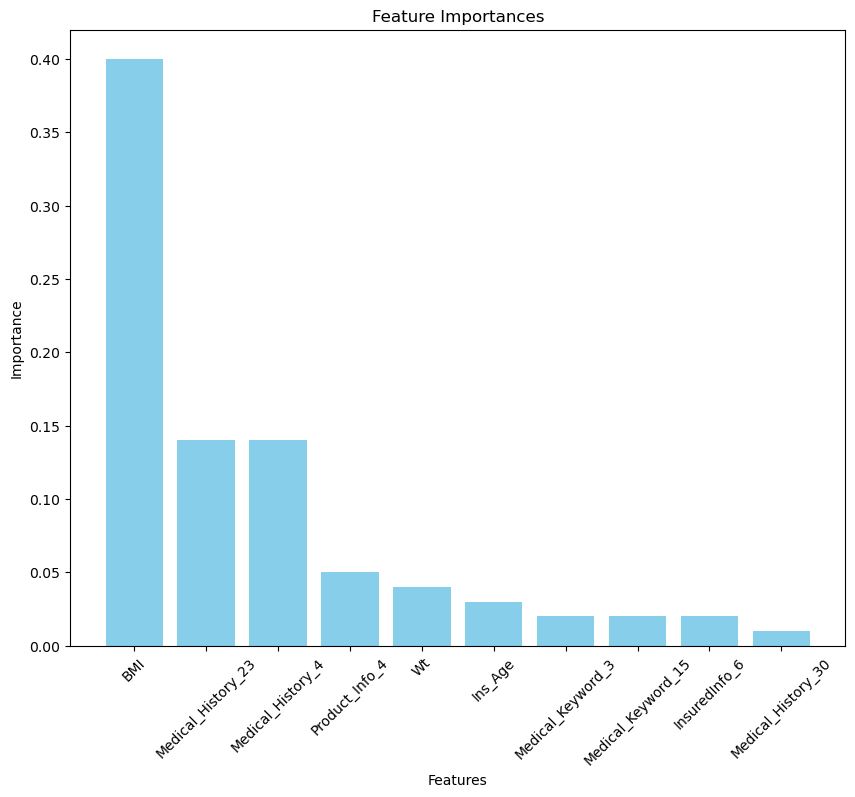

In [74]:
top_10_importance_df = gb_importance_df.nlargest(10, 'Feature Importance')  # Selecting the top 10
print(top_10_importance_df)

import matplotlib.pyplot as plt

# Create a bar chart for feature importances
plt.figure(figsize=(10, 8))
plt.bar(top_10_importance_df['Feature'], top_10_importance_df['Feature Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [79]:
xgb_parameters = {
    'n_estimators' : [2,10, 15],
    'max_depth': [1,3,5],
    'learning_rate': [0.01,0.1,1]
}

xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=15; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=15; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=2; total time=   0.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=2; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=15; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_e

In [108]:
# Getting the scores for all the score metrics used here
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log= check_scores(xgb_optimal_model, X_train, X_test )

the accuracy on trin set is 0.8276355675311553
the accuracy on test set is 0.8262187421065925
Train confusion matrix:
[[27487  4386]
 [ 3802 11829]]

Test confusion matrix:
[[6927 1092]
 [ 972 2886]]

ROC on train data: 0.8095783839091755
ROC on test data: 0.8059397034686476

Train log loss: 0.3638024666508027
Test log loss: 0.3665910448904035

F score is: 0.7366003062787136
Precision is: 0.7254901960784313
Recall is: 0.7480559875583204


In [83]:
xgb_importance_df = check_importances(xgb_optimal_model, X_train)
print(xgb_importance_df)

                 Feature  Feature Importance
52    Medical_History_23                0.35
9                    BMI                0.13
35     Medical_History_4                0.07
21         InsuredInfo_6                0.05
71     Medical_Keyword_3                0.04
83    Medical_Keyword_15                0.03
43    Medical_History_13                0.03
17         InsuredInfo_2                0.03
0         Product_Info_1                0.02
2         Product_Info_4                0.02
109   Medical_Keyword_41                0.02
36     Medical_History_5                0.02
67    Medical_History_40                0.02
47    Medical_History_18                0.01
41    Medical_History_11                0.01
66    Medical_History_39                0.01
49    Medical_History_20                0.01
60    Medical_History_33                0.01
29   Insurance_History_9                0.01
80    Medical_Keyword_12                0.01
91    Medical_Keyword_23                0.01
103   Medi

               Feature  Feature Importance
52  Medical_History_23                0.35
9                  BMI                0.13
35   Medical_History_4                0.07
21       InsuredInfo_6                0.05
71   Medical_Keyword_3                0.04
83  Medical_Keyword_15                0.03
43  Medical_History_13                0.03
17       InsuredInfo_2                0.03
0       Product_Info_1                0.02
2       Product_Info_4                0.02


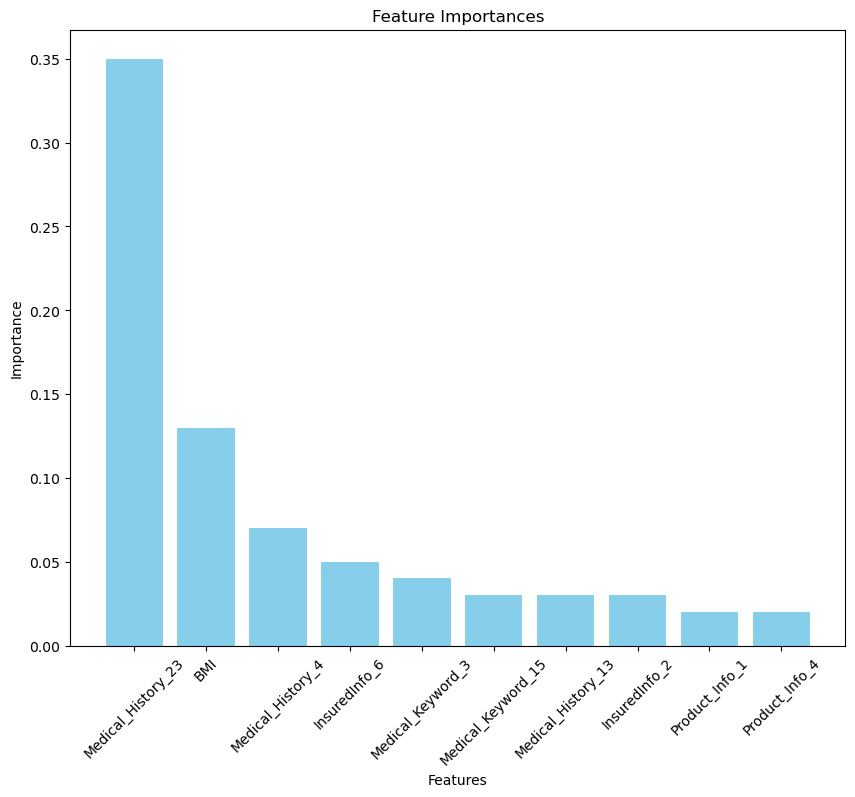

In [84]:
top_10_importance_df = xgb_importance_df.nlargest(10, 'Feature Importance')  # Selecting the top 10
print(top_10_importance_df)

import matplotlib.pyplot as plt

# Create a bar chart for feature importances
plt.figure(figsize=(10, 8))
plt.bar(top_10_importance_df['Feature'], top_10_importance_df['Feature Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [90]:
lr_parameters = {
    'solver': ['lbfgs'],
    'C': [100,10, 1, 0.1, 0.01],
    'penalty': ['l1', 'l2']
}

lr_optimal_model = grid_search(LogisticRegression(), lr_parameters, X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.5s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.5s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.4s


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 f

[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.4s
Best model
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# Getting the scores for all the score metrics used here

lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, X_train, X_test )

the accuracy on trin set is 0.746000336813742
the accuracy on test set is 0.7506946198534984
Train confusion matrix:
[[26891  4982]
 [ 7084  8547]]

Test confusion matrix:
[[6809 1210]
 [1751 2107]]

ROC on train data: 0.6952450913948972
ROC on test data: 0.697623131454708

Train log loss: 0.4989375716380863
Test log loss: 0.49475339918166744

F score is: 0.5873170731707317
Precision is: 0.6352125414531203
Recall is: 0.5461378952825298


In [94]:
# lr_importance_df = check_importances(lr_optimal_model, X_train)
# print(lr_importance_df)

coefficients = lr_optimal_model.coef_[0]
features = [f'Feature {i+1}' for i in range(X.shape[1])]

# Create DataFrame for display
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Display the DataFrame sorted by coefficient magnitude
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

         Feature  Coefficient
52    Feature 53     1.137992
35    Feature 36     0.717883
83    Feature 84    -0.609350
21    Feature 22     0.424150
9     Feature 10    -0.403700
45    Feature 46    -0.325241
66    Feature 67     0.314039
2      Feature 3     0.308427
8      Feature 9    -0.265325
12    Feature 13    -0.247310
6      Feature 7    -0.230626
71    Feature 72    -0.200490
58    Feature 59    -0.200382
22    Feature 23    -0.186657
60    Feature 61     0.186297
24    Feature 25    -0.180006
4      Feature 5    -0.178301
91    Feature 92    -0.159875
37    Feature 38     0.158917
30    Feature 31     0.155824
16    Feature 17     0.150047
54    Feature 55    -0.149467
116  Feature 117    -0.145018
93    Feature 94    -0.140458
43    Feature 44     0.139987
39    Feature 40    -0.134394
20    Feature 21    -0.131810
17    Feature 18    -0.128269
29    Feature 30    -0.126965
42    Feature 43    -0.124435
27    Feature 28    -0.119047
41    Feature 42    -0.117455
50    Feat

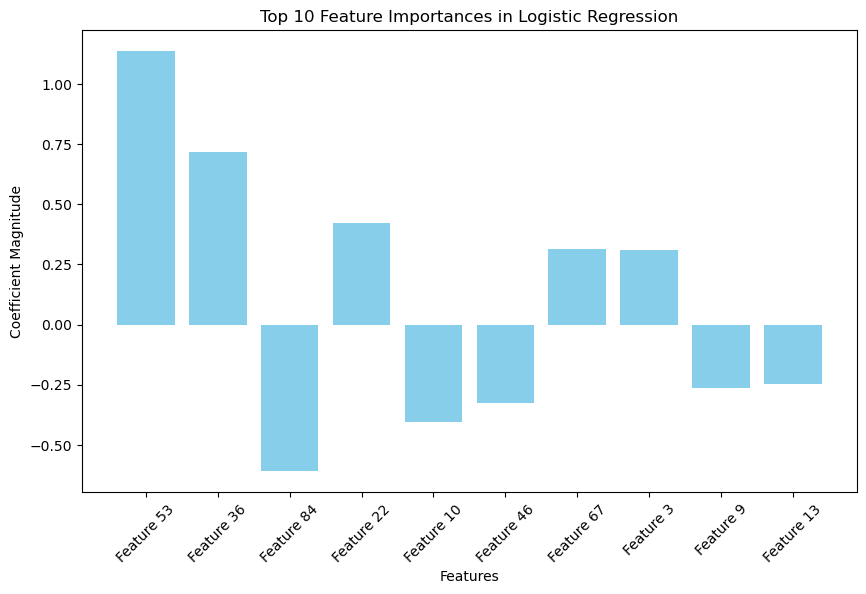

In [96]:
# Sort DataFrame by the absolute value of coefficients and select top 10
top_10_coef_df = coef_df.assign(Abs_Coefficient=lambda x: x.Coefficient.abs()) \
                         .sort_values(by='Abs_Coefficient', ascending=False) \
                         .head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_coef_df['Feature'], top_10_coef_df['Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Top 10 Feature Importances in Logistic Regression')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()

In [98]:
estimators = []

estimators.append(('randomforest', rf_optimal_model))
estimators.append(('gradient boosting', gb_optimal_model))
estimators.append(('xg boosting', xgb_optimal_model))
estimators.append(('logistic regression', lr_optimal_model))

voting_model = VotingClassifier(estimators, voting = 'soft')

voting_model.fit(X_train, y_train)



/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('randomforest',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_leaf=40,
                                                     min_samples_split=100)),
                             ('gradient boosting',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200)),
                             ('xg boosting',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=No...
                                            interaction_constraints=None,
                                            learning_rate=1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=15, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('logistic regression', LogisticRegression(C=10))],
                 voting='soft')

In [110]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, X_train, X_test )

the accuracy on trin set is 0.8345402492421691
the accuracy on test set is 0.8293340069041003
Train confusion matrix:
[[28339  3534]
 [ 4326 11305]]

Test confusion matrix:
[[7125  894]
 [1133 2725]]

ROC on train data: 0.8061823648543357
ROC on test data: 0.7974196489402986

Train log loss: 0.3806210806253278
Test log loss: 0.3892777400295601

F score is: 0.728901966029156
Precision is: 0.7529704338214976
Recall is: 0.7063245204769311


In [104]:
estimators = []

estimators.append(('randomforest', rf_optimal_model))
estimators.append(('gradient boosting', gb_optimal_model))
estimators.append(('xg boosting', xgb_optimal_model))
estimators.append(('logistic regression', lr_optimal_model))

stacking_model = StackingClassifier(estimators,  final_estimator = RandomForestClassifier())

stacking_model.fit(X_train, y_train)

/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mandarangchekar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

StackingClassifier(estimators=[('randomforest',
                                RandomForestClassifier(max_depth=8,
                                                       min_samples_leaf=40,
                                                       min_samples_split=100)),
                               ('gradient boosting',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=200)),
                               ('xg boosting',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=...
                                              learning_rate=1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=15, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('logistic regression',
                                LogisticRegression(C=10))],
                   final_estimator=RandomForestClassifier())

In [112]:
stacked_model, stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_f1, stacked_precision, stacked_recall, stacked_train_log, stacked_test_log = check_scores(stacking_model, X_train, X_test )

the accuracy on trin set is 0.8369610980127989
the accuracy on test set is 0.8217563357750274
Train confusion matrix:
[[28066  3807]
 [ 3938 11693]]

Test confusion matrix:
[[7008 1011]
 [1106 2752]]

ROC on train data: 0.8143109772857546
ROC on test data: 0.7936236973734814

Train log loss: 0.3530235465450448
Test log loss: 0.4122208759710194

F score is: 0.7222149324235665
Precision is: 0.7313313845336168
Recall is: 0.7133229652669777


In [113]:
# Making a dataframe of all the scores for every model

scores_ = [("Random Forest", rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_train_log, rf_test_log,rf_f1, rf_precision, rf_recall),
("Gradient Boosting",  gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_train_log, gb_test_log,gb_f1, gb_precision,gb_recall,),
("XG Boost", xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_train_log, xgb_test_log,xgb_f1, xgb_precision, xgb_recall),
("Logistic Regression", lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_train_log, lr_test_log,lr_f1, lr_precision, lr_recall,),
("Voting Classifier", voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_train_log, voting_test_log, voting_f1, voting_precision, voting_recall),
("Stacked Model", stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_train_log, stacked_test_log, stacked_f1, stacked_precision, stacked_recall)]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Train ROC', 'Test ROC', 'Train Accuracy', 'Test Accuracy', 'Train Log Loss','Test Log Loss','F-Score', 'Precision','Recall',])
Scores_.set_index('Model Name', inplace = True)

Scores_


Train ROC  Test ROC  Train Accuracy  Test Accuracy  \
Model Name                                                                
Random Forest         0.756723  0.751044        0.807827       0.805759   
Gradient Boosting     0.839965  0.815754        0.853865       0.834386   
XG Boost              0.809578  0.805940        0.827636       0.826219   
Logistic Regression   0.695245  0.697623        0.746000       0.750695   
Voting Classifier     0.806182  0.797420        0.834540       0.829334   
Stacked Model         0.814311  0.793624        0.836961       0.821756   

                     Train Log Loss  Test Log Loss   F-Score  Precision  \
Model Name                                                                
Random Forest              0.426412       0.428371  0.665507   0.755183   
Gradient Boosting          0.317692       0.352016  0.749459   0.736789   
XG Boost                   0.363802       0.366591  0.736600   0.725490   
Logistic Regression        0.498938       0.494753  0.587317   0.635213   
Voting Classifier          0.380621       0.389278  0.728902   0.752970   
Stacked Model              0.353024       0.412221  0.722215   0.731331   

                       Recall  
Model Name                     
Random Forest        0.594868  
Gradient Boosting    0.762571  
XG Boost             0.748056  
Logistic Regression  0.546138  
Voting Classifier    0.706325  
Stacked Model        0.713323